In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lcdb
from tqdm import tqdm
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings

In [2]:
def evaluate_nonmonotonicity(interval, threshold):
    return threshold <= interval

In [3]:
@ignore_warnings(category=ConvergenceWarning)
@ignore_warnings(category=UserWarning)
@ignore_warnings(category=RuntimeWarning)
def evaluate_learningcurve(learning_curve, limit):
    threshold = 0

    Y_distances = []
    min = np.min(learning_curve)
    max = np.max(learning_curve)
    learning_curve = np.array(learning_curve)

    for i in range(1, len(learning_curve)):
        Y_distances.append(learning_curve[i] - learning_curve[i-1])
        threshold += np.abs(learning_curve[i] - learning_curve[i-1])

    threshold = limit * threshold / len(learning_curve)
    increasing = True

    current_interval = 0
    occurances = 0
    significances = []
    point1 = -1
    point2 = -1
    start = 0
    check = True
    non_monotone = False

    if Y_distances[0] < 0:
        increasing = False
        current_interval += np.abs(Y_distances[0])

    if increasing:
        check = False
    count_start = False
    count_end = False

    for i in range(1, len(Y_distances)):
        if increasing == (Y_distances[i] < 0):
            increasing = not increasing
            if evaluate_nonmonotonicity(current_interval, threshold) and increasing and Y_distances[i-1] < 0:
                if point2 == -1:
                    point1 = start
                    point2 = i
                if check:
                    count_start = True
                if i == (len(Y_distances) - 1):
                    count_end = True
                occurances += 1
                significances.append(current_interval/(max - min))
                non_monotone = True
            check = False
            current_interval = np.abs(Y_distances[i])
            start = i
        elif i == len(Y_distances) - 1 and evaluate_nonmonotonicity(current_interval, threshold) and Y_distances[i] < 0:
            count_end = True
            occurances += 1
            significances.append(current_interval/(max - min))
            non_monotone = True
        else:
            current_interval += np.abs(Y_distances[i])

    return non_monotone, point1, point2, count_start, count_end

In [4]:
def plot_learningcurve(anchors, scores, starting_point, ending_point, flag):
    plt.figure(figsize=(10, 4))
    plt.plot(anchors, scores)
    if flag:
        plt.scatter(anchors[starting_point], scores[starting_point],  color="red")
        plt.scatter(anchors[ending_point], scores[ending_point],  color="green")
        plt.plot(anchors[starting_point:ending_point+1], scores[starting_point:ending_point+1])
    plt.title("Plot of learning curve")
    plt.xlabel("Number of training instances")
    plt.ylabel("Accuracy")
    plt.show()

0it [00:00, ?it/s]

sklearn.linear_model.PassiveAggressiveClassifier on 11 is non-monotonic: True, size: 10


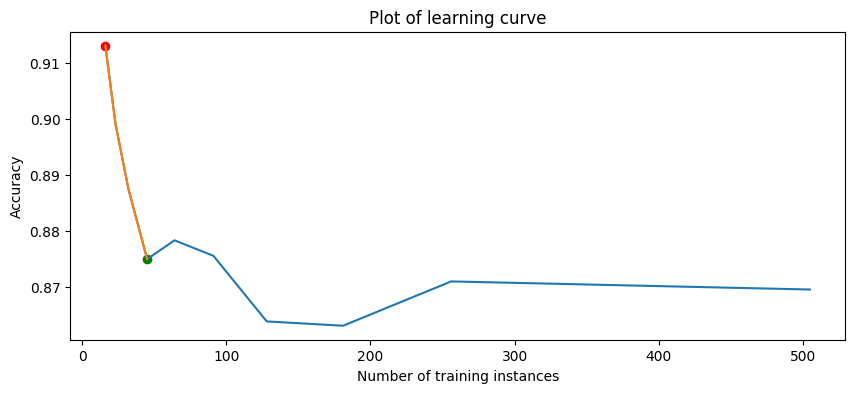

1it [00:02,  2.56s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 13 is non-monotonic: True, size: 8


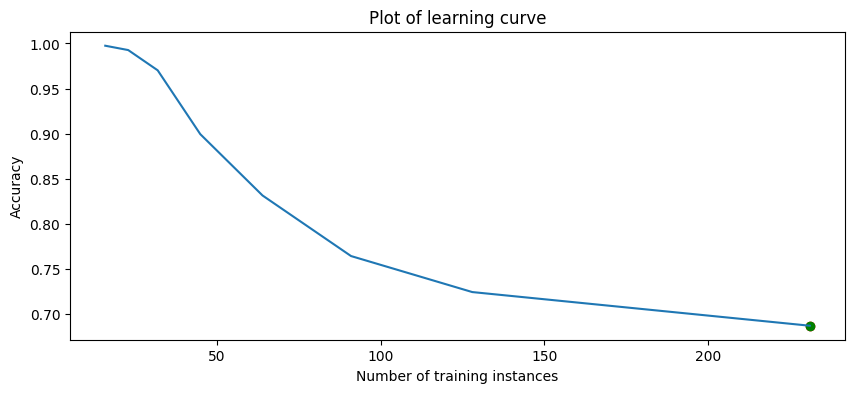

2it [00:04,  2.43s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 31 is non-monotonic: True, size: 12


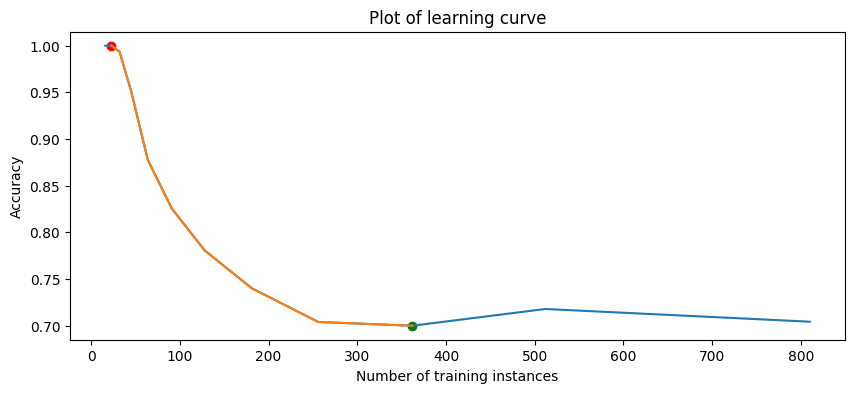

3it [00:07,  2.41s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 55 is non-monotonic: True, size: 6


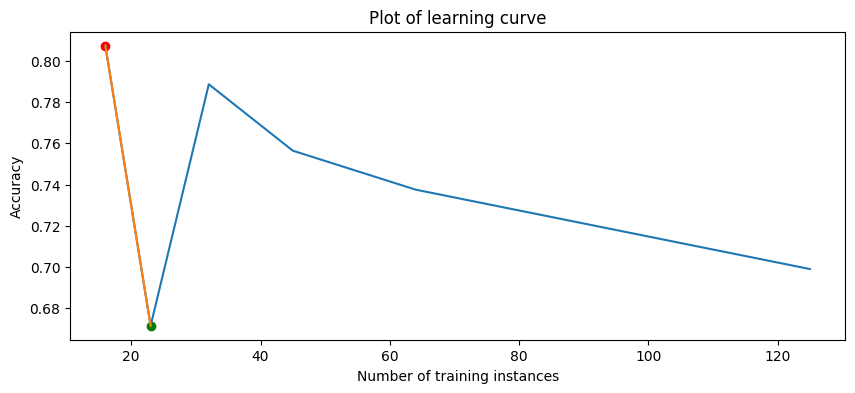

4it [00:09,  2.42s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 61 is non-monotonic: True, size: 6


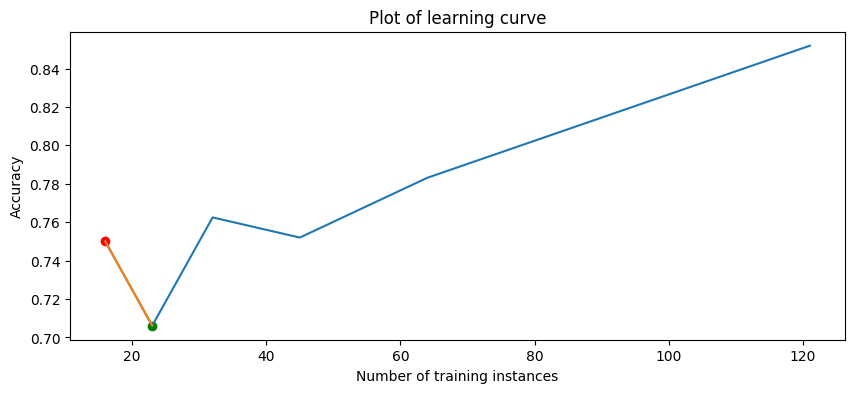

5it [00:12,  2.38s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 185 is non-monotonic: True, size: 14


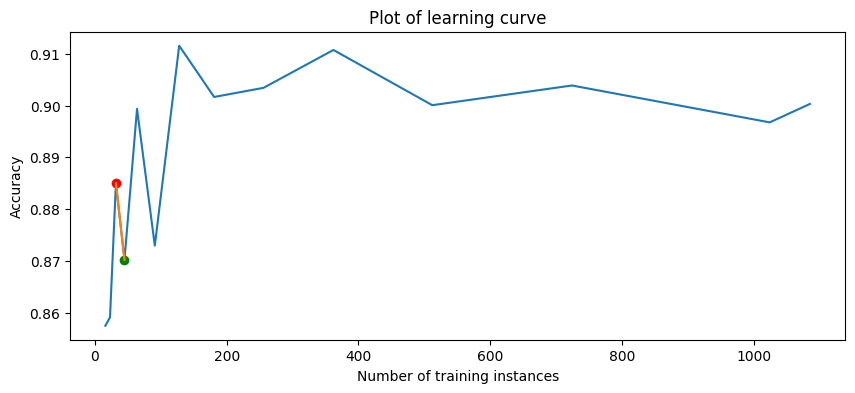

6it [00:14,  2.39s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 336 is non-monotonic: True, size: 8


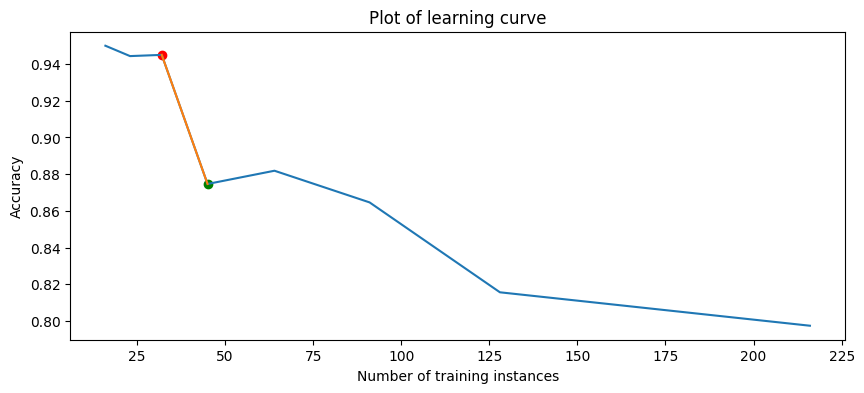

7it [00:16,  2.34s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 346 is non-monotonic: True, size: 4


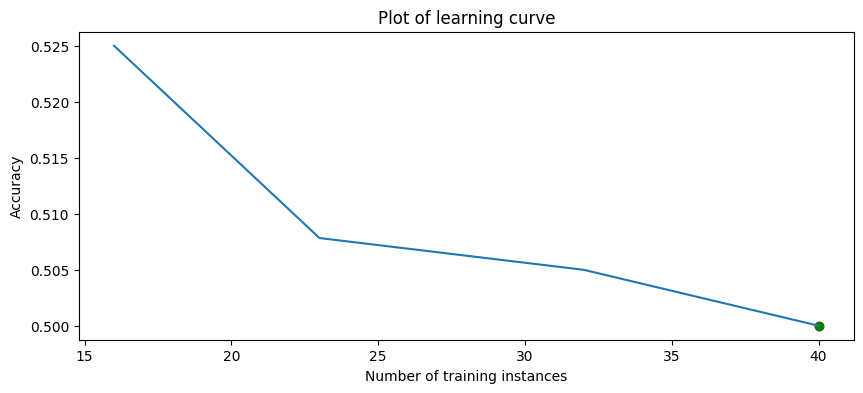

8it [00:19,  2.34s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 380 is non-monotonic: False, size: 4


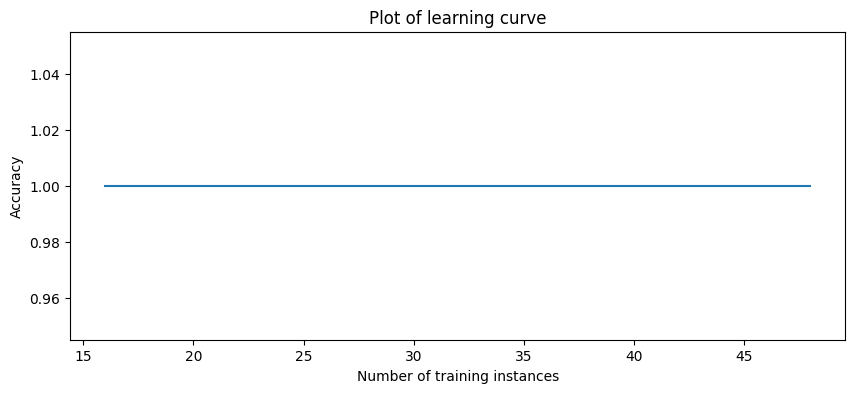

9it [00:21,  2.31s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 446 is non-monotonic: False, size: 8


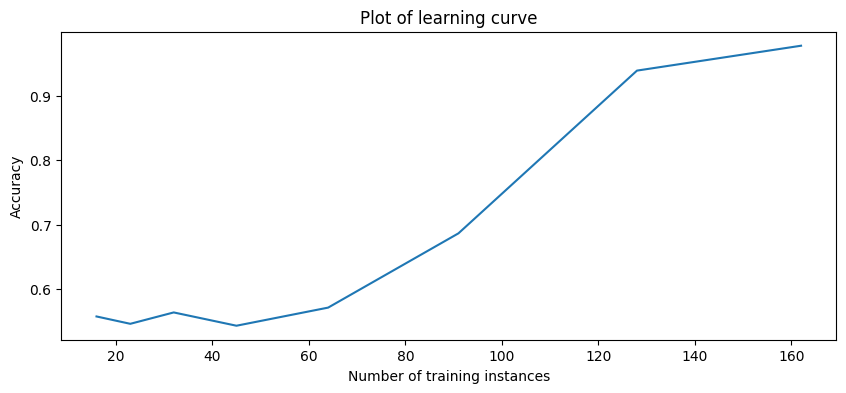

10it [00:23,  2.33s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 679 is non-monotonic: True, size: 12


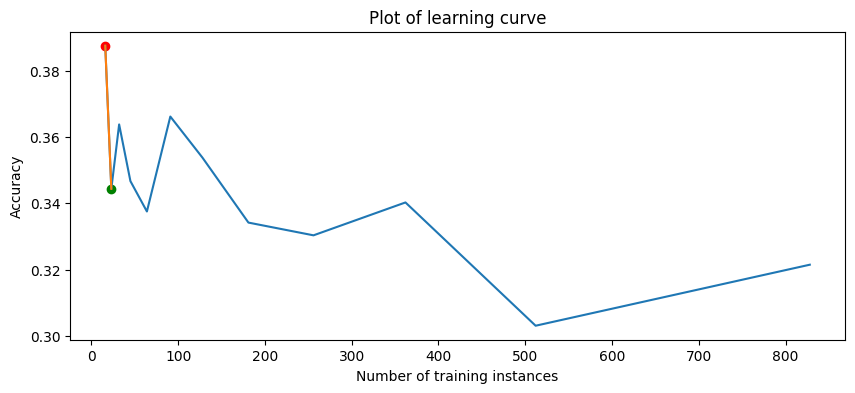

11it [00:25,  2.33s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 715 is non-monotonic: True, size: 12


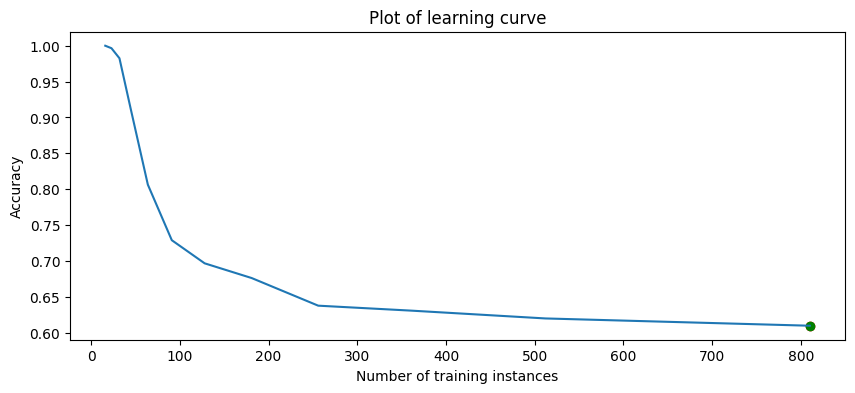

12it [00:28,  2.31s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 718 is non-monotonic: True, size: 12


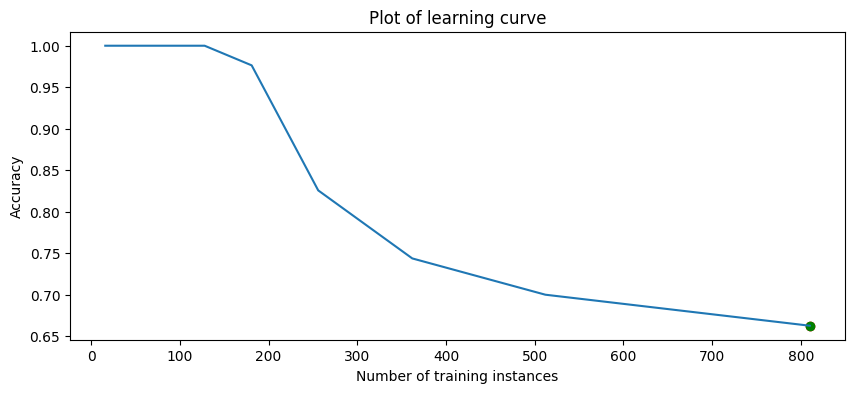

13it [00:30,  2.43s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 720 is non-monotonic: True, size: 16


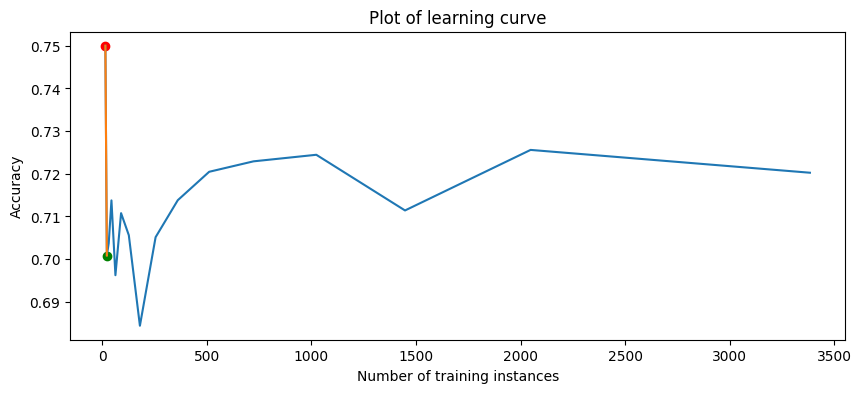

14it [00:33,  2.41s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 723 is non-monotonic: True, size: 12


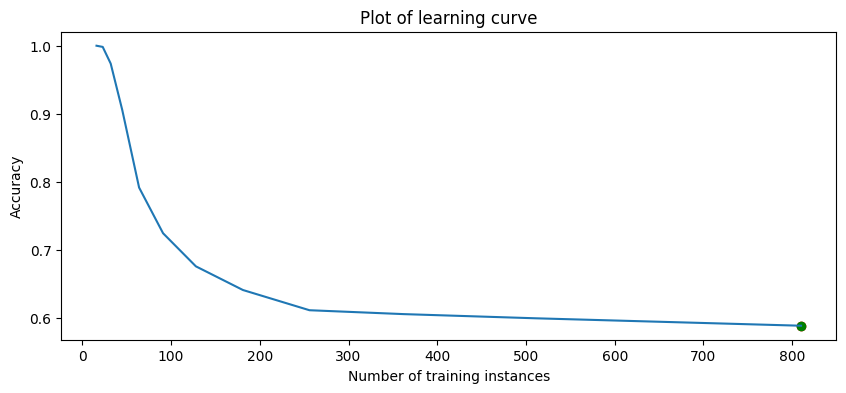

15it [00:35,  2.41s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 728 is non-monotonic: True, size: 16


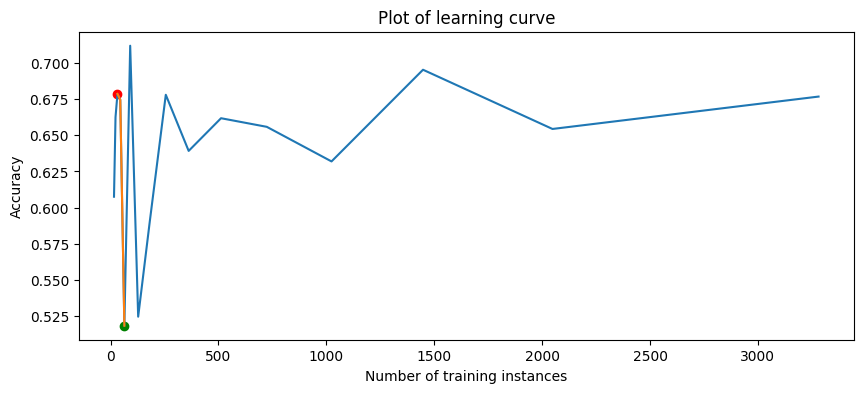

16it [00:38,  2.44s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 737 is non-monotonic: True, size: 16


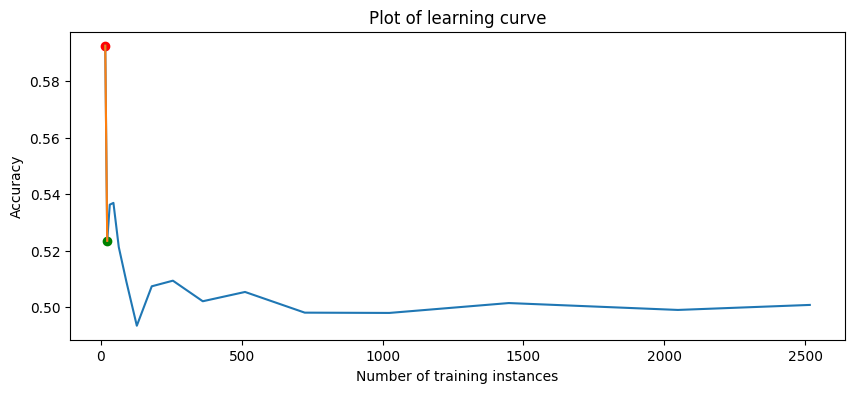

17it [00:40,  2.44s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 740 is non-monotonic: True, size: 12


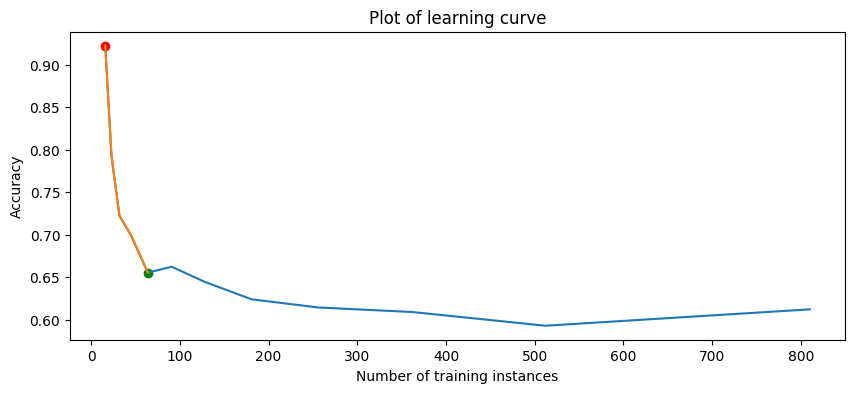

18it [00:43,  2.46s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 741 is non-monotonic: True, size: 12


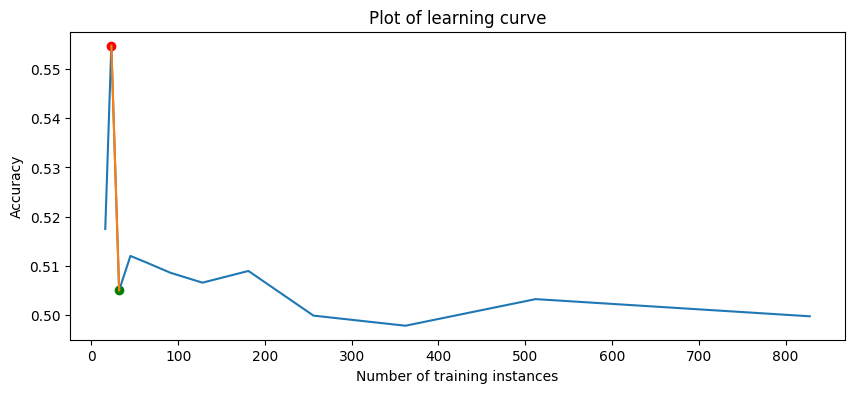

19it [00:45,  2.44s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 743 is non-monotonic: True, size: 12


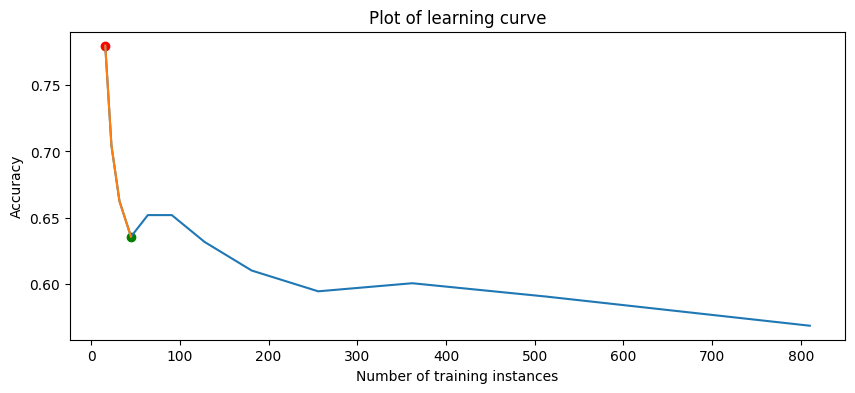

20it [00:47,  2.42s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 751 is non-monotonic: True, size: 12


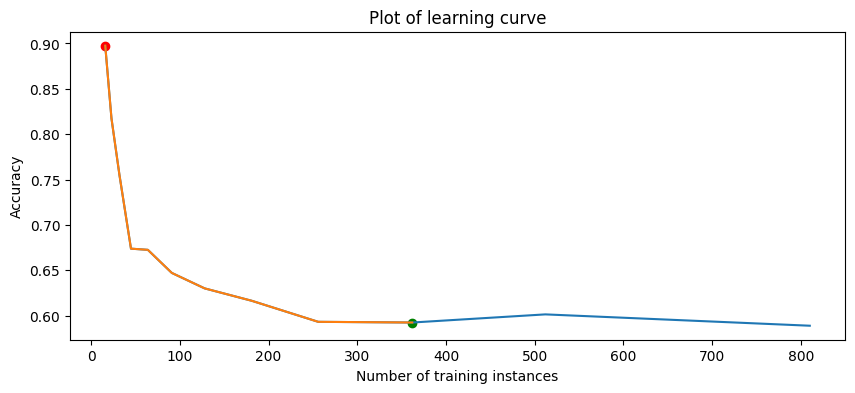

21it [00:50,  2.49s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 772 is non-monotonic: True, size: 14


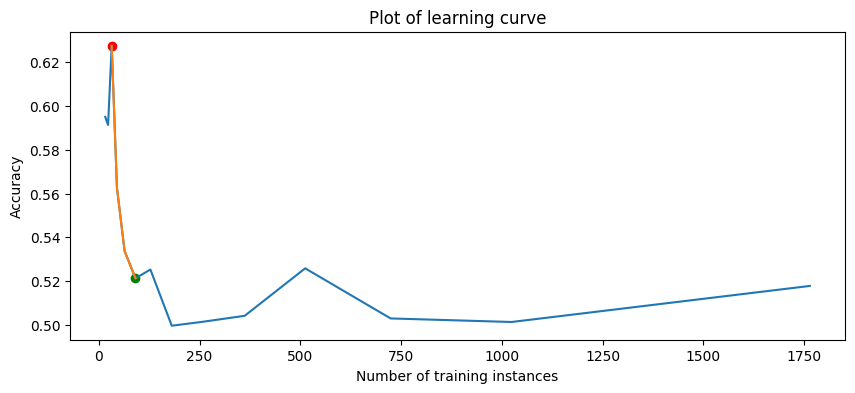

22it [00:52,  2.45s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 797 is non-monotonic: True, size: 12


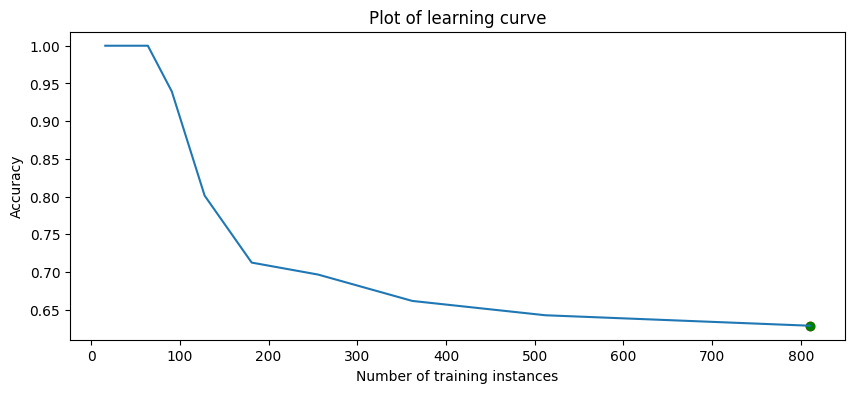

23it [00:55,  2.42s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 799 is non-monotonic: True, size: 12


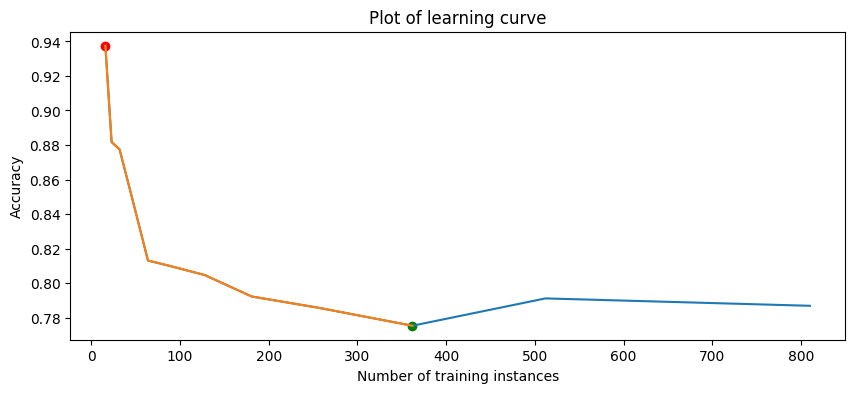

24it [00:57,  2.43s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 806 is non-monotonic: True, size: 12


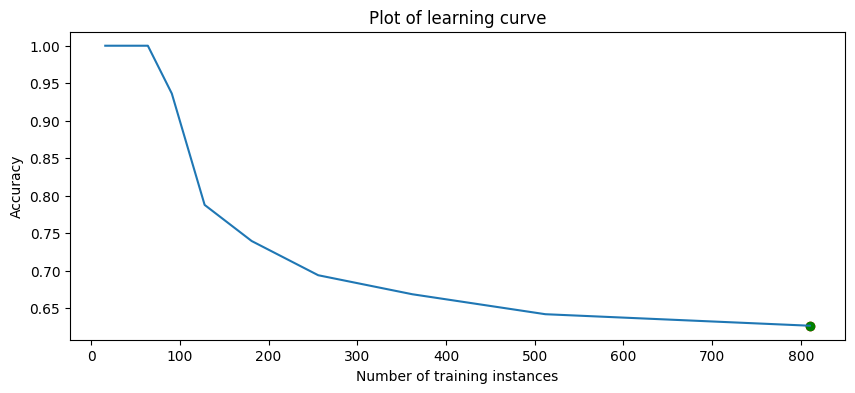

25it [01:00,  2.40s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 813 is non-monotonic: True, size: 12


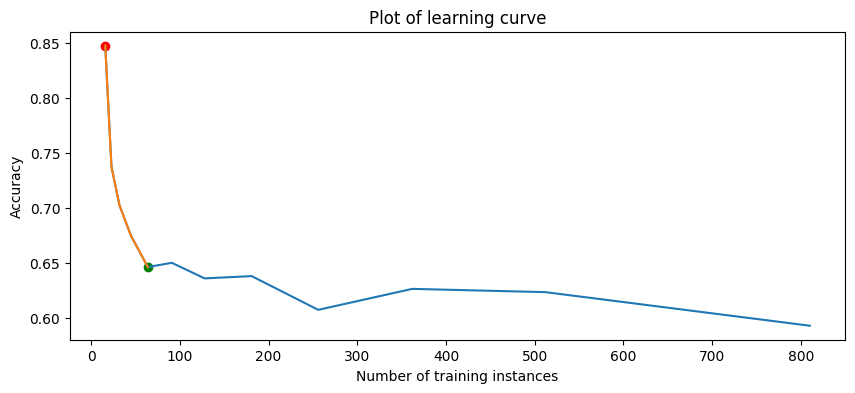

26it [01:02,  2.34s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 837 is non-monotonic: True, size: 12


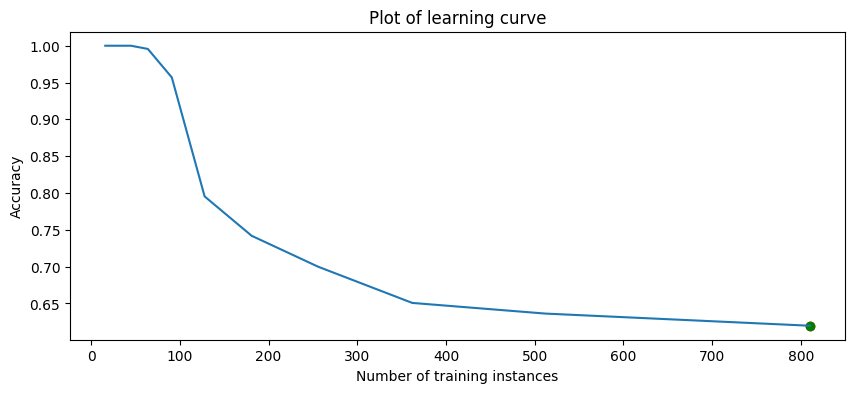

27it [01:04,  2.31s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 845 is non-monotonic: True, size: 12


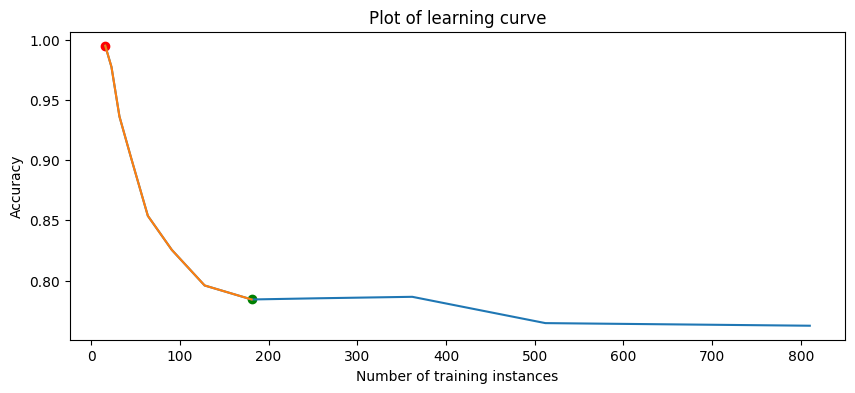

28it [01:06,  2.27s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 849 is non-monotonic: True, size: 12


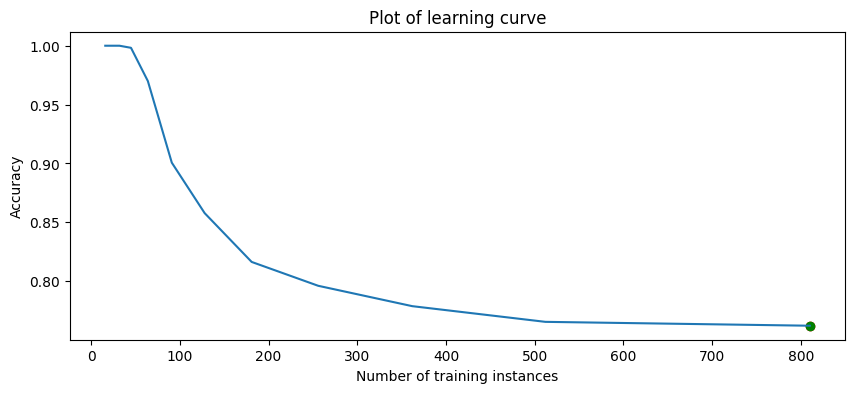

29it [01:08,  2.26s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 866 is non-monotonic: True, size: 12


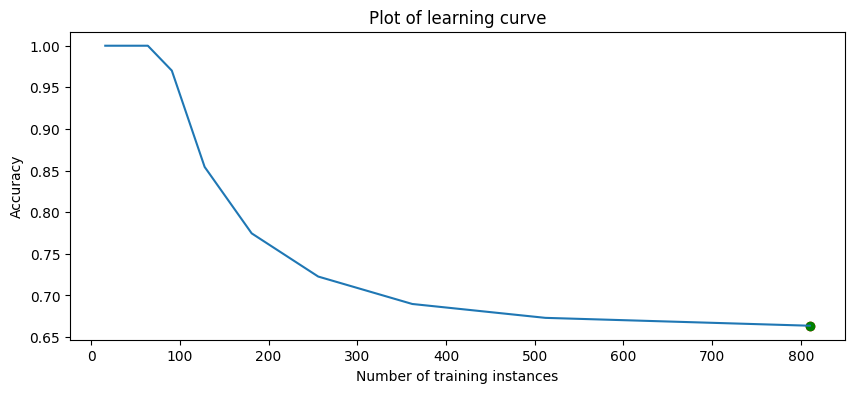

30it [01:11,  2.25s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 871 is non-monotonic: True, size: 16


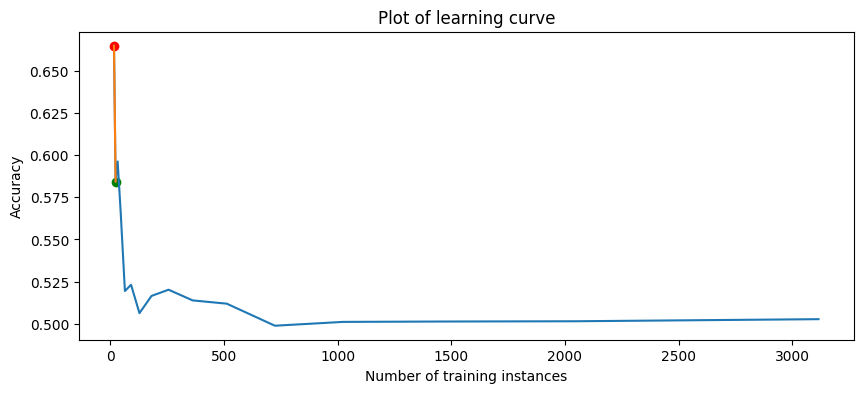

31it [01:13,  2.27s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 897 is non-monotonic: False, size: 12


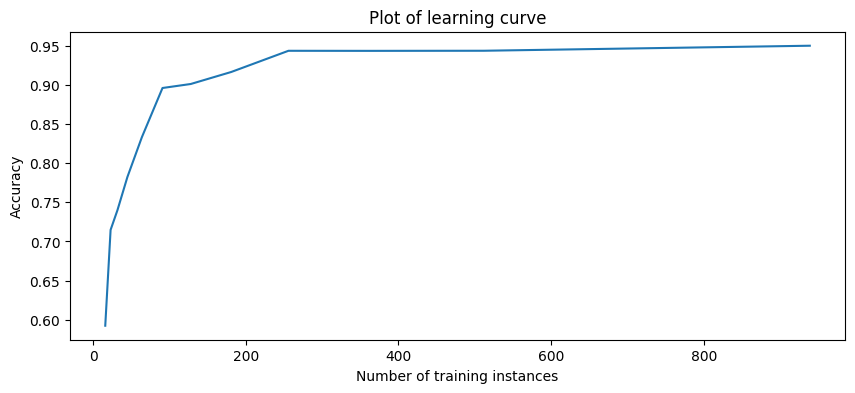

32it [01:15,  2.24s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 903 is non-monotonic: True, size: 12


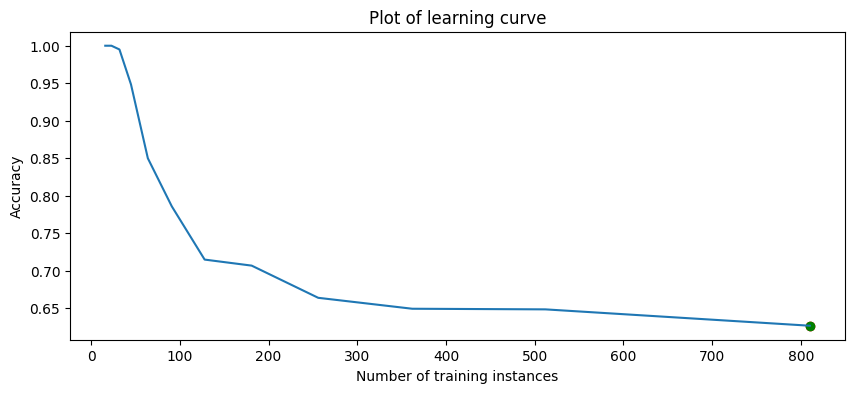

33it [01:17,  2.23s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 904 is non-monotonic: True, size: 12


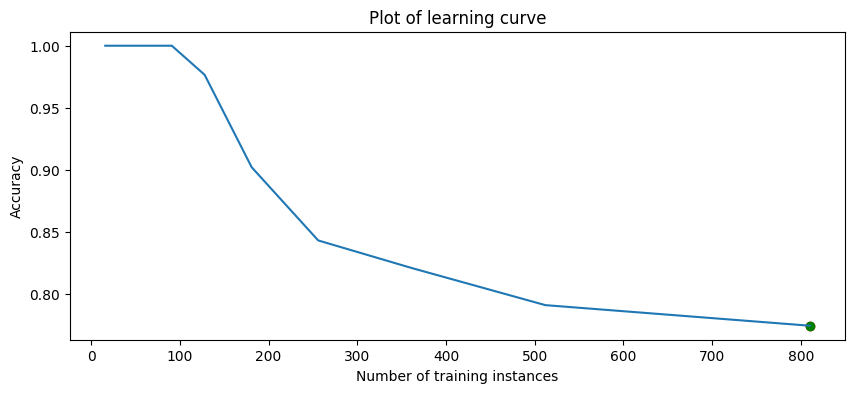

34it [01:20,  2.22s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 910 is non-monotonic: True, size: 12


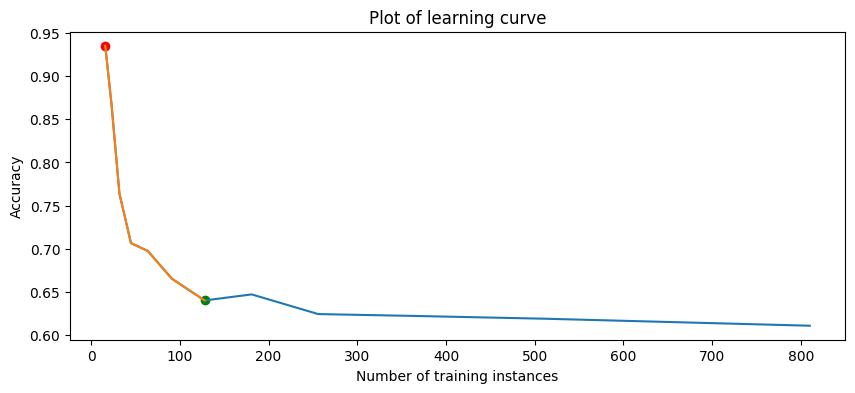

35it [01:22,  2.22s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 912 is non-monotonic: True, size: 12


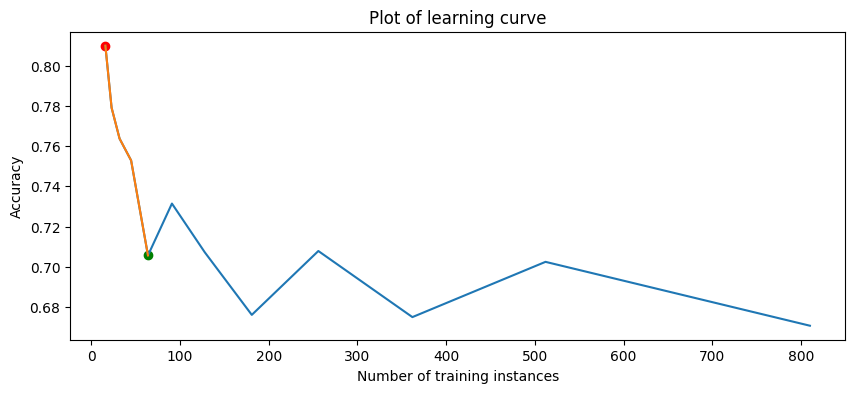

36it [01:24,  2.23s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 913 is non-monotonic: True, size: 12


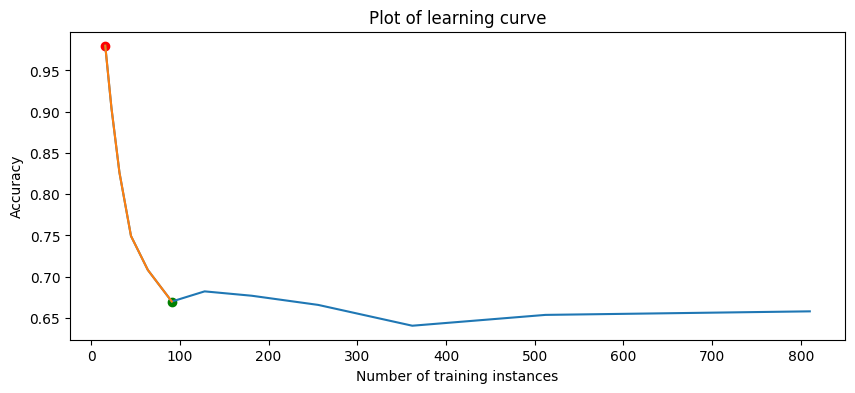

37it [01:26,  2.22s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 914 is non-monotonic: True, size: 14


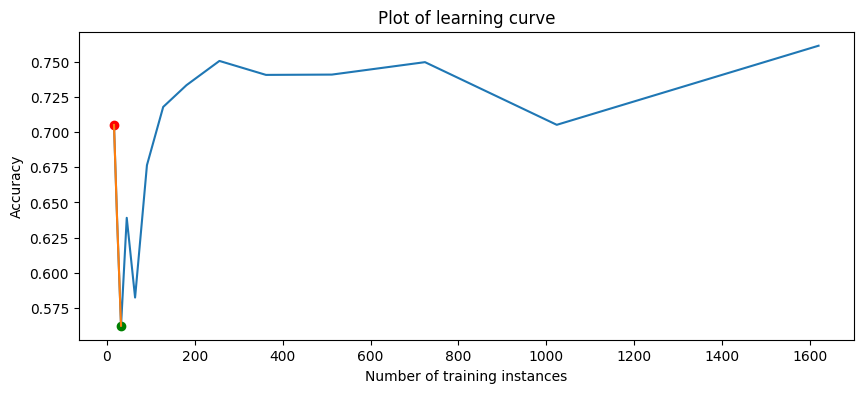

38it [01:29,  2.26s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 917 is non-monotonic: True, size: 12


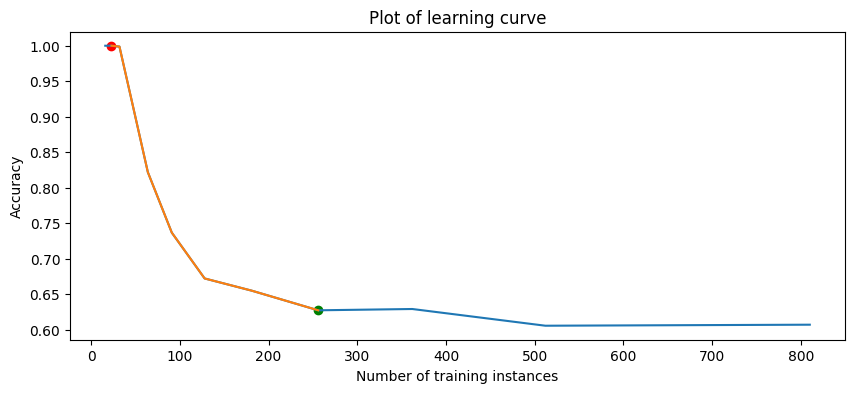

39it [01:31,  2.25s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 930 is non-monotonic: True, size: 14


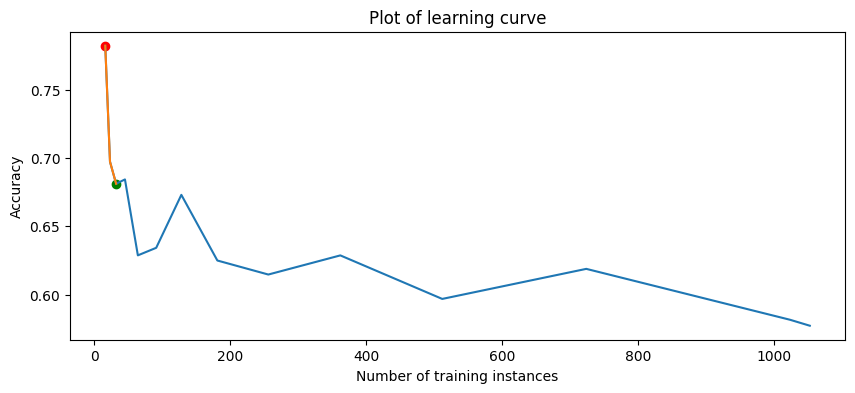

40it [01:33,  2.24s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 934 is non-monotonic: True, size: 12


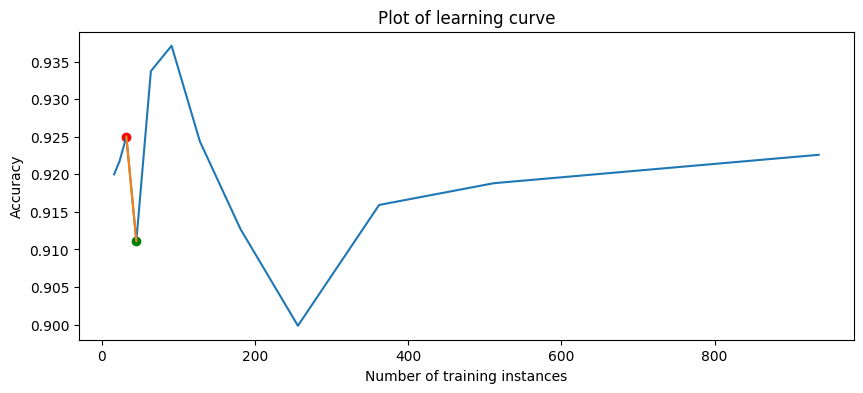

41it [01:35,  2.22s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 958 is non-monotonic: False, size: 14


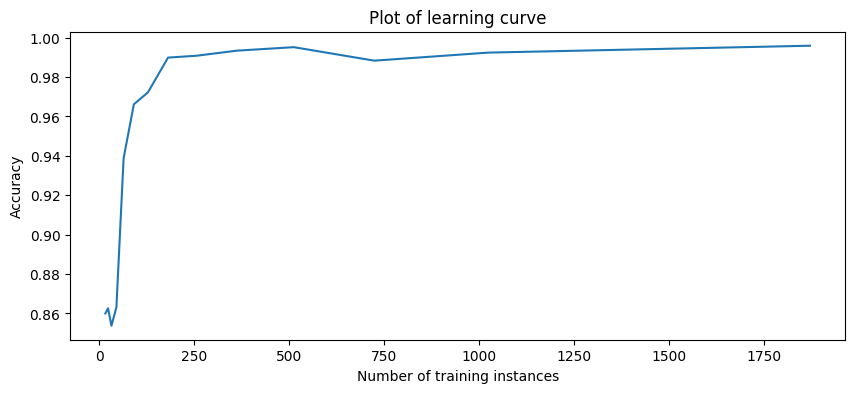

42it [01:37,  2.21s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 962 is non-monotonic: True, size: 14


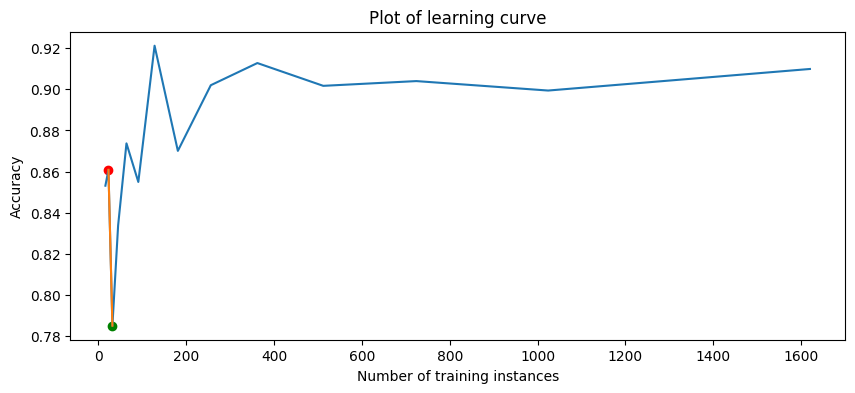

43it [01:40,  2.20s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 966 is non-monotonic: True, size: 14


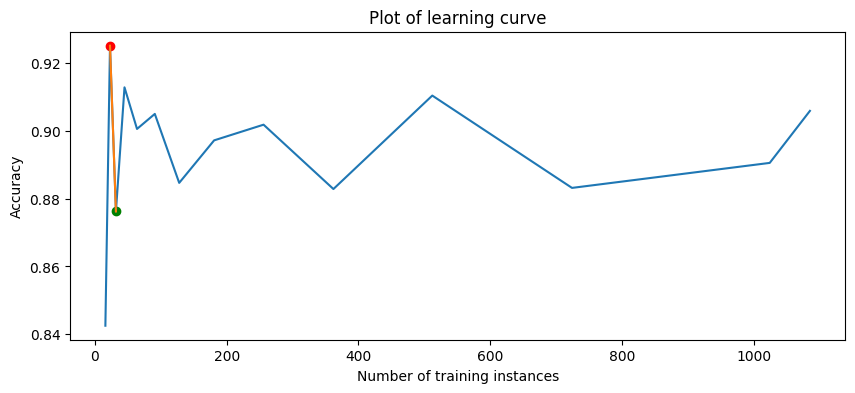

44it [01:42,  2.20s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 971 is non-monotonic: False, size: 14


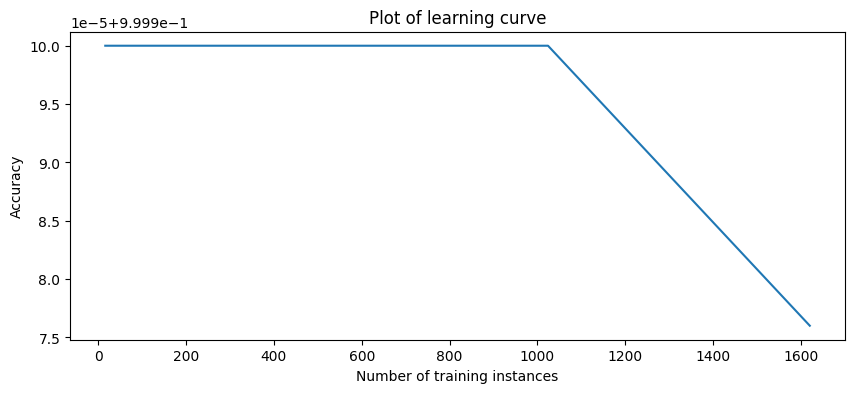

45it [01:44,  2.21s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 991 is non-monotonic: True, size: 14


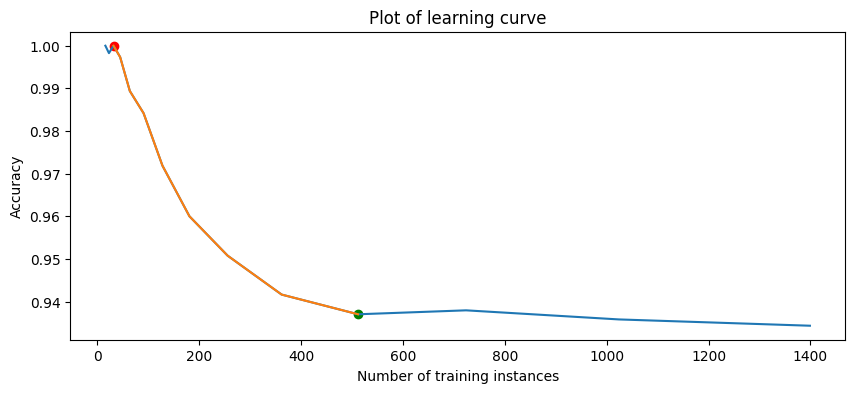

46it [01:46,  2.20s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 995 is non-monotonic: True, size: 14


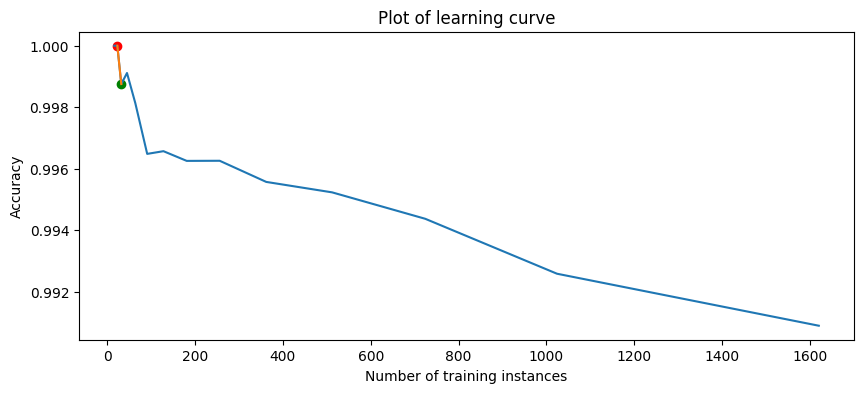

47it [01:48,  2.20s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1049 is non-monotonic: True, size: 14


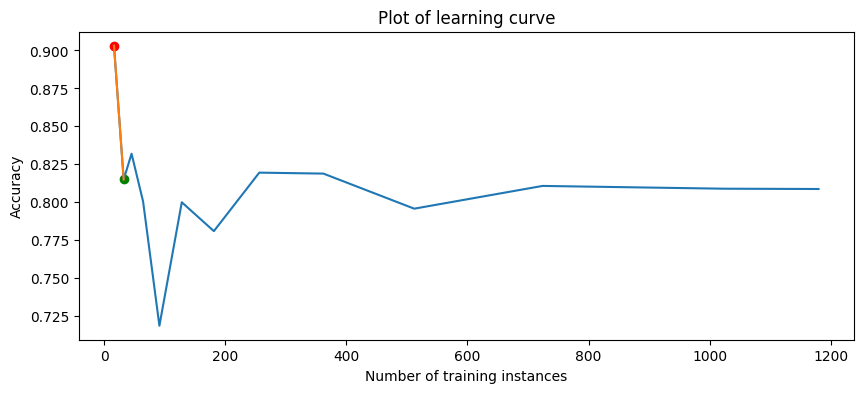

48it [01:51,  2.19s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1050 is non-monotonic: True, size: 14


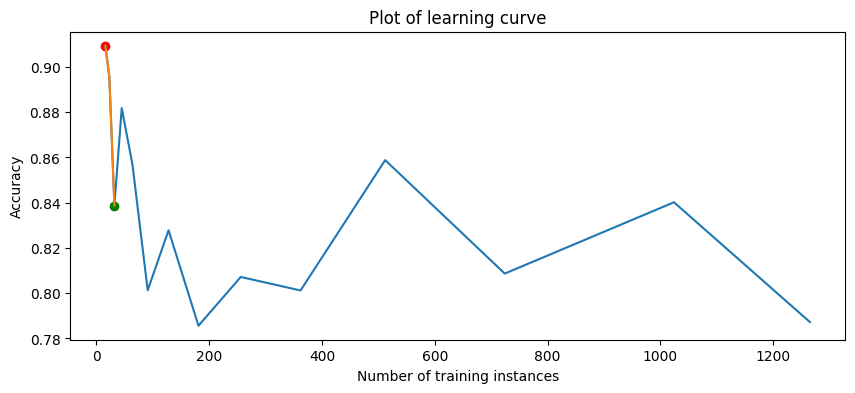

49it [01:53,  2.19s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1067 is non-monotonic: True, size: 14


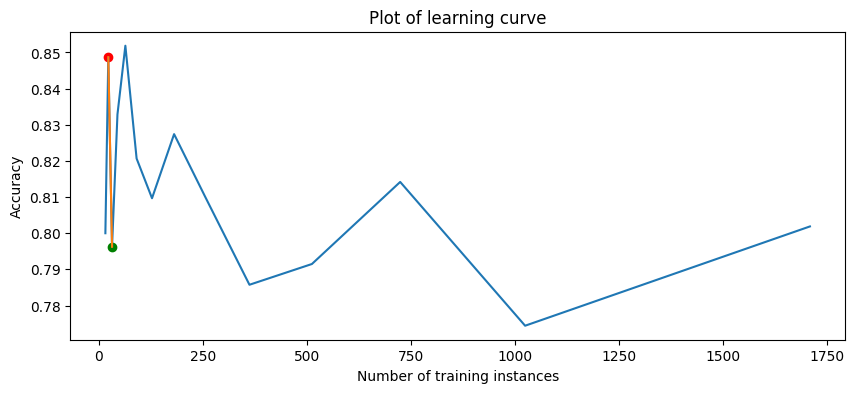

50it [01:55,  2.24s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1068 is non-monotonic: True, size: 12


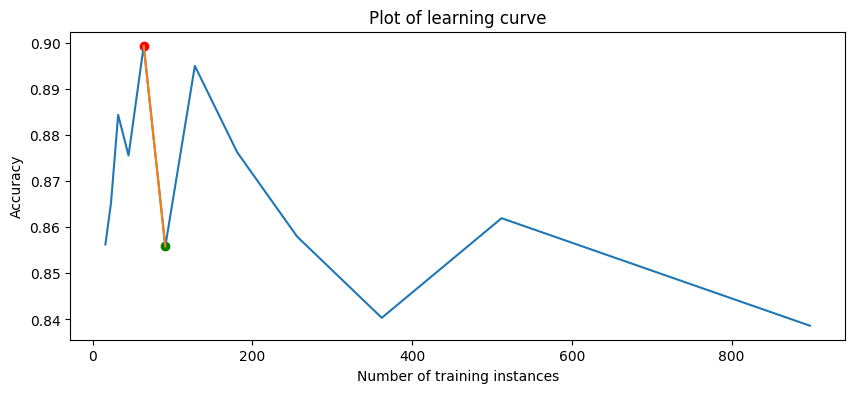

51it [01:57,  2.23s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1441 is non-monotonic: True, size: 6


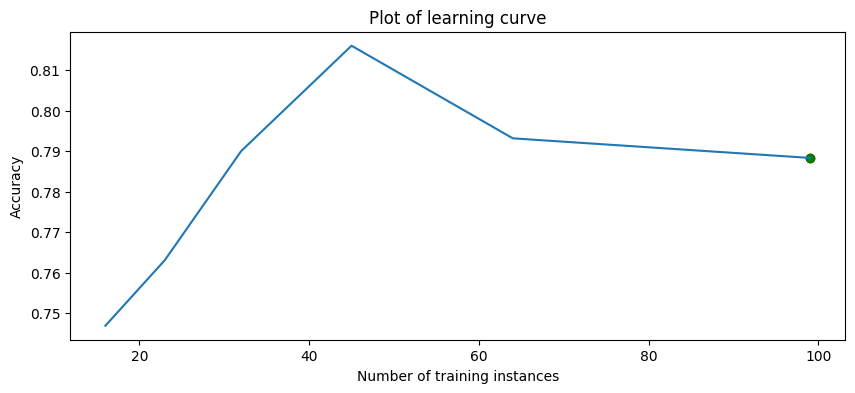

52it [01:59,  2.21s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1448 is non-monotonic: True, size: 8


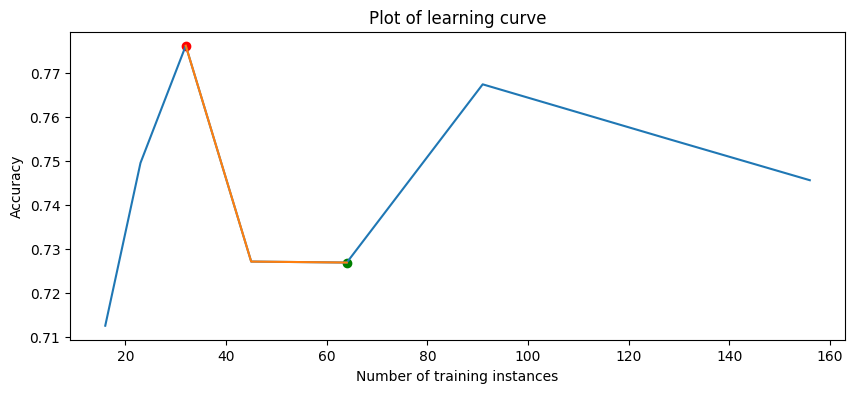

53it [02:02,  2.21s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1450 is non-monotonic: True, size: 6


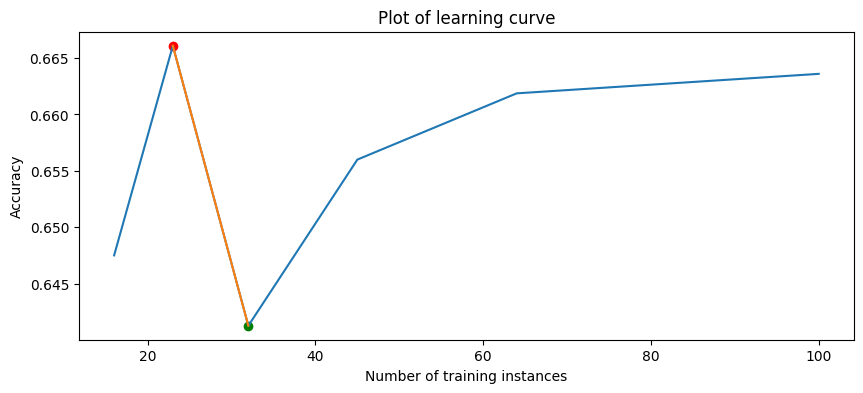

54it [02:04,  2.20s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1464 is non-monotonic: True, size: 12


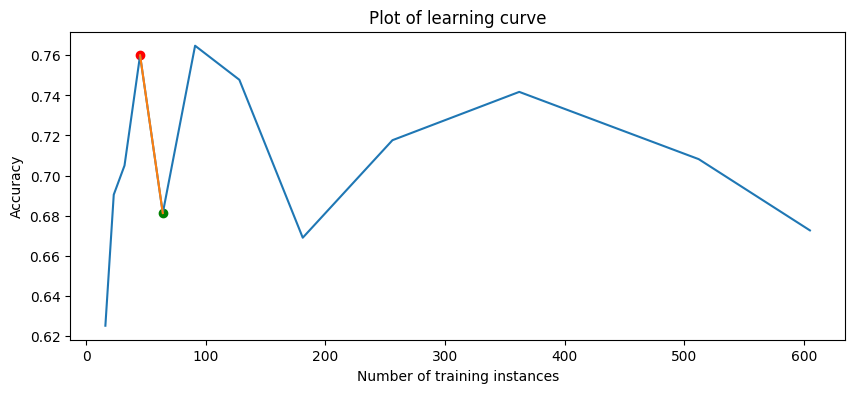

55it [02:06,  2.20s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1465 is non-monotonic: True, size: 6


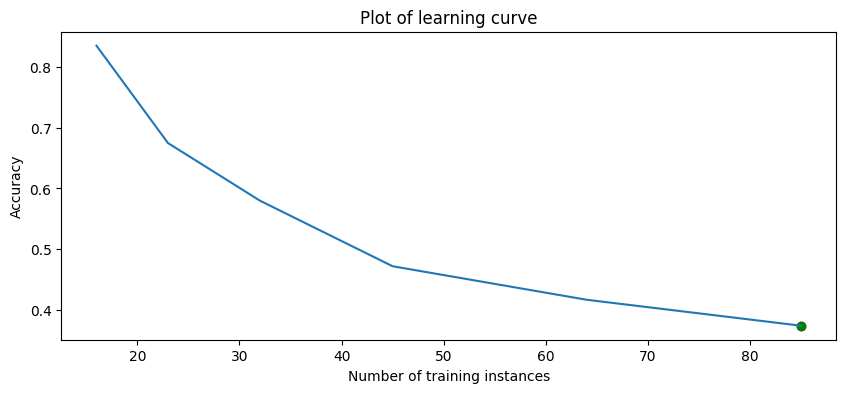

56it [02:08,  2.19s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1488 is non-monotonic: True, size: 8


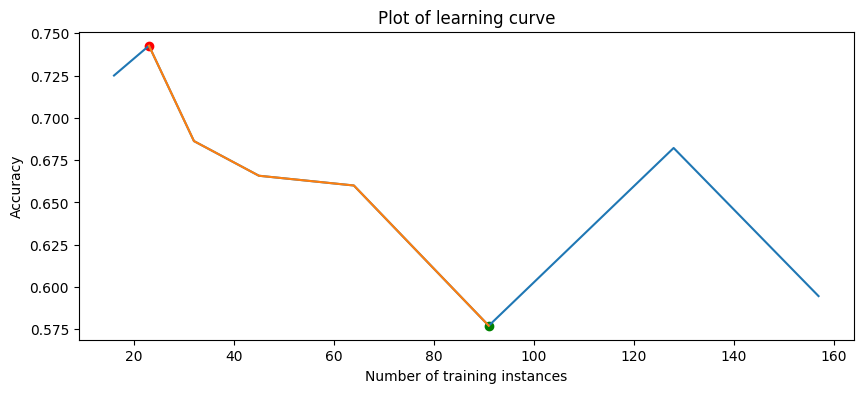

57it [02:10,  2.17s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1489 is non-monotonic: True, size: 18


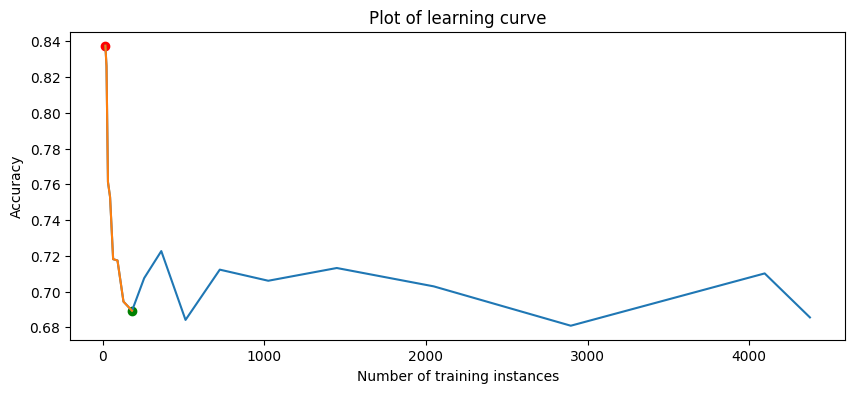

58it [02:13,  2.31s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1494 is non-monotonic: True, size: 12


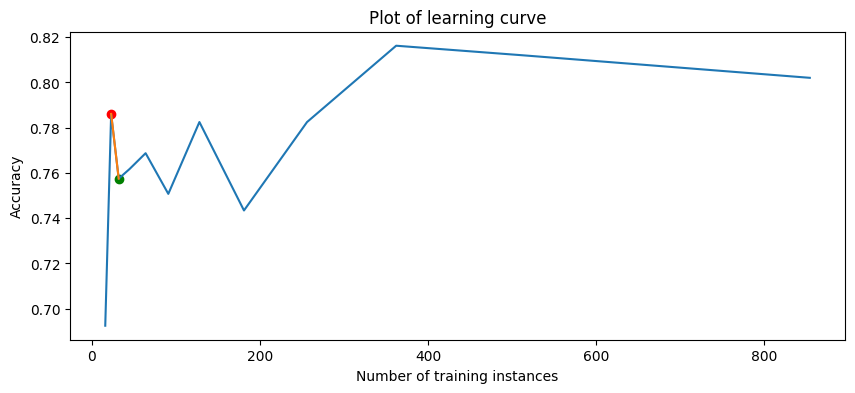

59it [02:16,  2.39s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 1499 is non-monotonic: True, size: 8


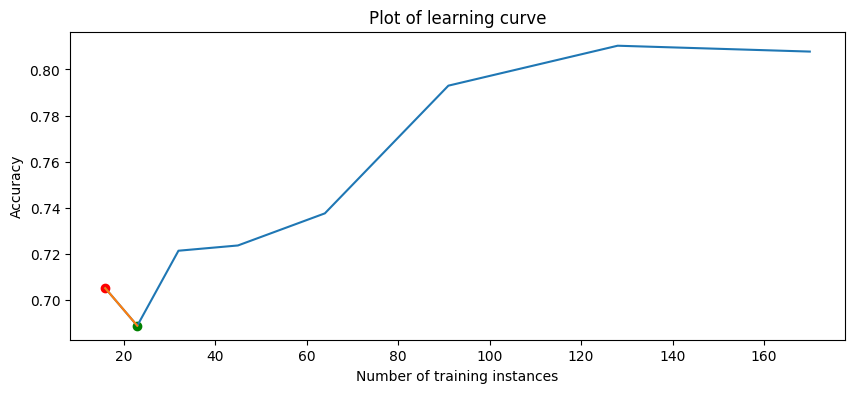

60it [02:18,  2.36s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 40981 is non-monotonic: True, size: 12


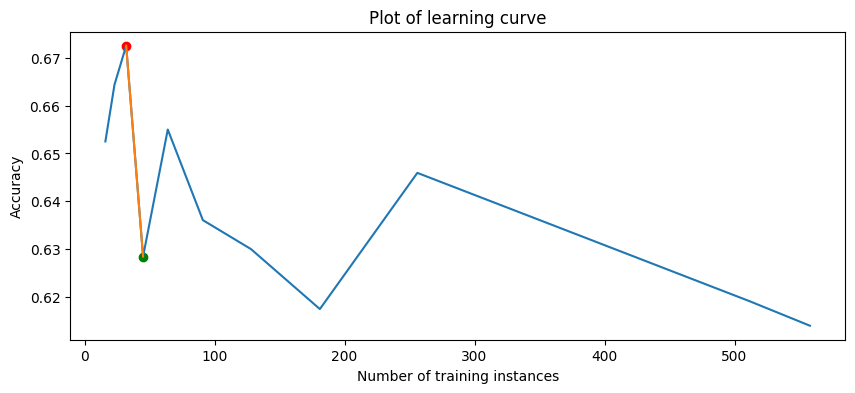

61it [02:20,  2.31s/it]

sklearn.linear_model.PassiveAggressiveClassifier on 40994 is non-monotonic: True, size: 10


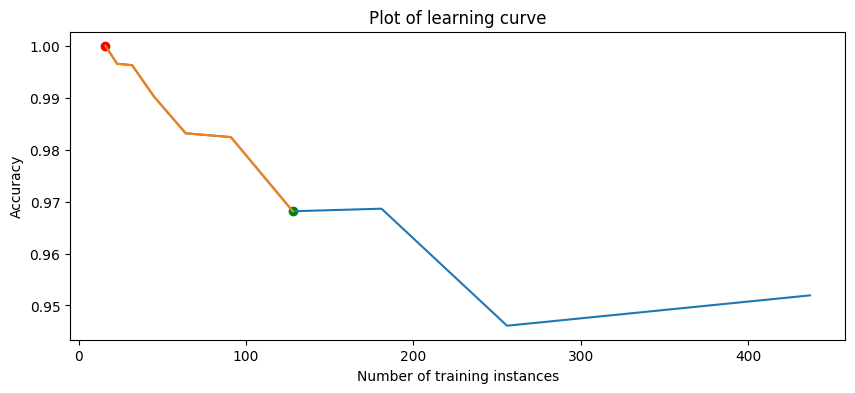

62it [02:22,  2.30s/it]
0it [00:00, ?it/s]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 11 is non-monotonic: True, size: 10


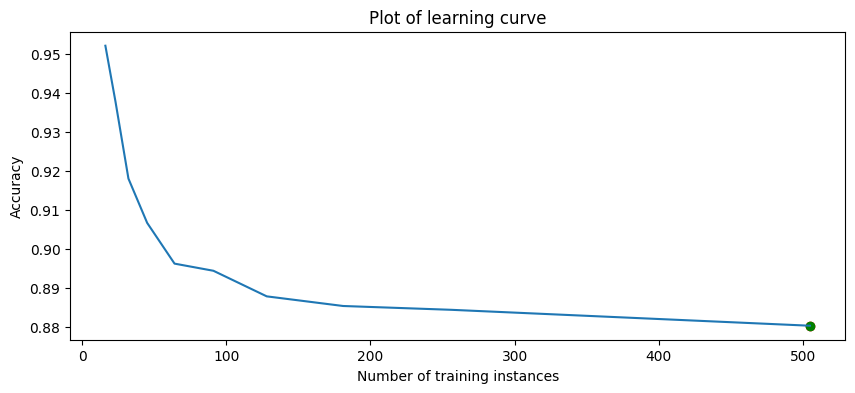

1it [00:02,  2.35s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 18 is non-monotonic: True, size: 14


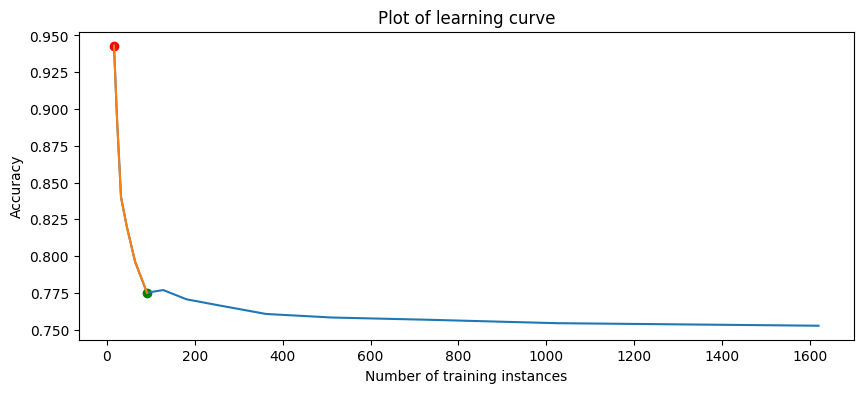

2it [00:04,  2.34s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 21 is non-monotonic: True, size: 14


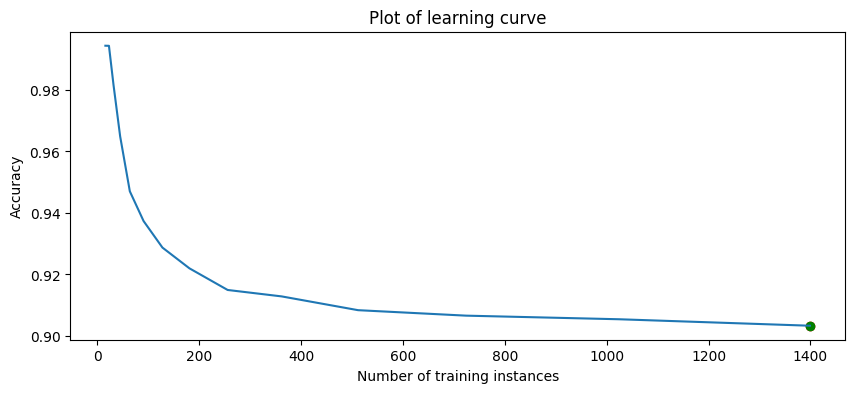

3it [00:07,  2.51s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 54 is non-monotonic: True, size: 12


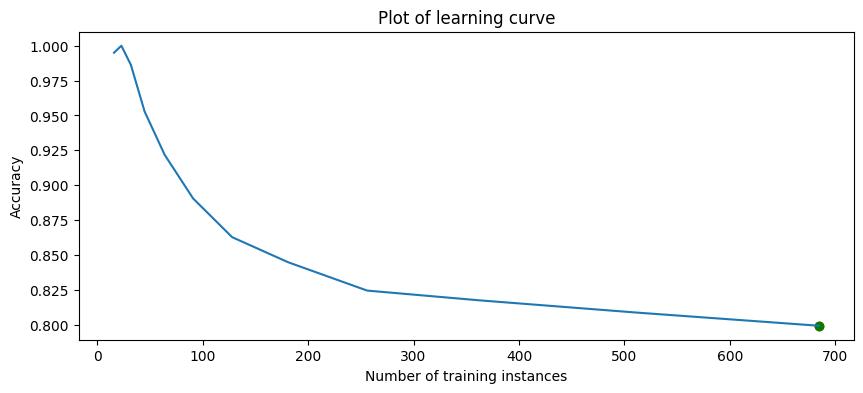

4it [00:09,  2.43s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 55 is non-monotonic: True, size: 6


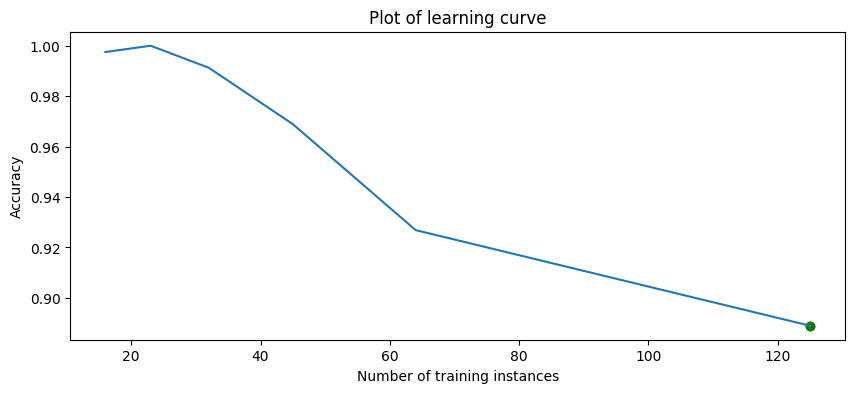

5it [00:11,  2.36s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 61 is non-monotonic: True, size: 6


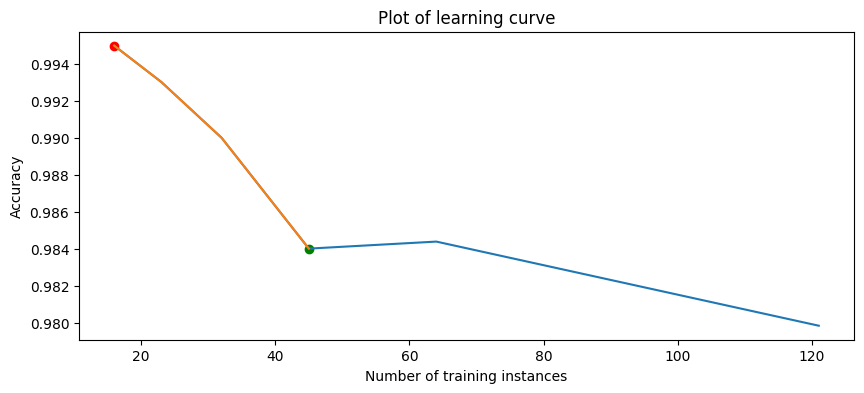

6it [00:14,  2.32s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 181 is non-monotonic: True, size: 14


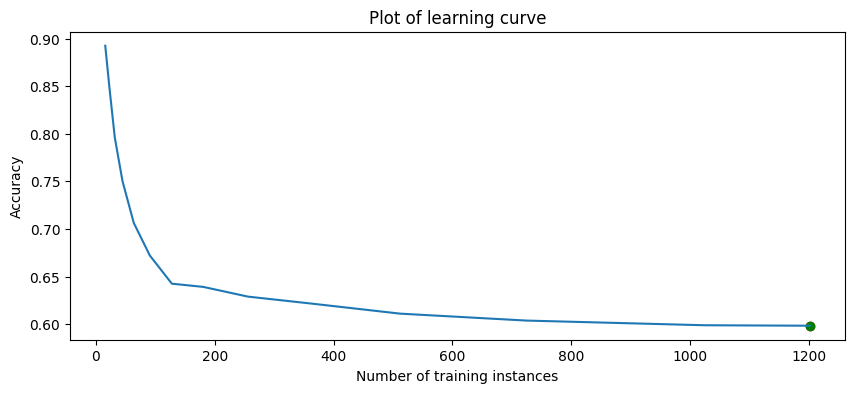

7it [00:16,  2.33s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 185 is non-monotonic: True, size: 14


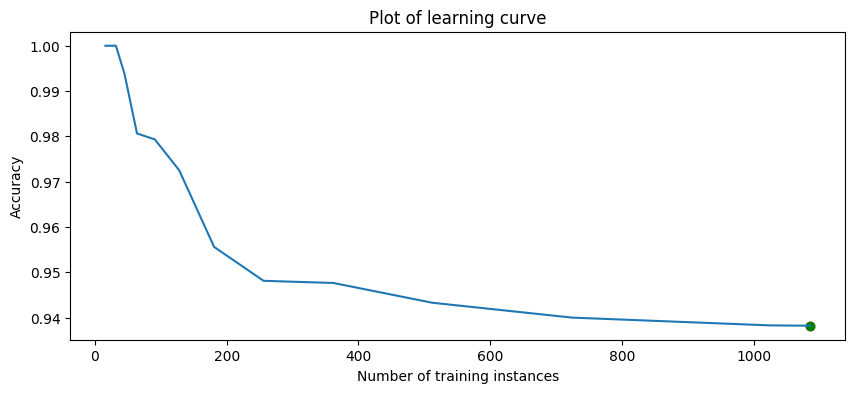

8it [00:18,  2.32s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 346 is non-monotonic: True, size: 4


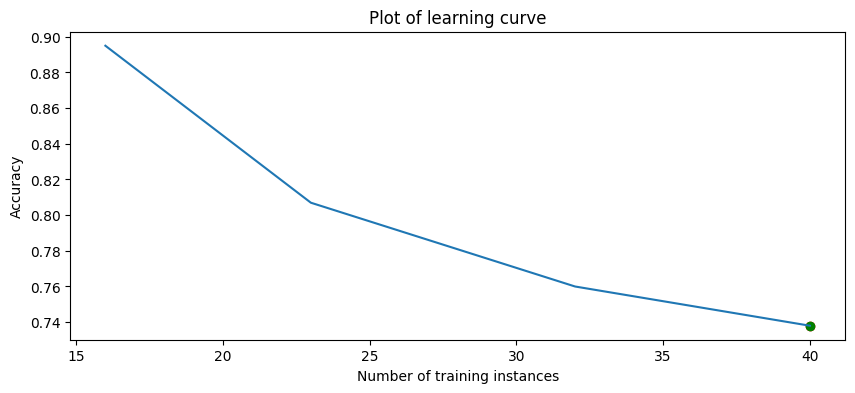

9it [00:21,  2.31s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 380 is non-monotonic: True, size: 4


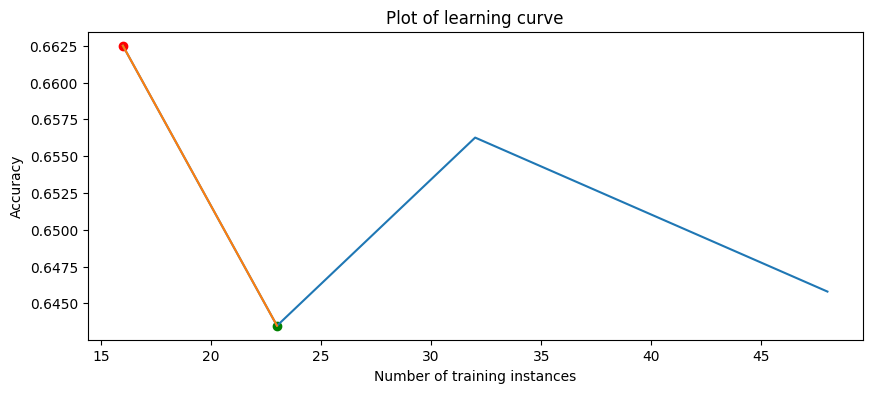

10it [00:23,  2.31s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 446 is non-monotonic: False, size: 8


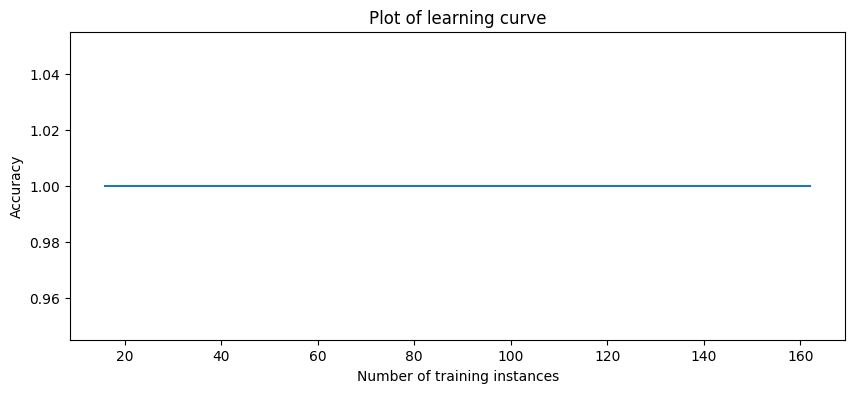

11it [00:25,  2.29s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 679 is non-monotonic: True, size: 12


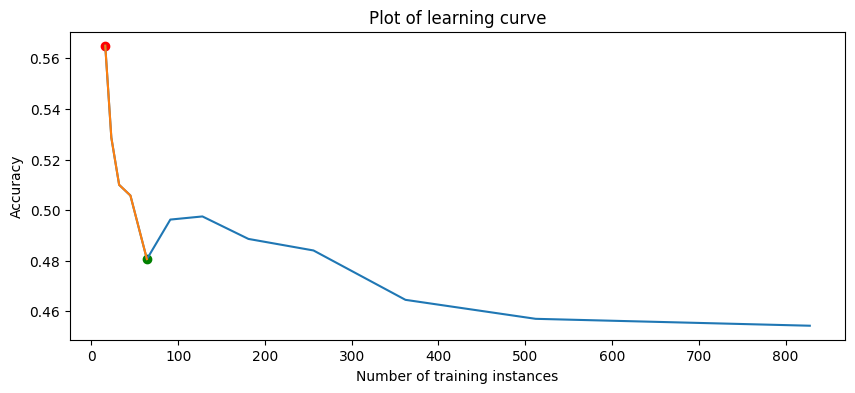

12it [00:27,  2.27s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 715 is non-monotonic: True, size: 12


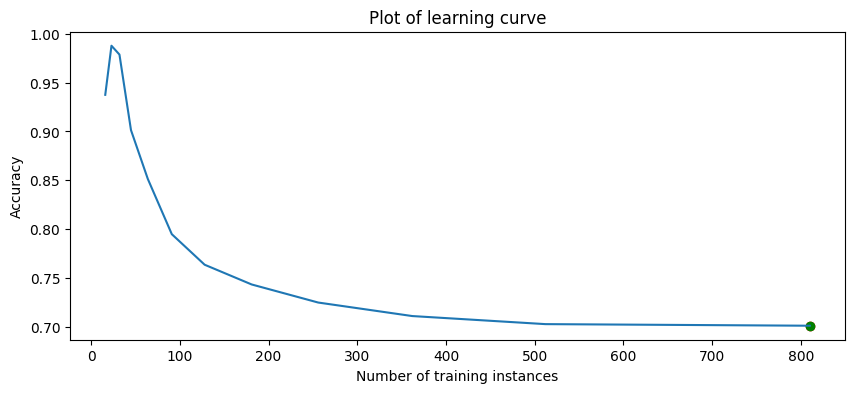

13it [00:30,  2.27s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 723 is non-monotonic: True, size: 12


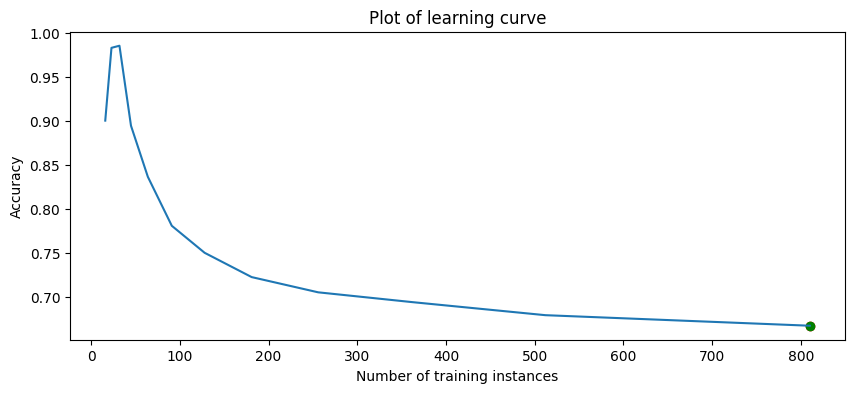

14it [00:32,  2.28s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 728 is non-monotonic: True, size: 16


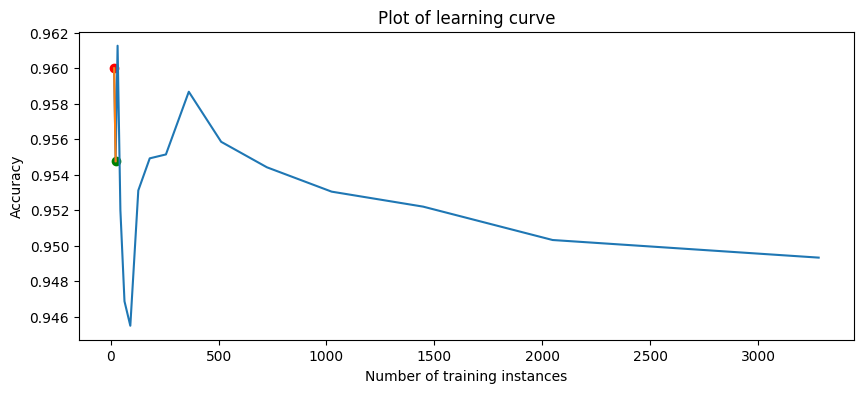

15it [00:34,  2.26s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 737 is non-monotonic: True, size: 16


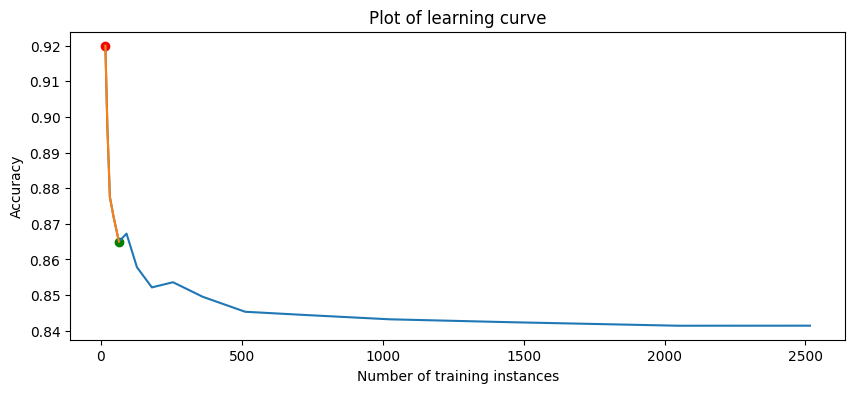

16it [00:36,  2.25s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 740 is non-monotonic: True, size: 12


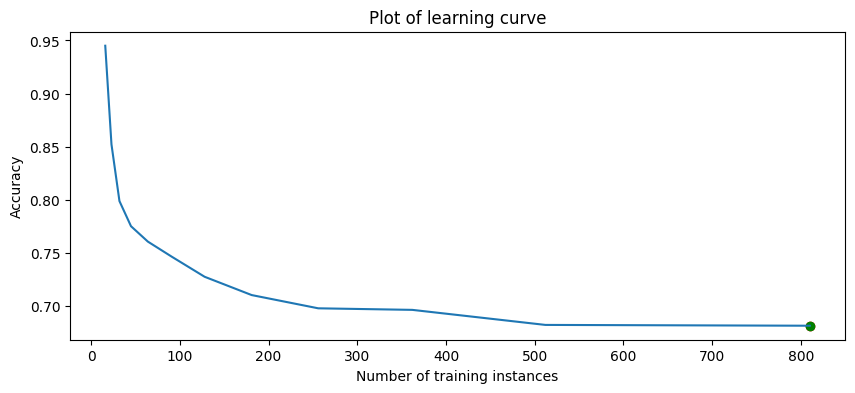

17it [00:39,  2.27s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 741 is non-monotonic: True, size: 12


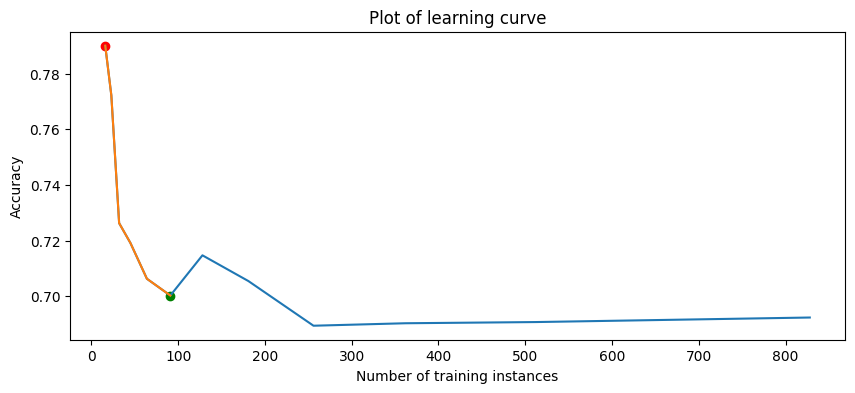

18it [00:41,  2.25s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 743 is non-monotonic: True, size: 12


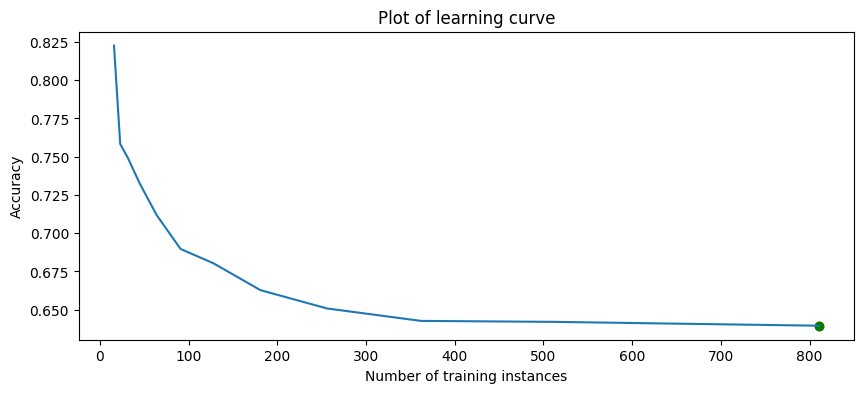

19it [00:43,  2.25s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 751 is non-monotonic: True, size: 12


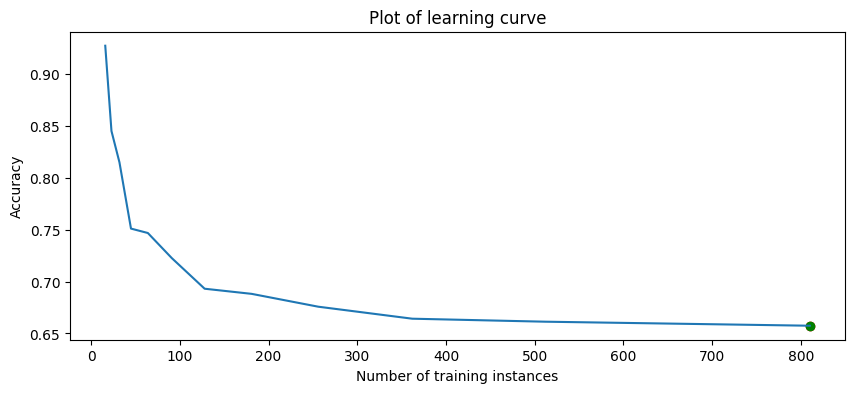

20it [00:45,  2.24s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 772 is non-monotonic: True, size: 14


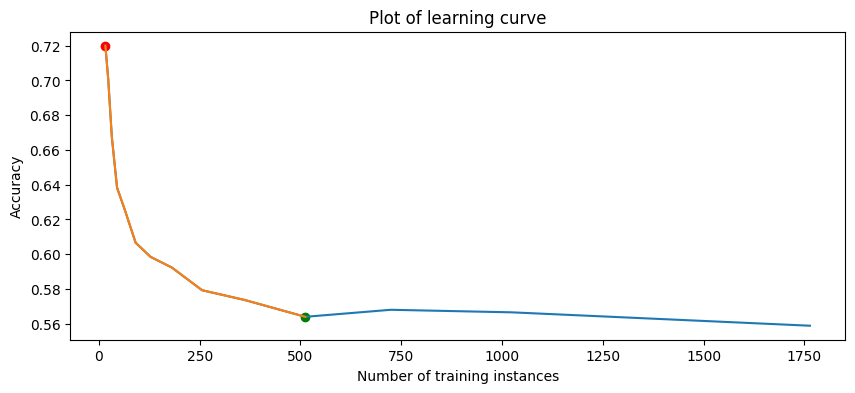

21it [00:48,  2.24s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 799 is non-monotonic: True, size: 12


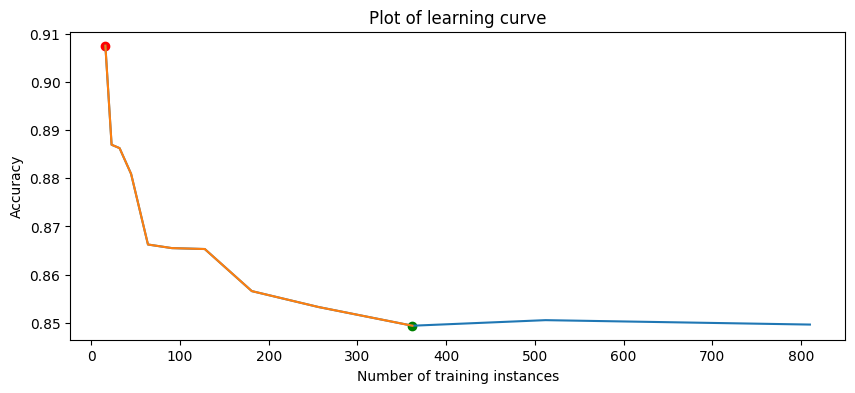

22it [00:50,  2.26s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 813 is non-monotonic: True, size: 12


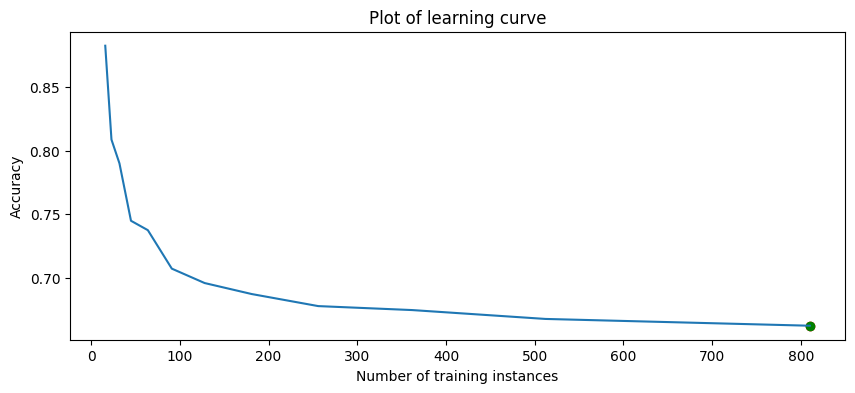

23it [00:52,  2.28s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 845 is non-monotonic: True, size: 12


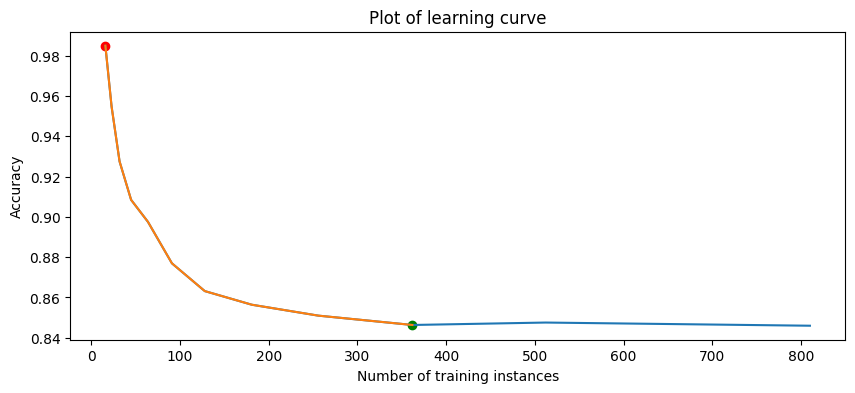

24it [00:55,  2.27s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 849 is non-monotonic: True, size: 12


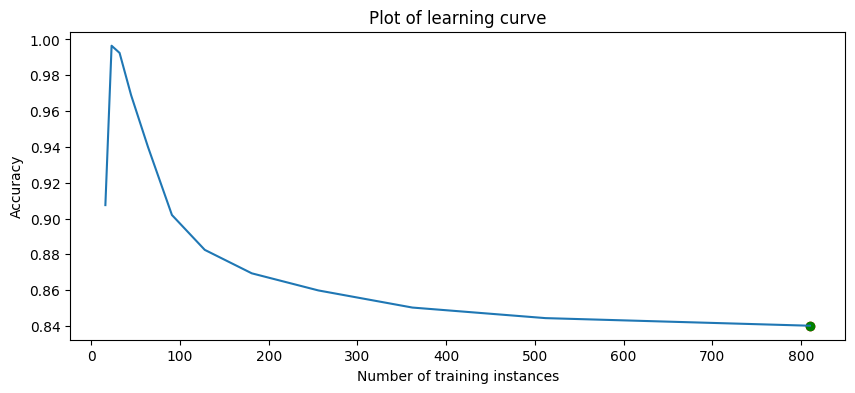

25it [00:57,  2.26s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 871 is non-monotonic: True, size: 16


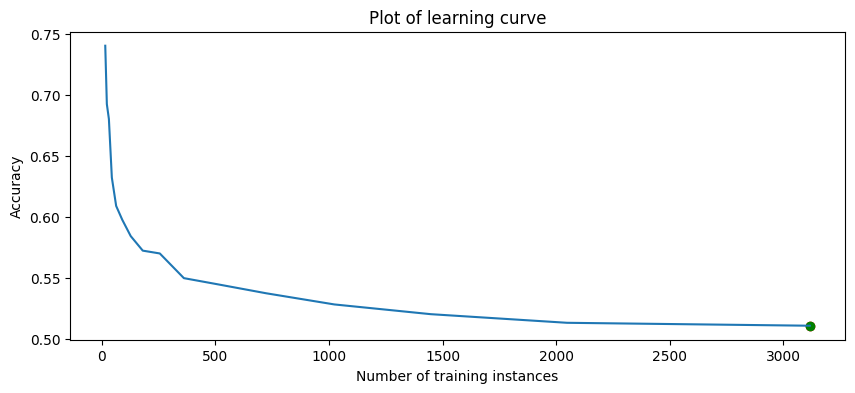

26it [00:59,  2.25s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 903 is non-monotonic: True, size: 12


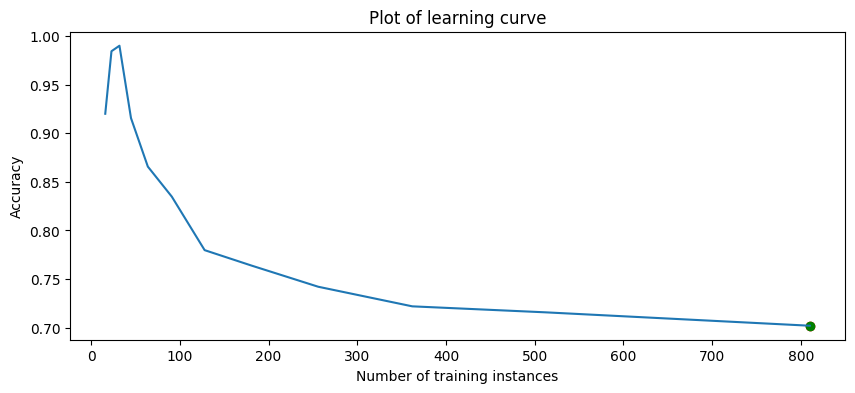

27it [01:02,  2.34s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 910 is non-monotonic: True, size: 12


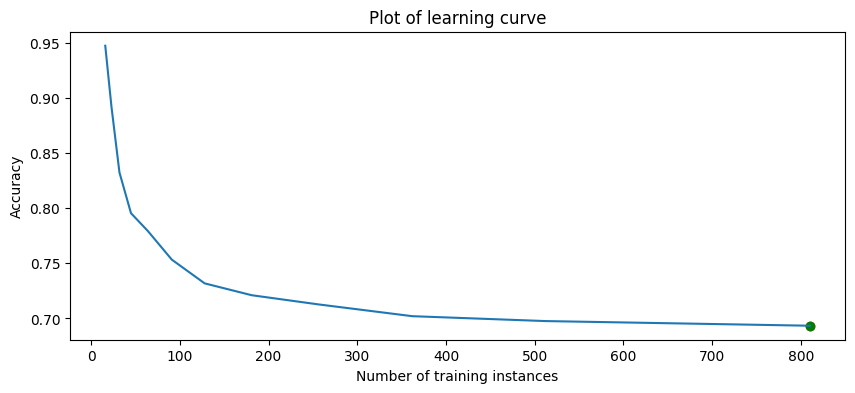

28it [01:04,  2.42s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 912 is non-monotonic: True, size: 12


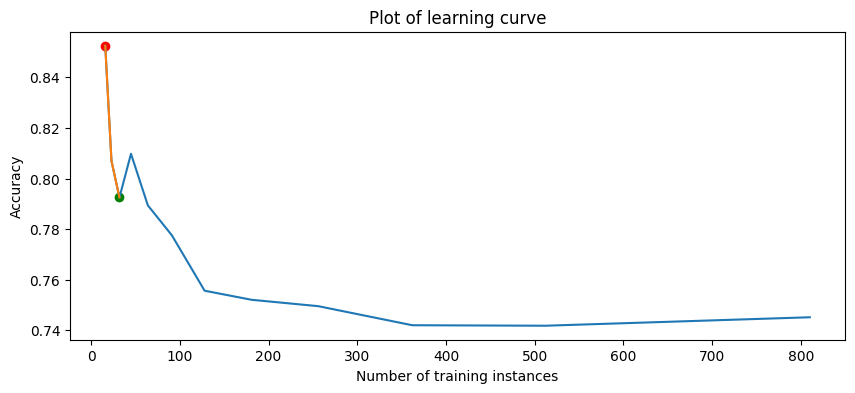

29it [01:06,  2.36s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 913 is non-monotonic: True, size: 12


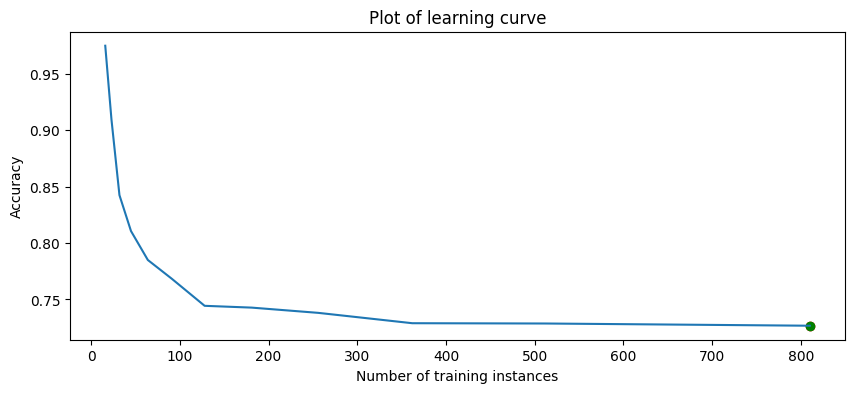

30it [01:09,  2.35s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 914 is non-monotonic: True, size: 14


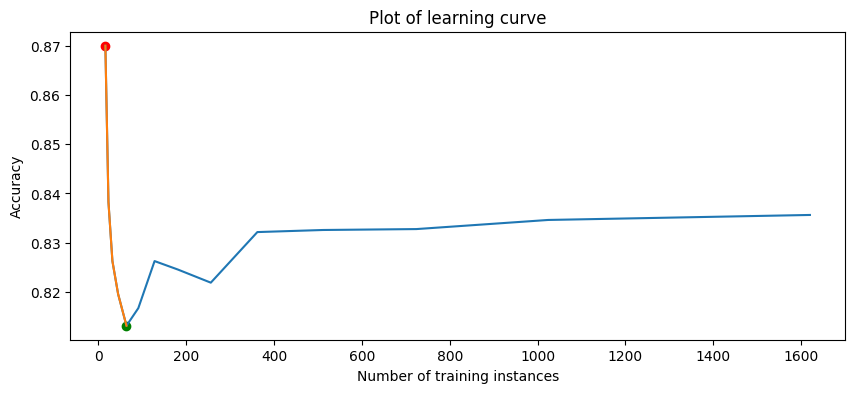

31it [01:11,  2.35s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 917 is non-monotonic: True, size: 12


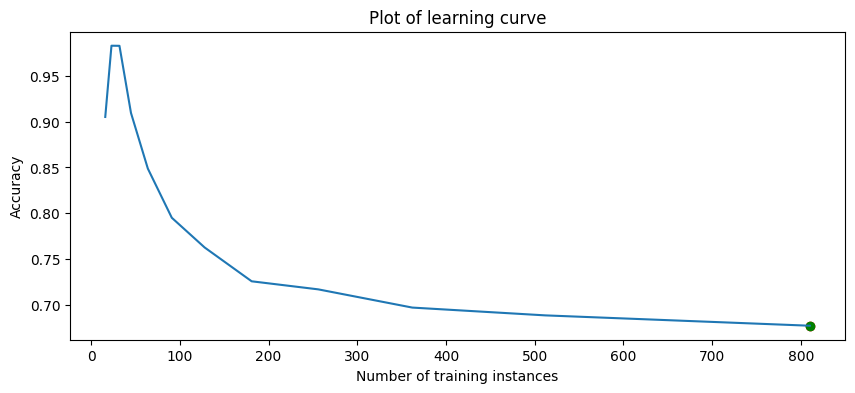

32it [01:13,  2.37s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 966 is non-monotonic: True, size: 14


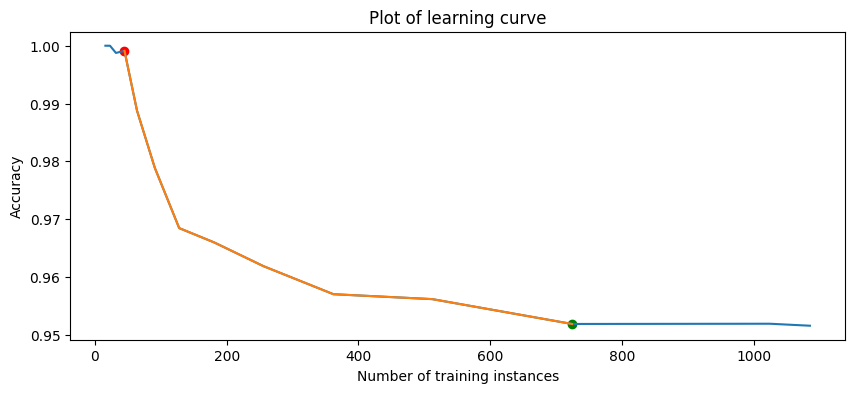

33it [01:16,  2.33s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 991 is non-monotonic: True, size: 14


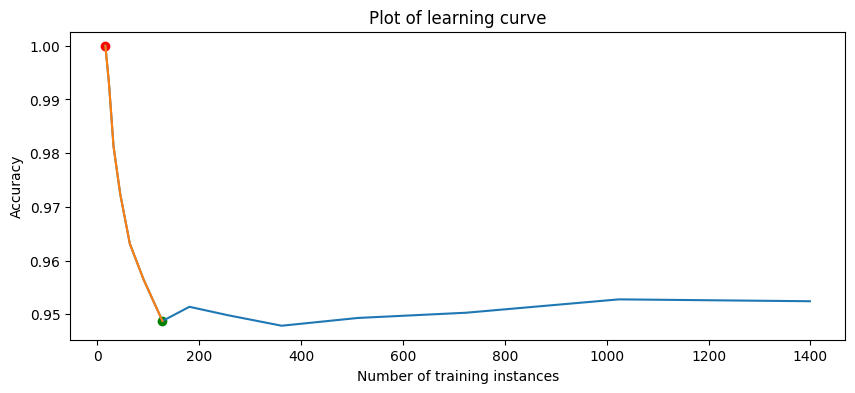

34it [01:18,  2.32s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 1448 is non-monotonic: True, size: 8


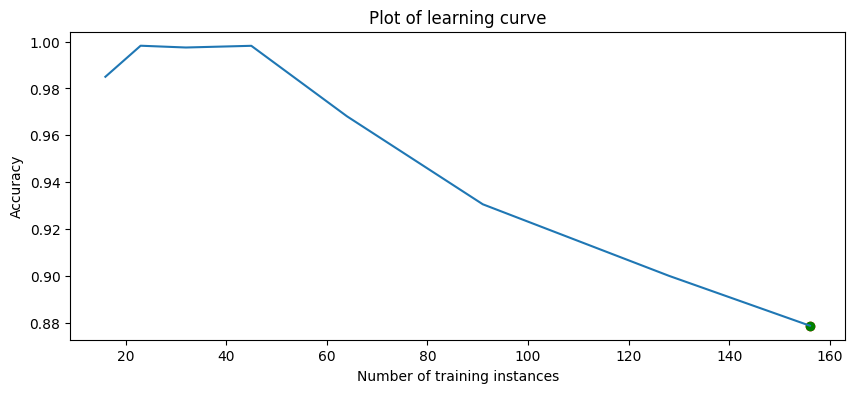

35it [01:20,  2.33s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 1450 is non-monotonic: True, size: 6


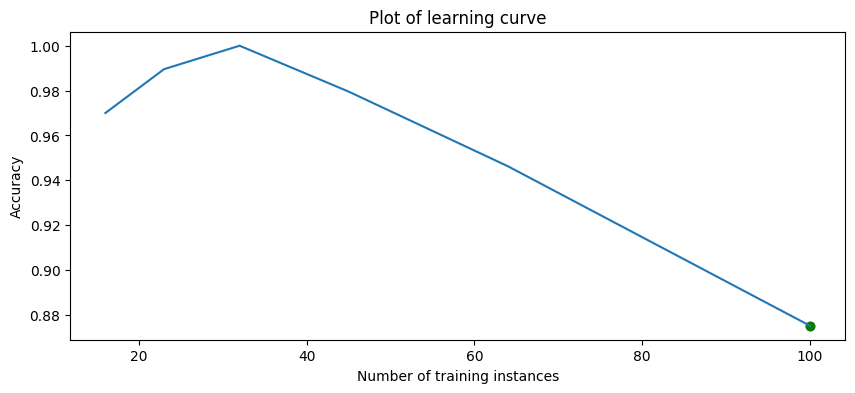

36it [01:23,  2.31s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 1465 is non-monotonic: True, size: 6


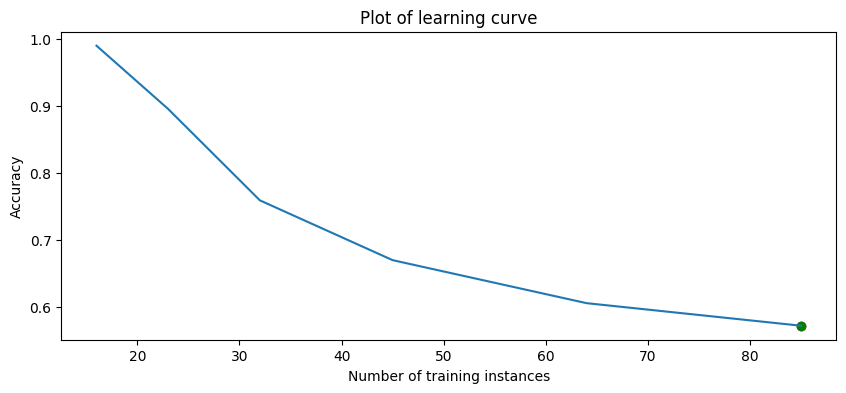

37it [01:25,  2.44s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 1488 is non-monotonic: True, size: 8


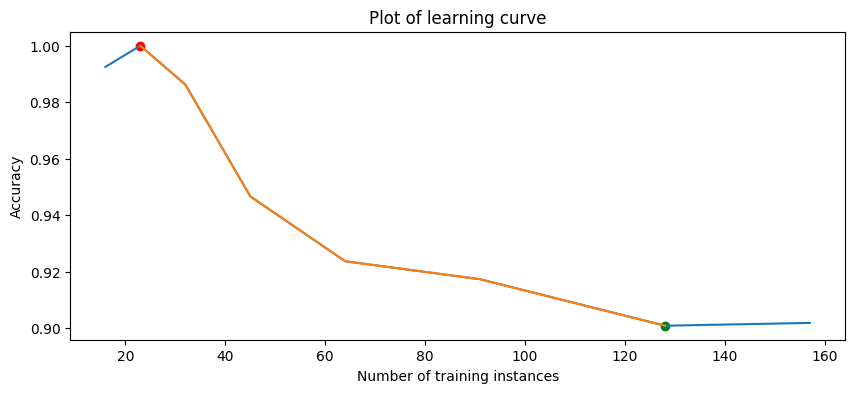

38it [01:28,  2.42s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 1489 is non-monotonic: True, size: 18


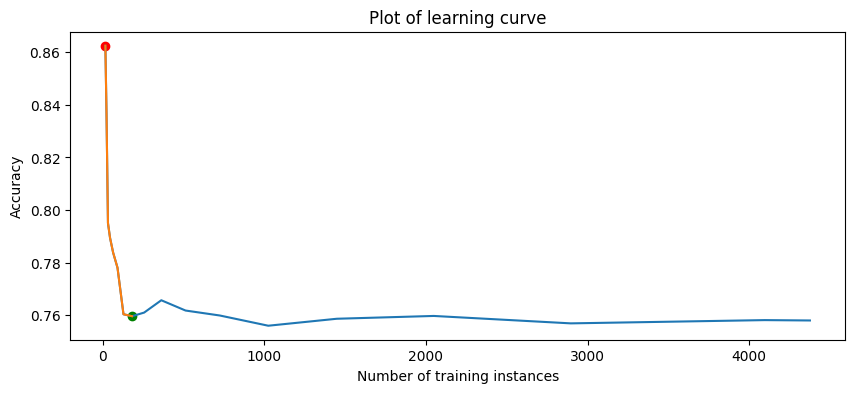

39it [01:30,  2.45s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 1499 is non-monotonic: True, size: 8


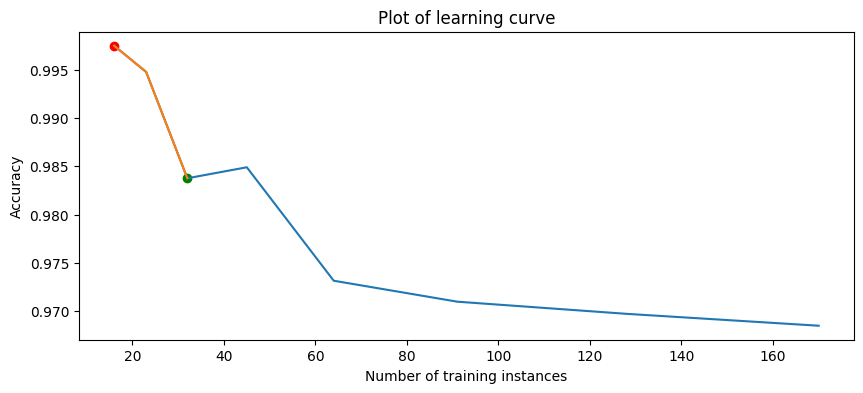

40it [01:33,  2.48s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 40971 is non-monotonic: True, size: 12


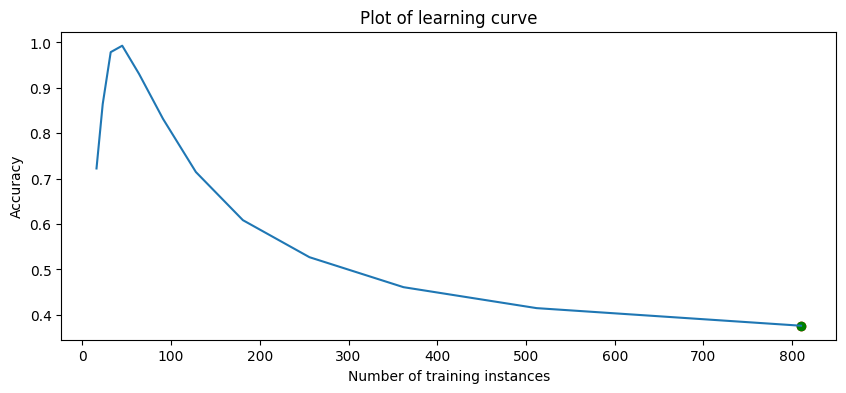

41it [01:35,  2.41s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 40975 is non-monotonic: True, size: 14


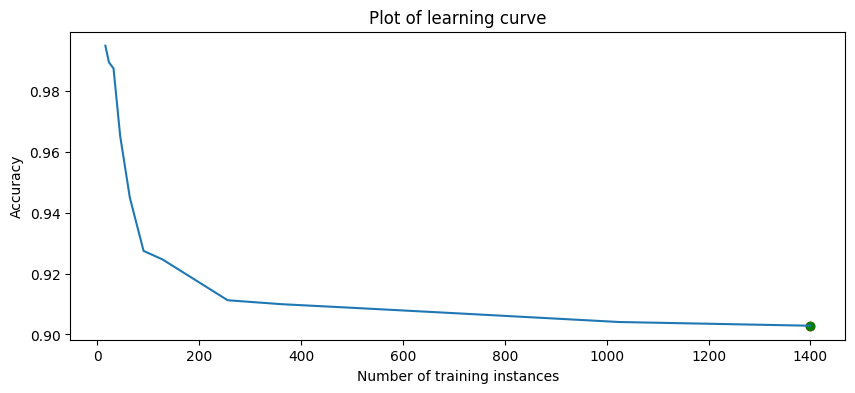

42it [01:37,  2.35s/it]

sklearn.discriminant_analysis.LinearDiscriminantAnalysis on 40981 is non-monotonic: True, size: 12


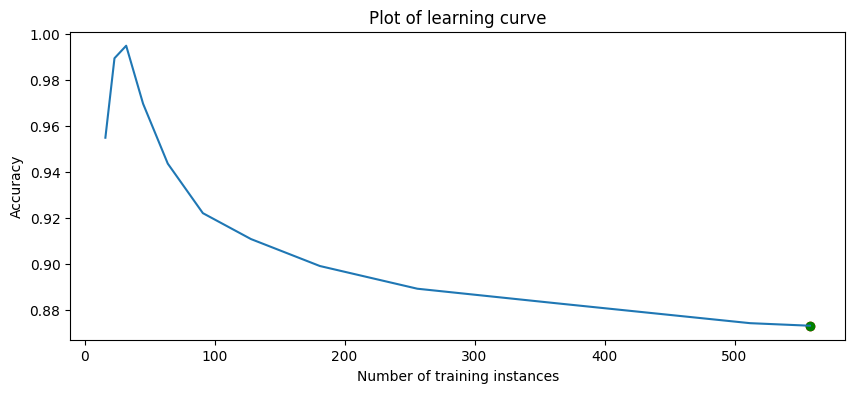

43it [01:40,  2.33s/it]
0it [00:00, ?it/s]

sklearn.linear_model.LogisticRegression on 11 is non-monotonic: True, size: 10


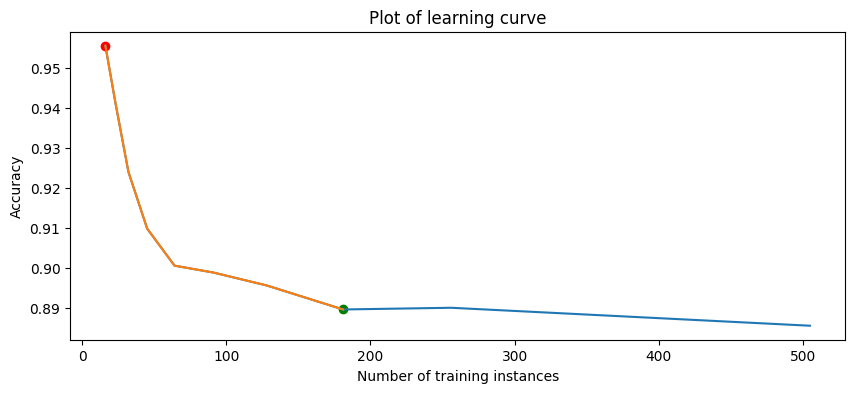

1it [00:02,  2.25s/it]

sklearn.linear_model.LogisticRegression on 13 is non-monotonic: True, size: 8


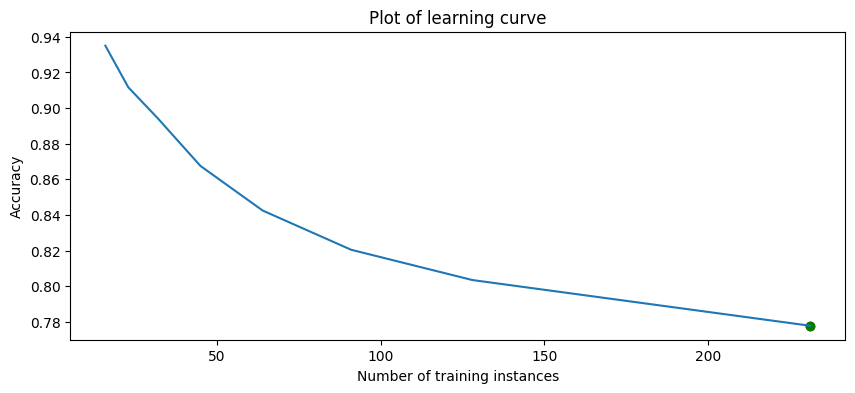

2it [00:04,  2.37s/it]

sklearn.linear_model.LogisticRegression on 31 is non-monotonic: True, size: 12


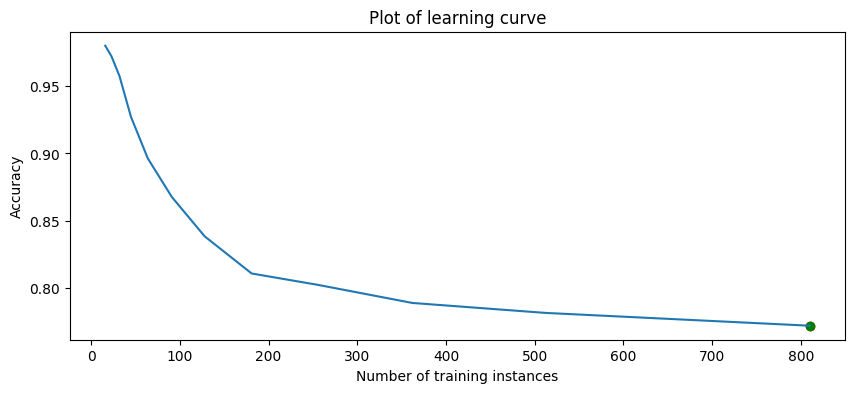

3it [00:06,  2.31s/it]

sklearn.linear_model.LogisticRegression on 55 is non-monotonic: True, size: 6


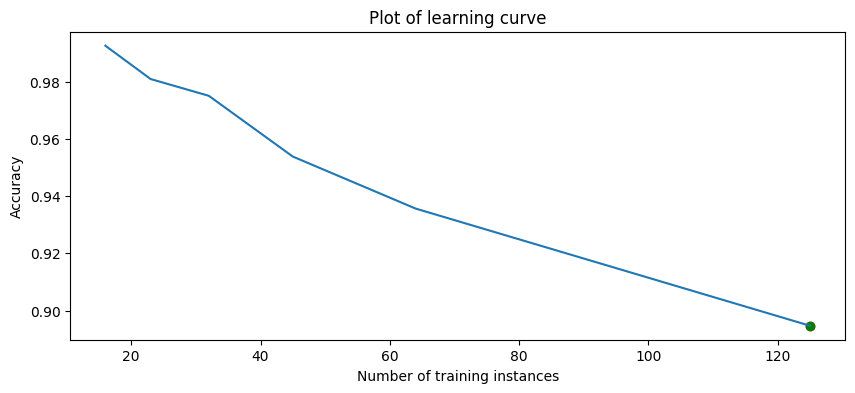

4it [00:09,  2.27s/it]

sklearn.linear_model.LogisticRegression on 61 is non-monotonic: True, size: 6


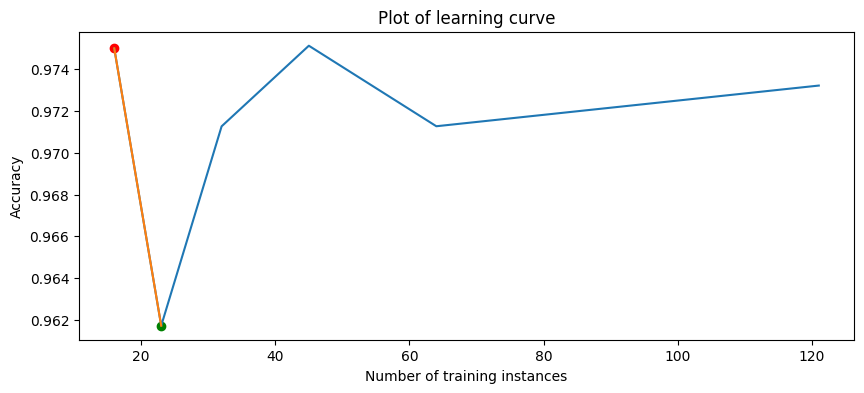

5it [00:11,  2.29s/it]

sklearn.linear_model.LogisticRegression on 336 is non-monotonic: True, size: 8


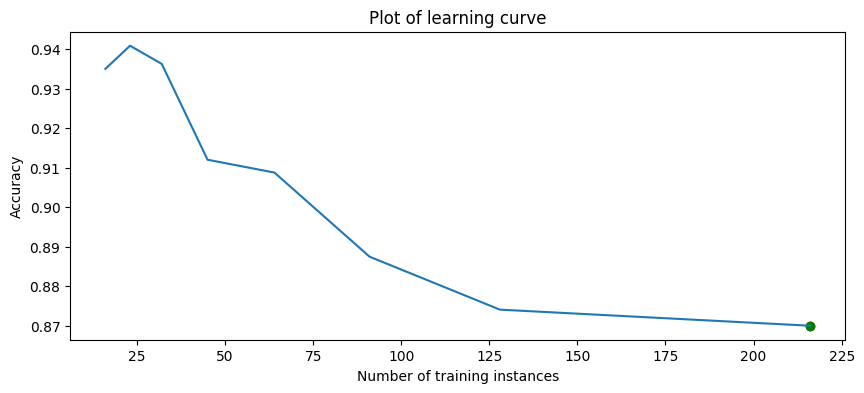

6it [00:13,  2.29s/it]

sklearn.linear_model.LogisticRegression on 346 is non-monotonic: False, size: 4


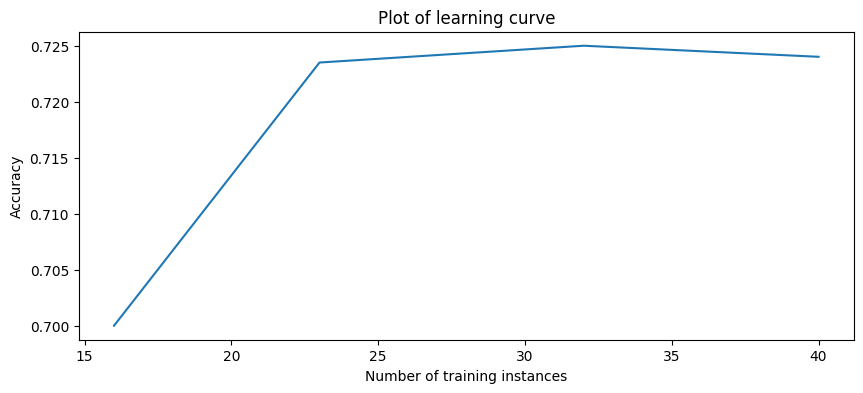

7it [00:15,  2.26s/it]

sklearn.linear_model.LogisticRegression on 380 is non-monotonic: True, size: 4


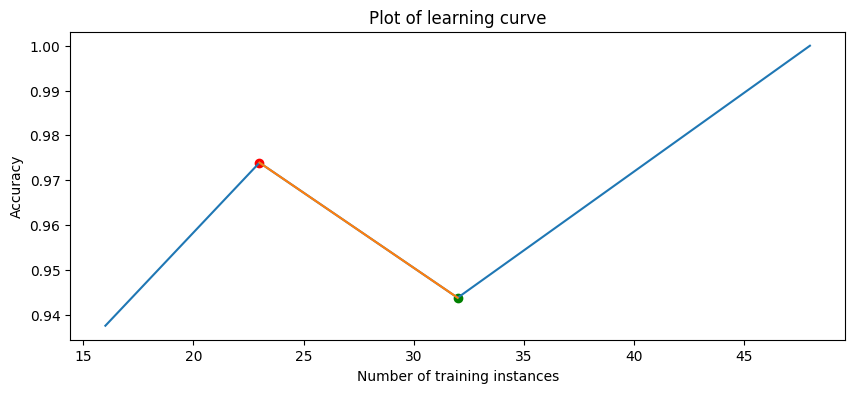

8it [00:18,  2.26s/it]

sklearn.linear_model.LogisticRegression on 446 is non-monotonic: True, size: 8


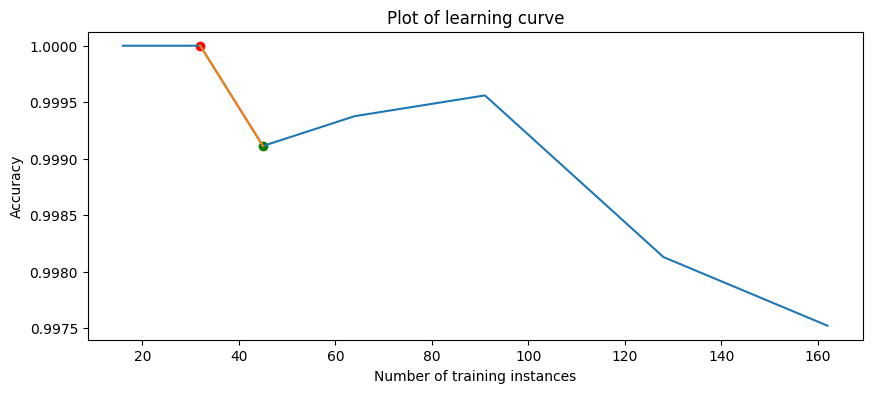

9it [00:20,  2.26s/it]

sklearn.linear_model.LogisticRegression on 679 is non-monotonic: True, size: 12


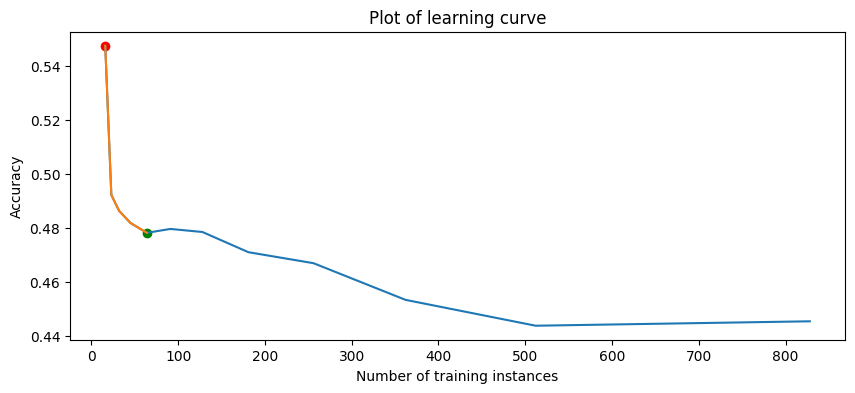

10it [00:22,  2.25s/it]

sklearn.linear_model.LogisticRegression on 715 is non-monotonic: True, size: 12


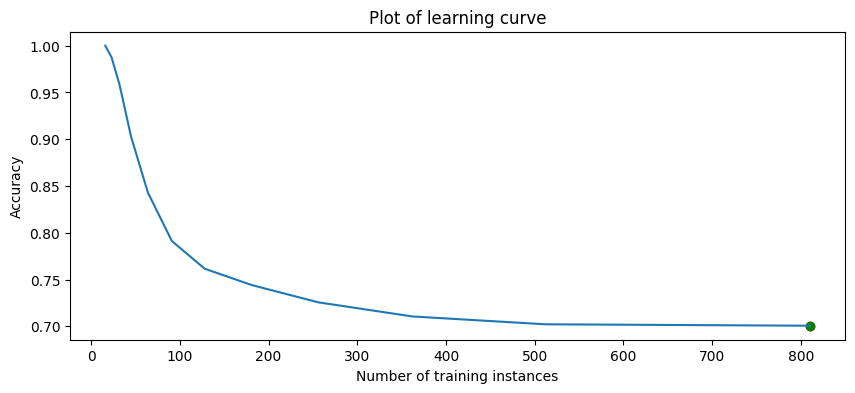

11it [00:24,  2.25s/it]

sklearn.linear_model.LogisticRegression on 718 is non-monotonic: True, size: 12


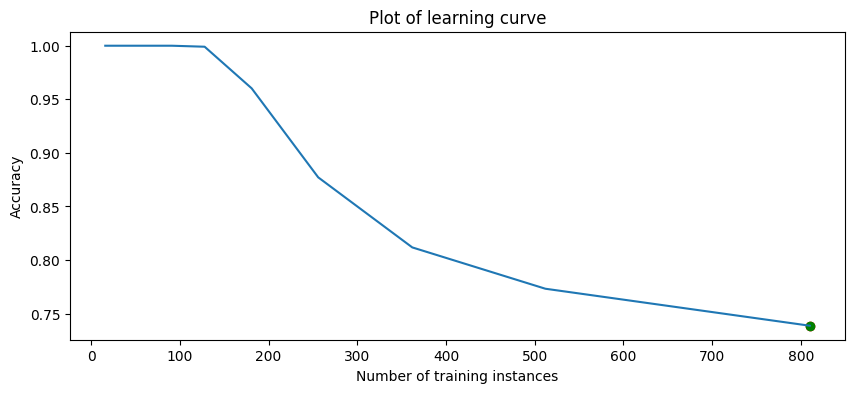

12it [00:27,  2.25s/it]

sklearn.linear_model.LogisticRegression on 720 is non-monotonic: True, size: 16


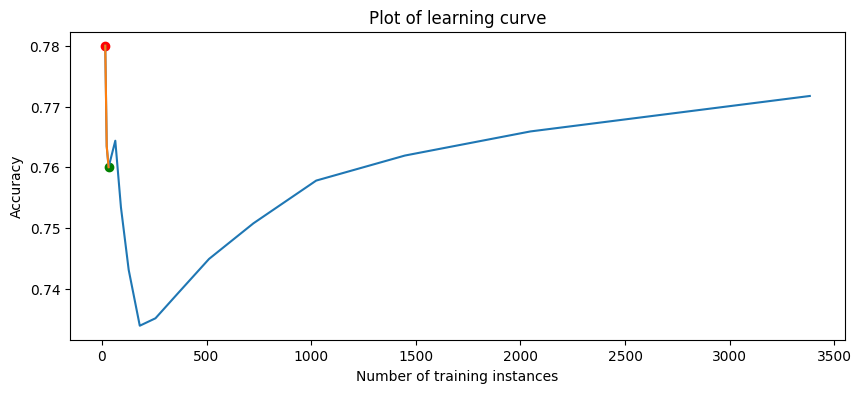

13it [00:29,  2.23s/it]

sklearn.linear_model.LogisticRegression on 723 is non-monotonic: True, size: 12


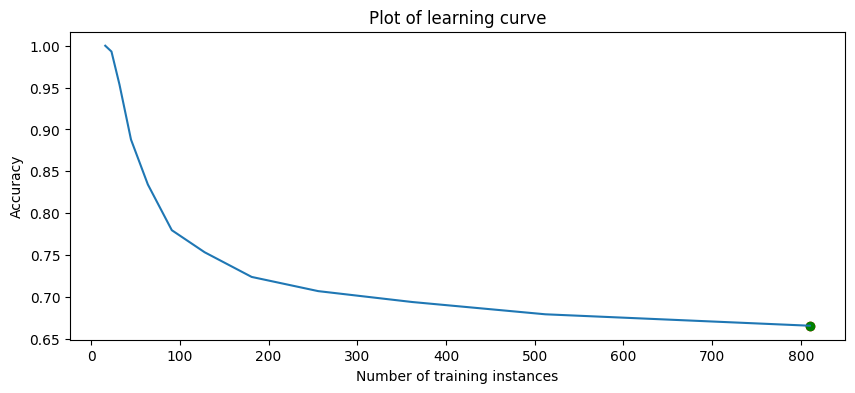

14it [00:31,  2.24s/it]

sklearn.linear_model.LogisticRegression on 728 is non-monotonic: True, size: 16


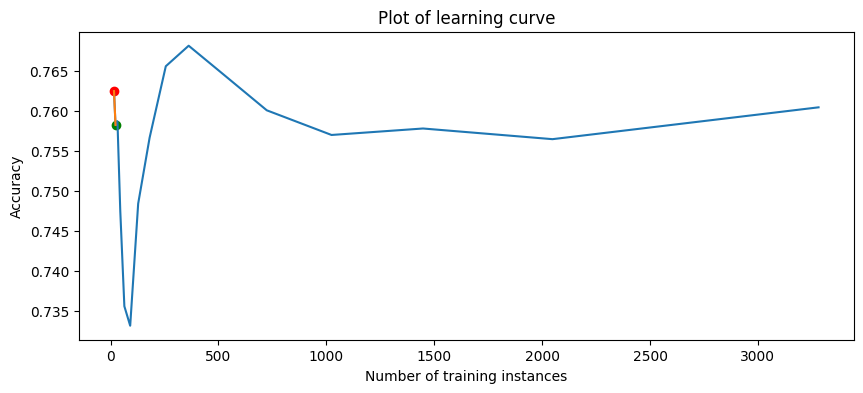

15it [00:33,  2.24s/it]

sklearn.linear_model.LogisticRegression on 737 is non-monotonic: True, size: 16


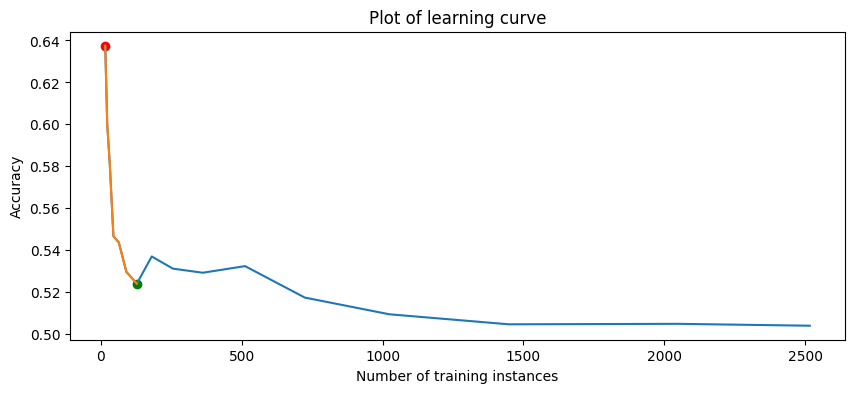

16it [00:36,  2.24s/it]

sklearn.linear_model.LogisticRegression on 740 is non-monotonic: True, size: 12


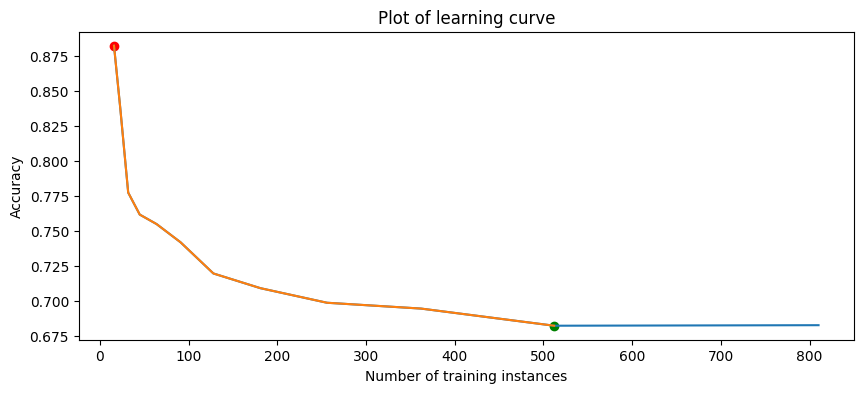

17it [00:38,  2.26s/it]

sklearn.linear_model.LogisticRegression on 741 is non-monotonic: True, size: 12


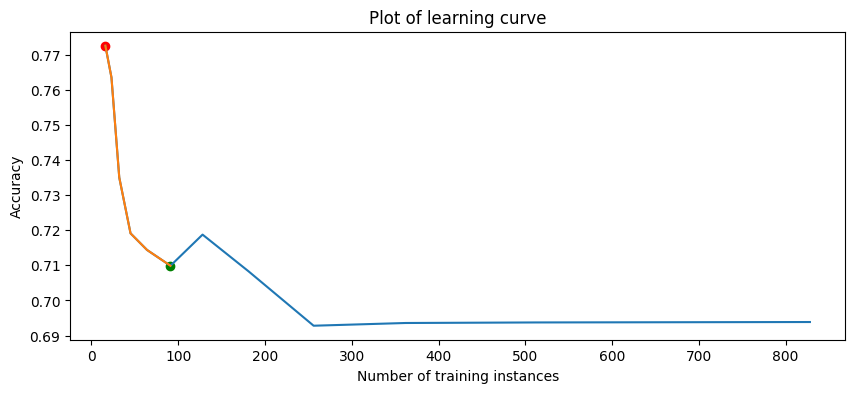

18it [00:40,  2.27s/it]

sklearn.linear_model.LogisticRegression on 743 is non-monotonic: True, size: 12


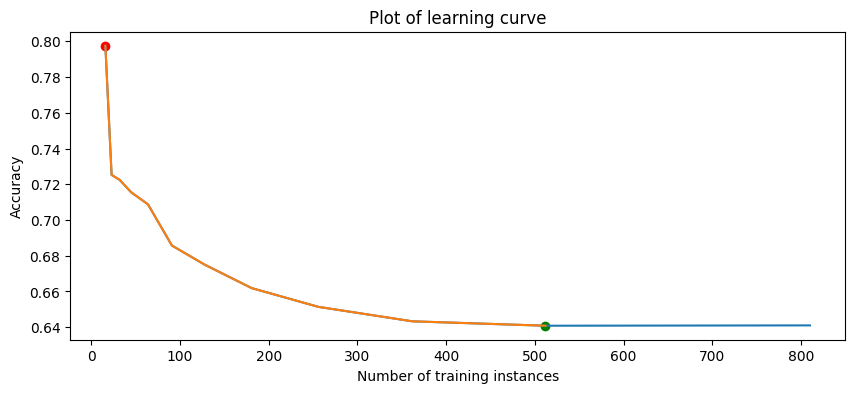

19it [00:42,  2.26s/it]

sklearn.linear_model.LogisticRegression on 751 is non-monotonic: True, size: 12


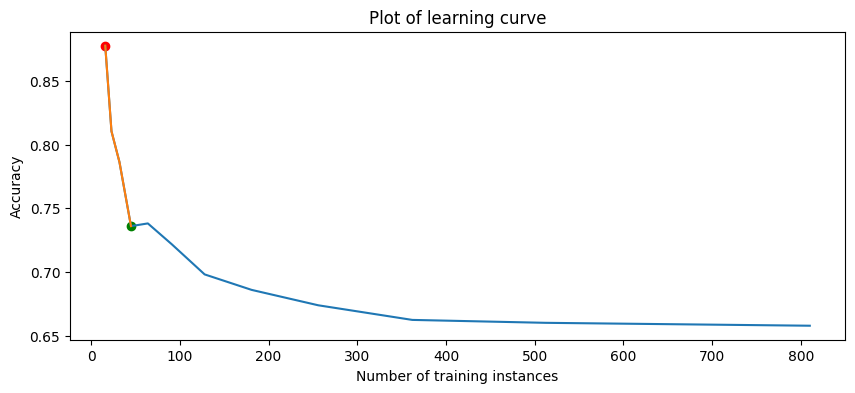

20it [00:45,  2.25s/it]

sklearn.linear_model.LogisticRegression on 772 is non-monotonic: True, size: 14


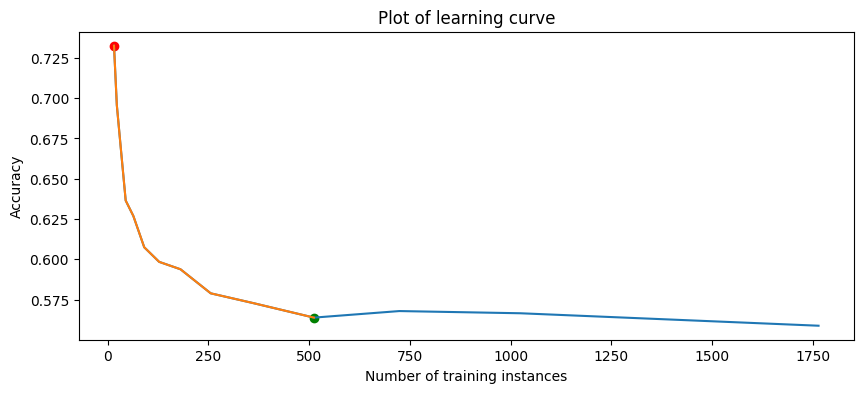

21it [00:47,  2.27s/it]

sklearn.linear_model.LogisticRegression on 797 is non-monotonic: True, size: 12


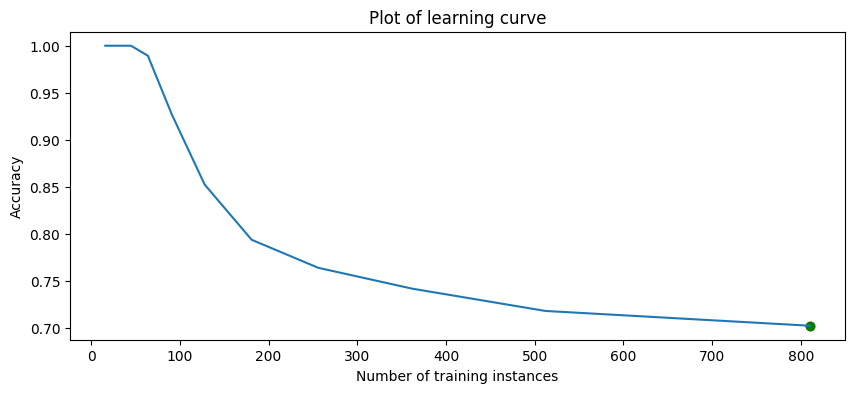

22it [00:49,  2.26s/it]

sklearn.linear_model.LogisticRegression on 799 is non-monotonic: True, size: 12


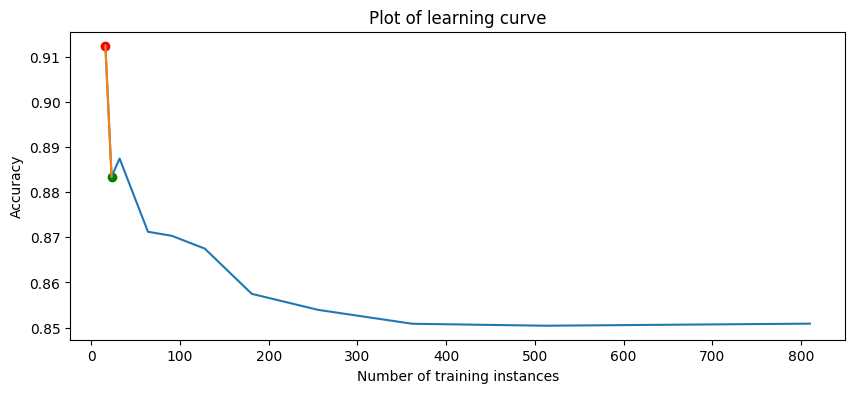

23it [00:51,  2.24s/it]

sklearn.linear_model.LogisticRegression on 803 is non-monotonic: True, size: 18


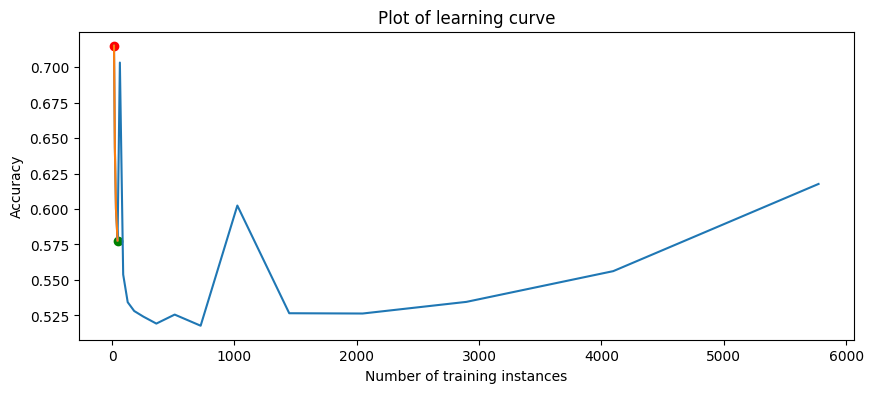

24it [00:54,  2.40s/it]

sklearn.linear_model.LogisticRegression on 806 is non-monotonic: True, size: 12


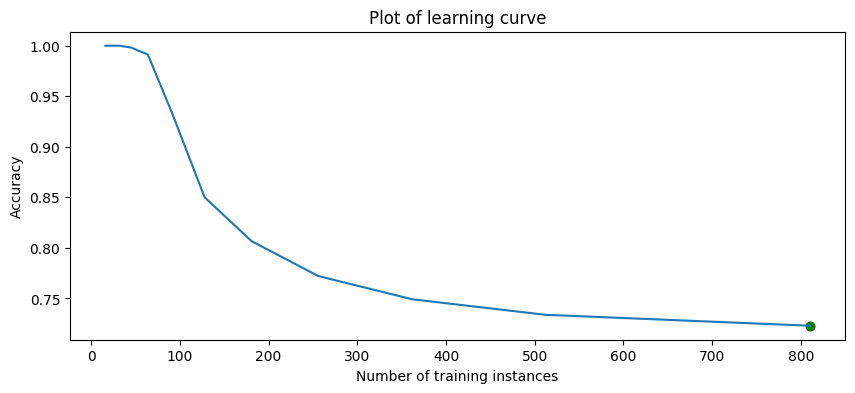

25it [00:57,  2.66s/it]

sklearn.linear_model.LogisticRegression on 807 is non-monotonic: True, size: 18


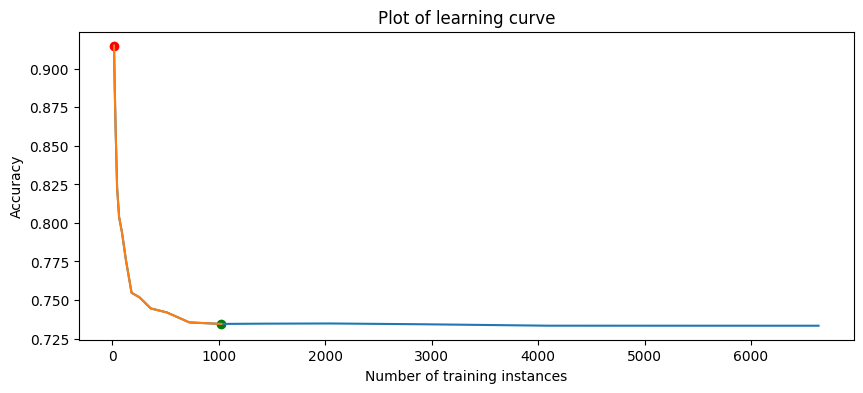

26it [01:00,  2.64s/it]

sklearn.linear_model.LogisticRegression on 813 is non-monotonic: True, size: 12


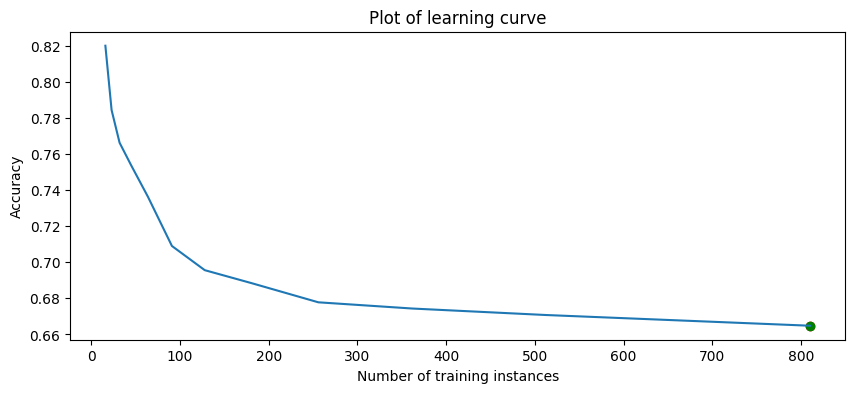

27it [01:02,  2.57s/it]

sklearn.linear_model.LogisticRegression on 816 is non-monotonic: True, size: 18


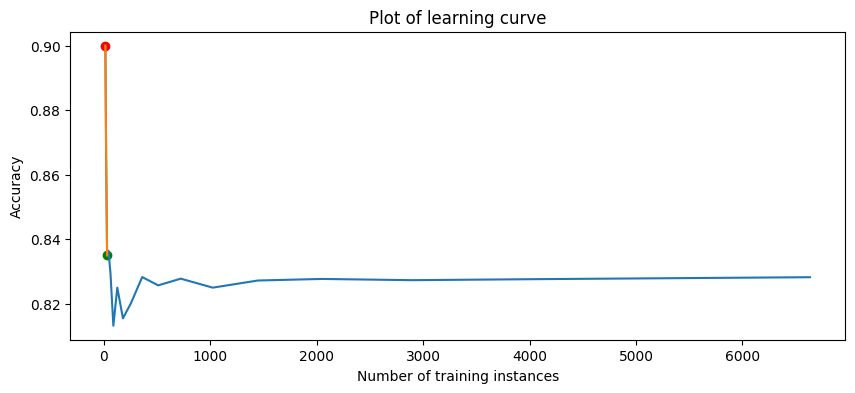

28it [01:05,  2.46s/it]

sklearn.linear_model.LogisticRegression on 821 is non-monotonic: True, size: 22


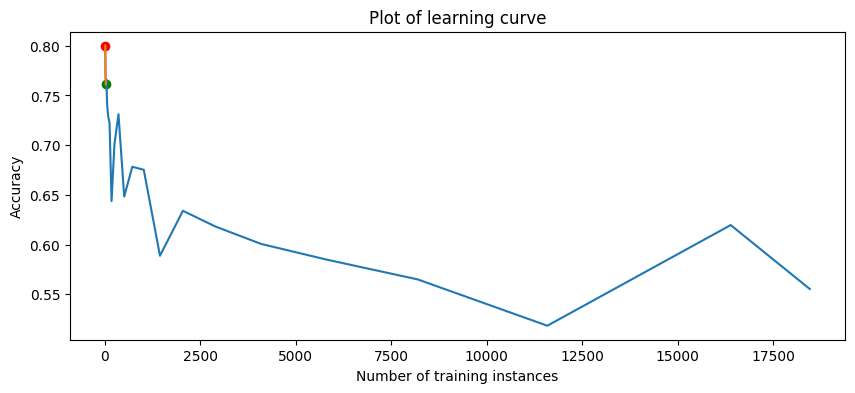

29it [01:07,  2.39s/it]

sklearn.linear_model.LogisticRegression on 837 is non-monotonic: True, size: 12


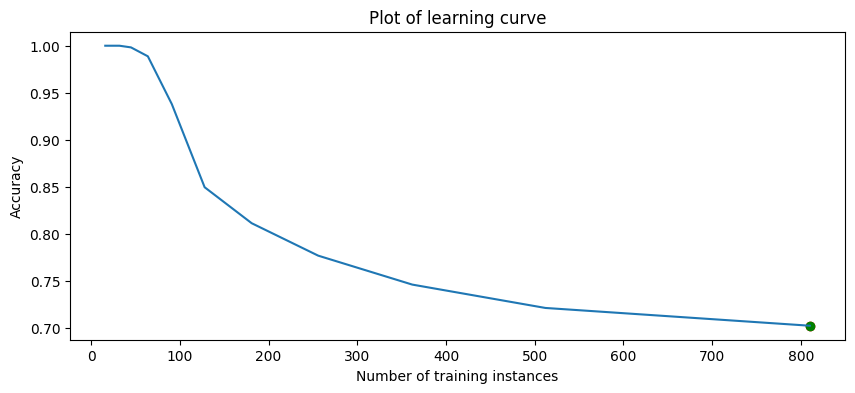

30it [01:09,  2.38s/it]

sklearn.linear_model.LogisticRegression on 845 is non-monotonic: True, size: 12


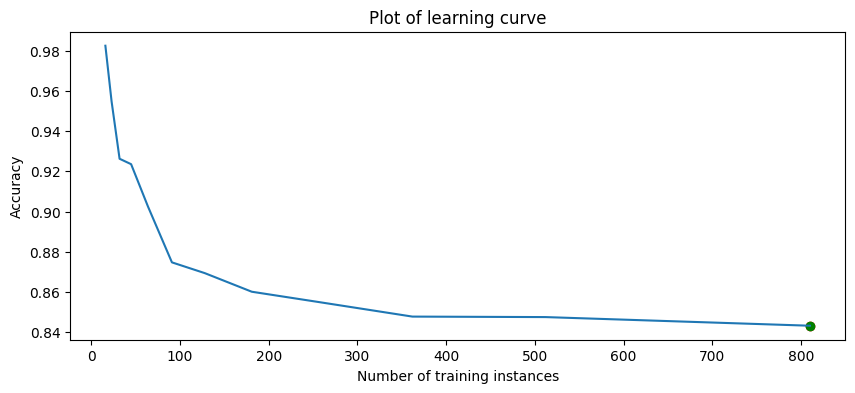

31it [01:12,  2.40s/it]

sklearn.linear_model.LogisticRegression on 849 is non-monotonic: True, size: 12


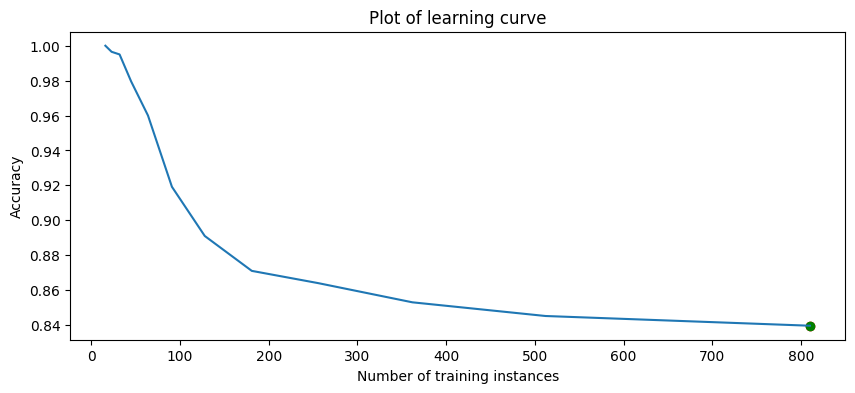

32it [01:14,  2.42s/it]

sklearn.linear_model.LogisticRegression on 866 is non-monotonic: True, size: 12


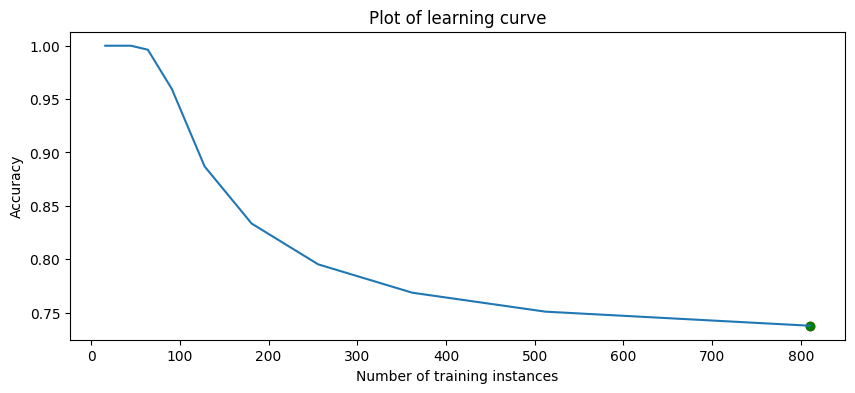

33it [01:16,  2.37s/it]

sklearn.linear_model.LogisticRegression on 871 is non-monotonic: True, size: 16


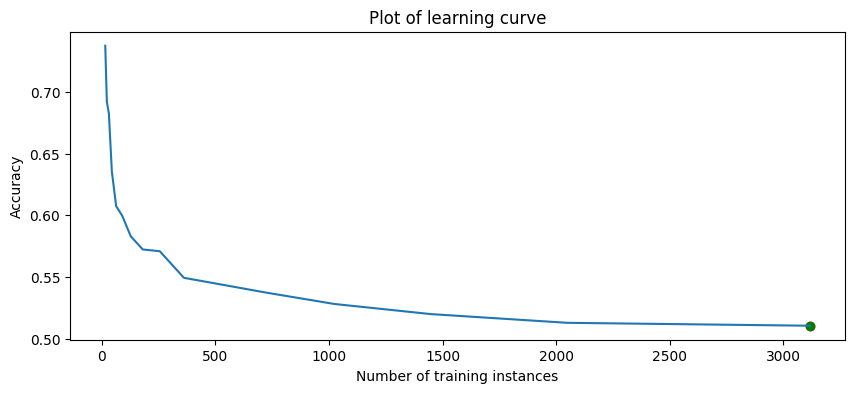

34it [01:19,  2.32s/it]

sklearn.linear_model.LogisticRegression on 897 is non-monotonic: True, size: 12


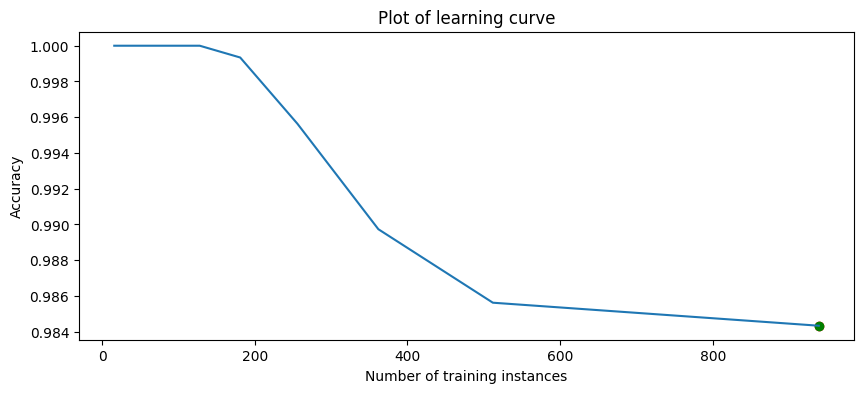

35it [01:21,  2.29s/it]

sklearn.linear_model.LogisticRegression on 903 is non-monotonic: True, size: 12


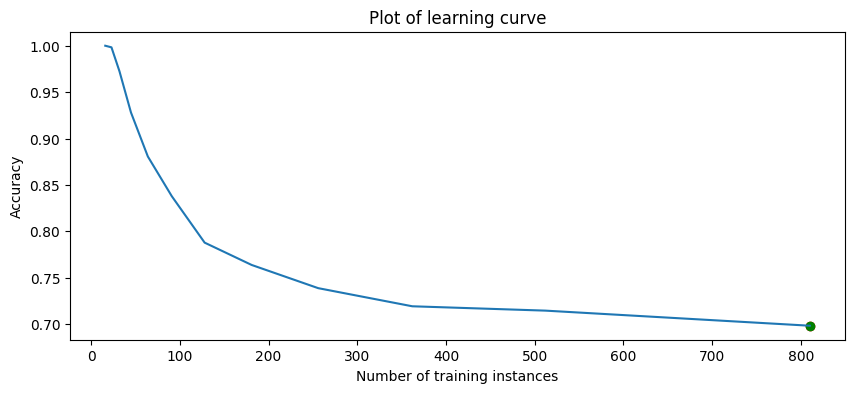

36it [01:23,  2.27s/it]

sklearn.linear_model.LogisticRegression on 904 is non-monotonic: True, size: 12


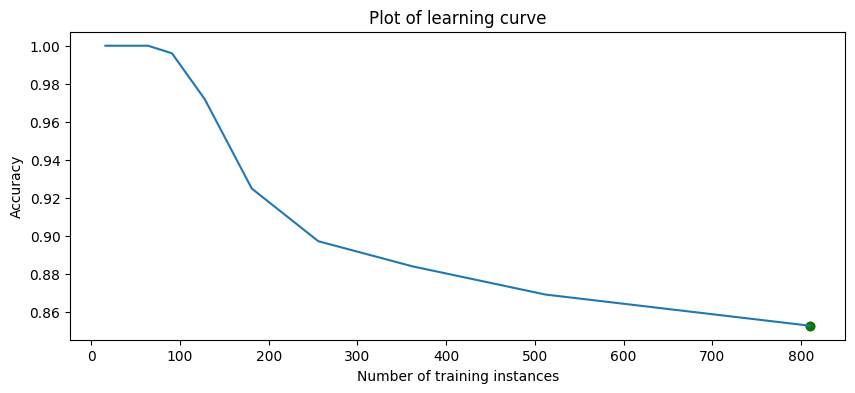

37it [01:25,  2.27s/it]

sklearn.linear_model.LogisticRegression on 910 is non-monotonic: True, size: 12


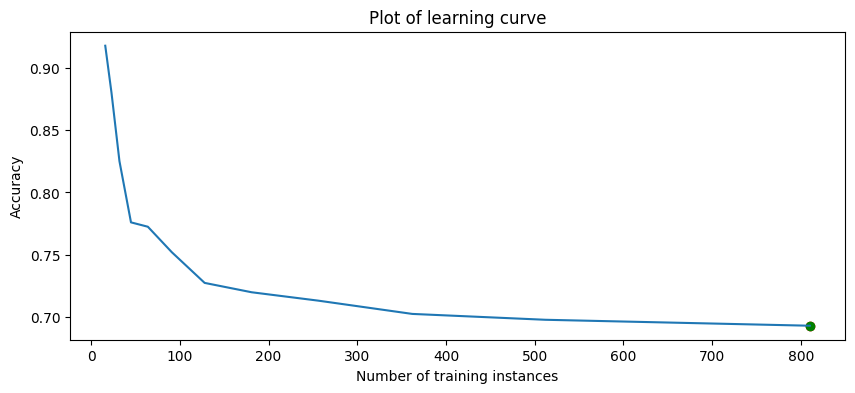

38it [01:28,  2.25s/it]

sklearn.linear_model.LogisticRegression on 912 is non-monotonic: True, size: 12


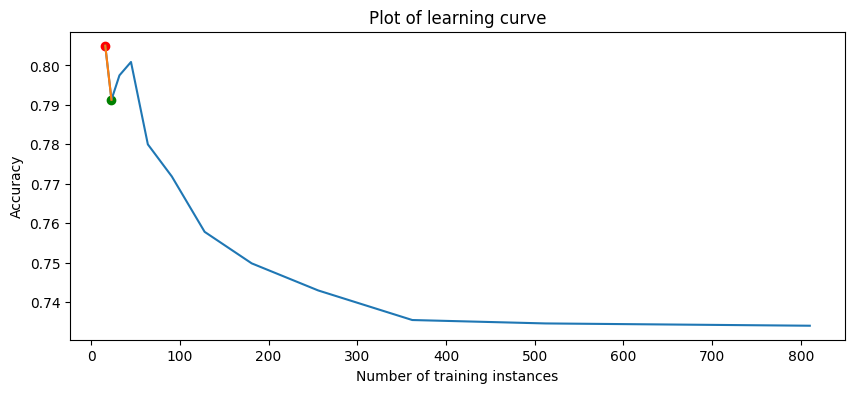

39it [01:30,  2.24s/it]

sklearn.linear_model.LogisticRegression on 913 is non-monotonic: True, size: 12


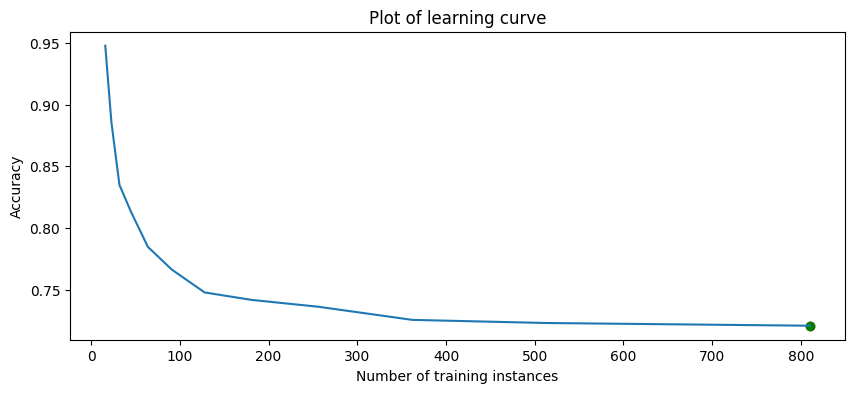

40it [01:32,  2.23s/it]

sklearn.linear_model.LogisticRegression on 914 is non-monotonic: True, size: 14


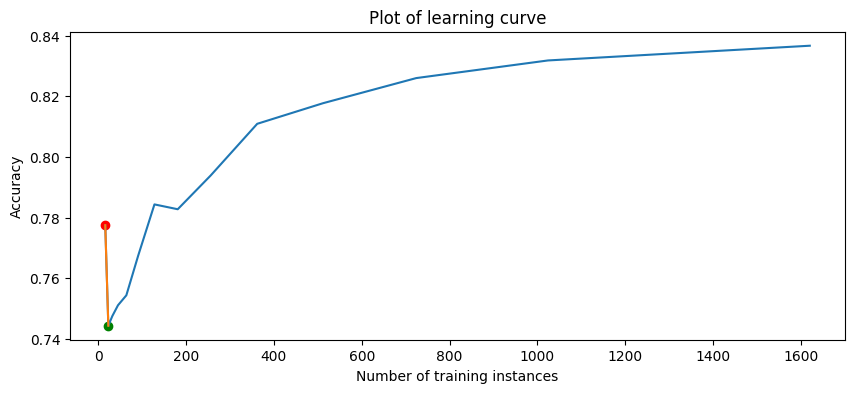

41it [01:34,  2.24s/it]

sklearn.linear_model.LogisticRegression on 917 is non-monotonic: True, size: 12


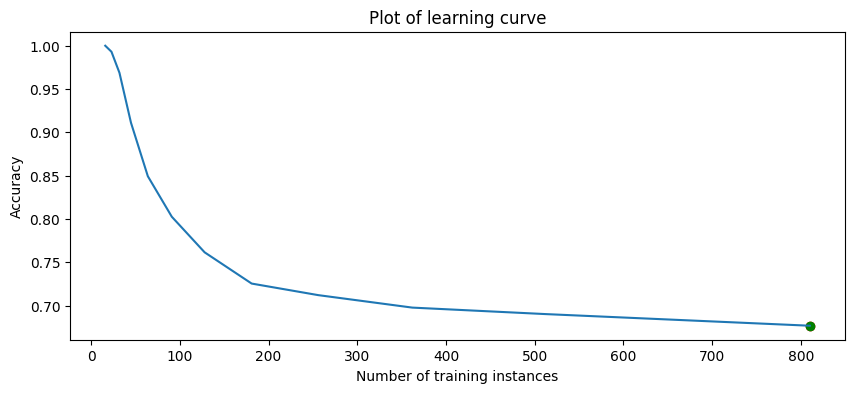

42it [01:36,  2.24s/it]

sklearn.linear_model.LogisticRegression on 934 is non-monotonic: True, size: 12


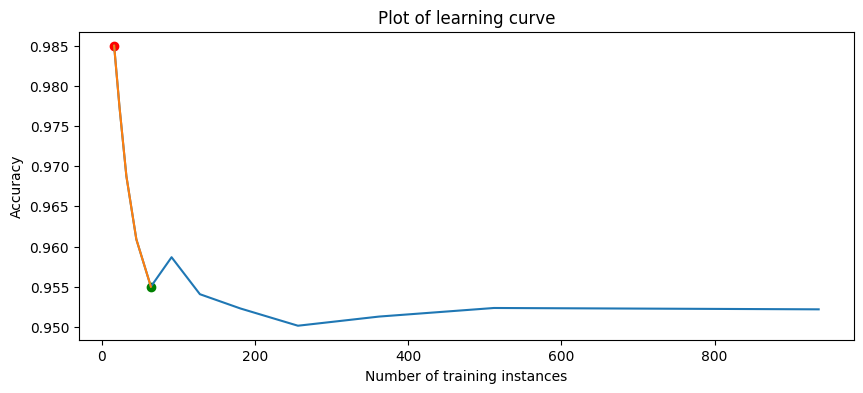

43it [01:39,  2.32s/it]

sklearn.linear_model.LogisticRegression on 959 is non-monotonic: False, size: 20


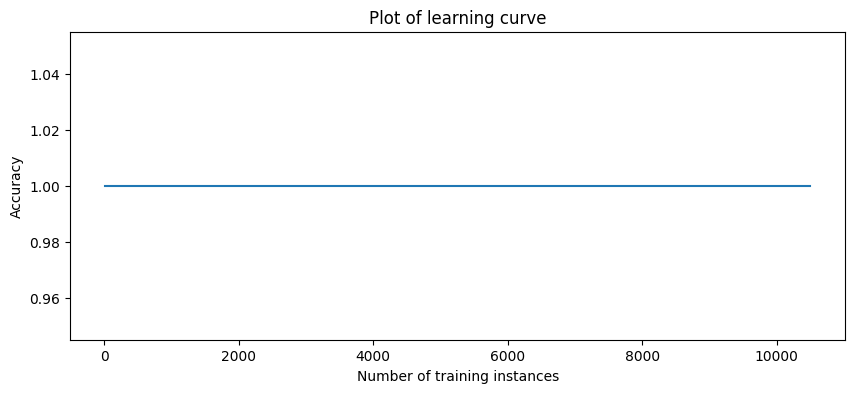

44it [01:41,  2.31s/it]

sklearn.linear_model.LogisticRegression on 962 is non-monotonic: True, size: 14


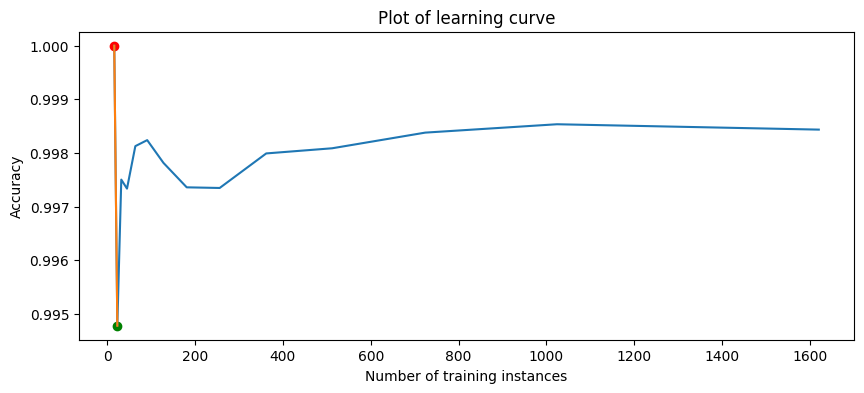

45it [01:44,  2.39s/it]

sklearn.linear_model.LogisticRegression on 966 is non-monotonic: True, size: 14


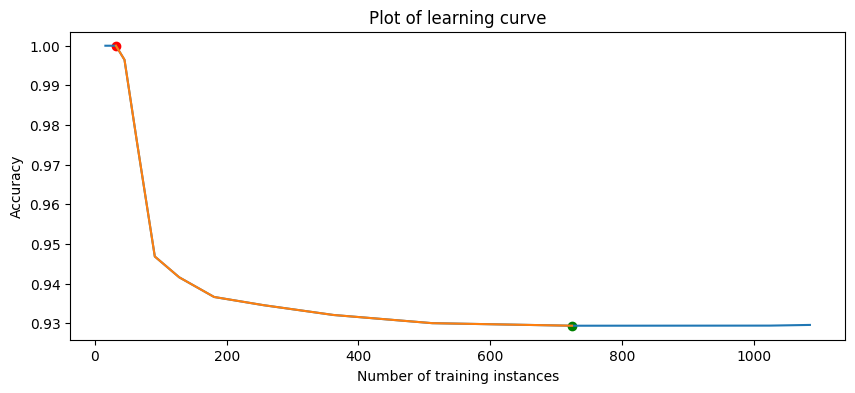

46it [01:46,  2.37s/it]

sklearn.linear_model.LogisticRegression on 971 is non-monotonic: True, size: 14


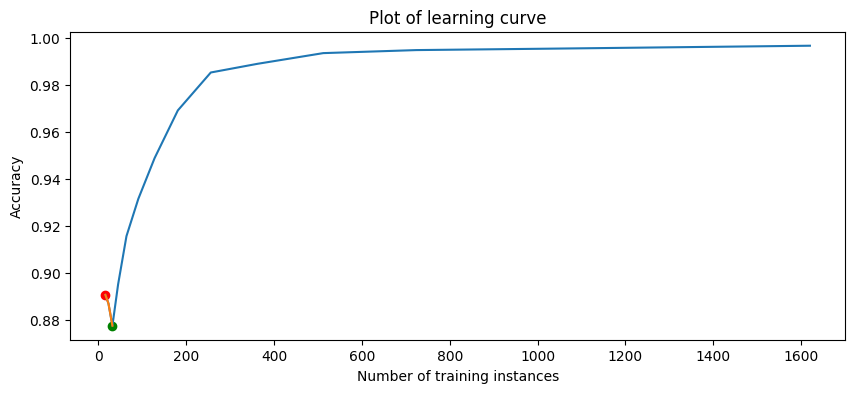

47it [01:48,  2.33s/it]

sklearn.linear_model.LogisticRegression on 979 is non-monotonic: True, size: 16


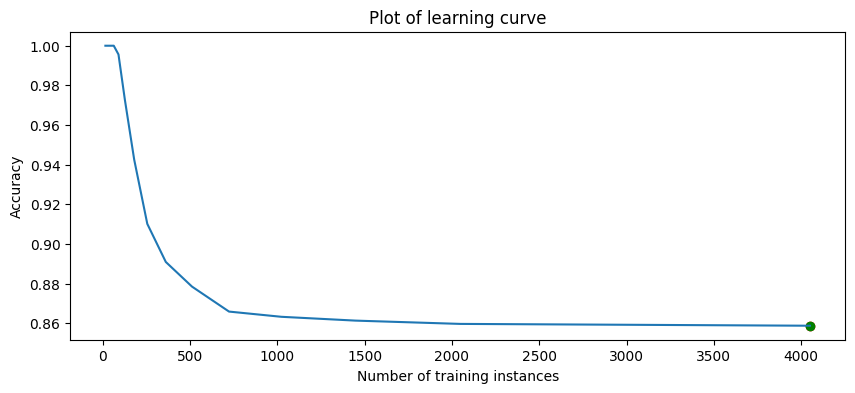

48it [01:51,  2.30s/it]

sklearn.linear_model.LogisticRegression on 991 is non-monotonic: True, size: 14


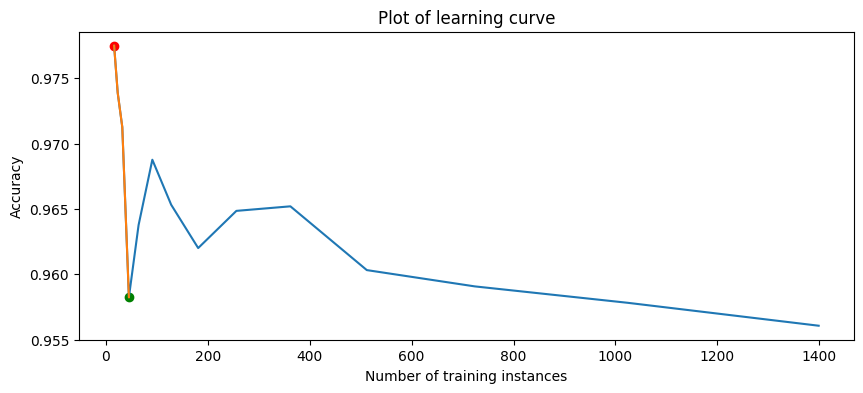

49it [01:53,  2.28s/it]

sklearn.linear_model.LogisticRegression on 1020 is non-monotonic: False, size: 14


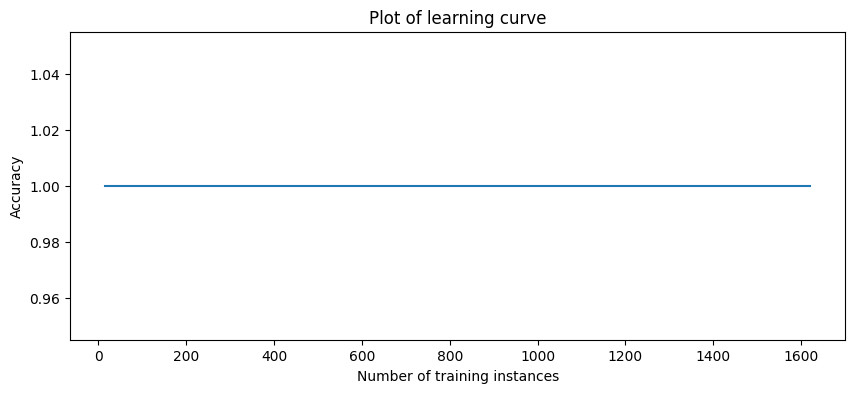

50it [01:55,  2.26s/it]

sklearn.linear_model.LogisticRegression on 1049 is non-monotonic: True, size: 14


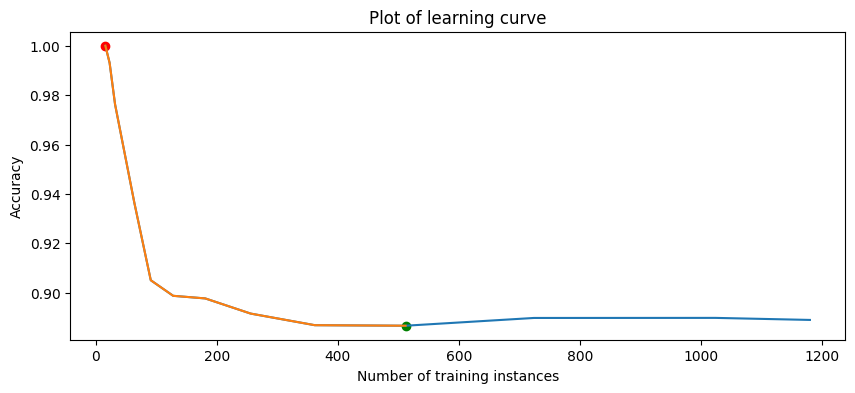

51it [01:57,  2.24s/it]

sklearn.linear_model.LogisticRegression on 1441 is non-monotonic: True, size: 6


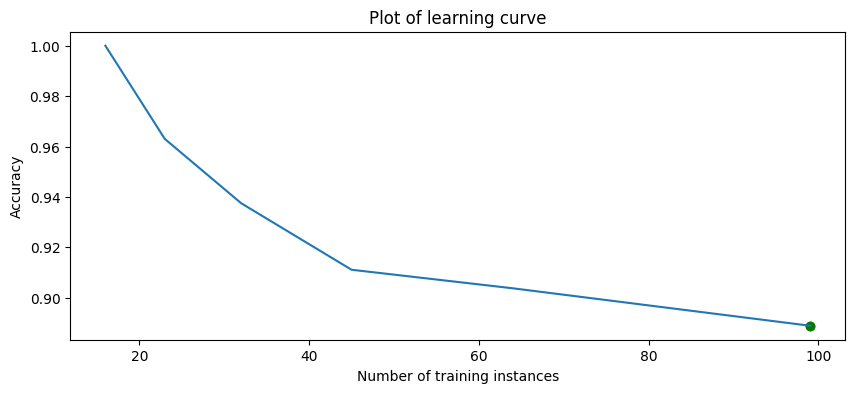

52it [01:59,  2.22s/it]

sklearn.linear_model.LogisticRegression on 1448 is non-monotonic: True, size: 8


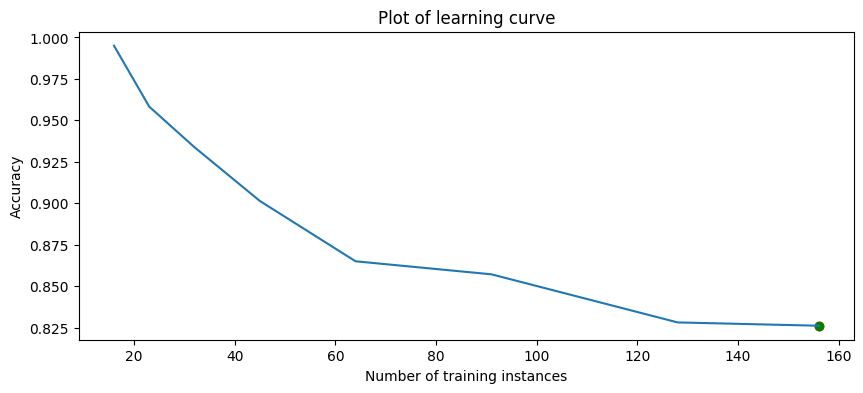

53it [02:02,  2.22s/it]

sklearn.linear_model.LogisticRegression on 1450 is non-monotonic: True, size: 6


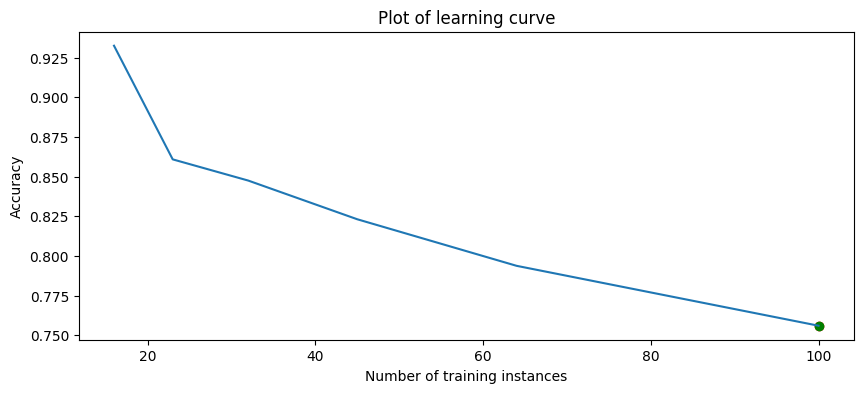

54it [02:04,  2.22s/it]

sklearn.linear_model.LogisticRegression on 1464 is non-monotonic: True, size: 12


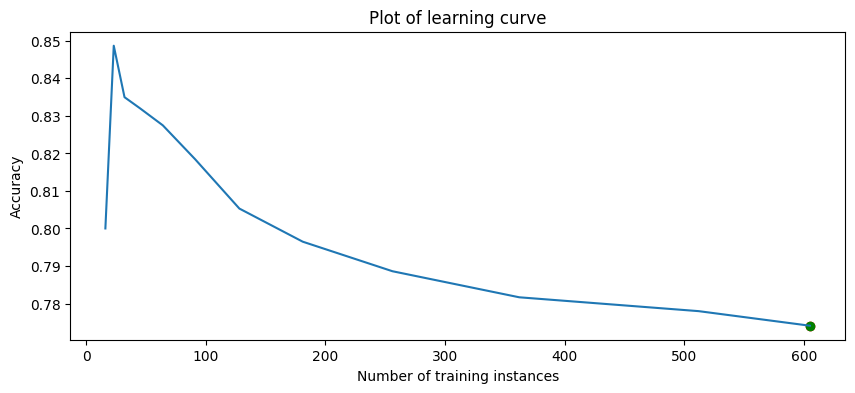

55it [02:06,  2.23s/it]

sklearn.linear_model.LogisticRegression on 1465 is non-monotonic: True, size: 6


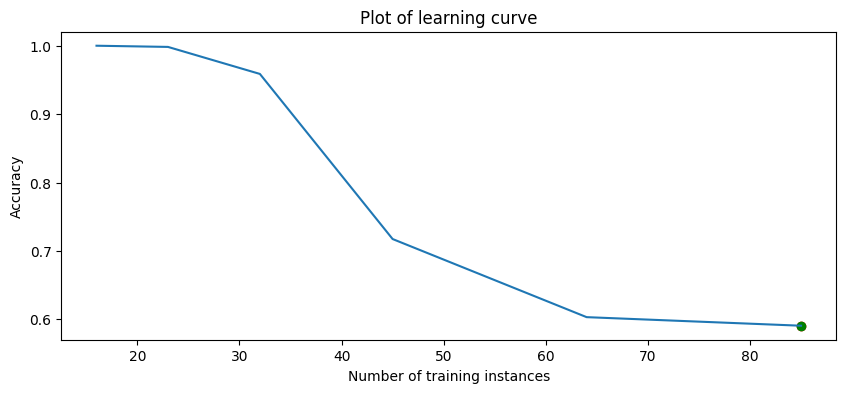

56it [02:09,  2.28s/it]

sklearn.linear_model.LogisticRegression on 1488 is non-monotonic: True, size: 8


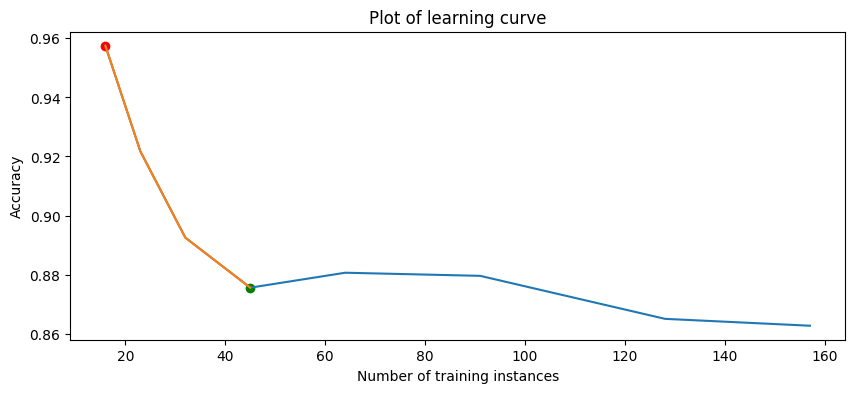

57it [02:11,  2.29s/it]

sklearn.linear_model.LogisticRegression on 1489 is non-monotonic: True, size: 18


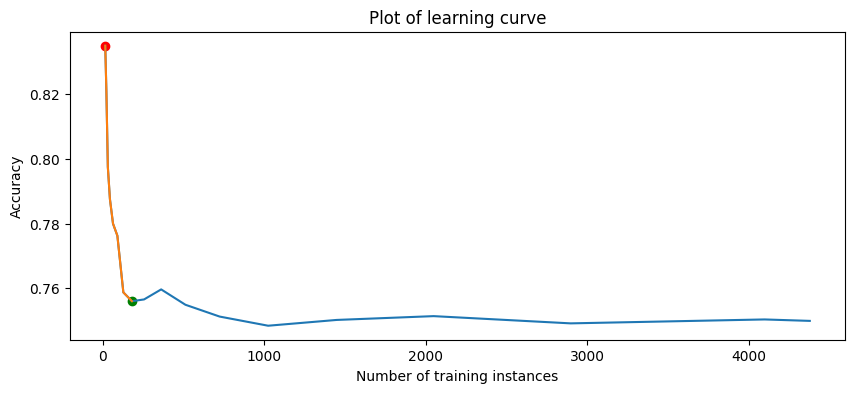

58it [02:13,  2.27s/it]

sklearn.linear_model.LogisticRegression on 1494 is non-monotonic: True, size: 12


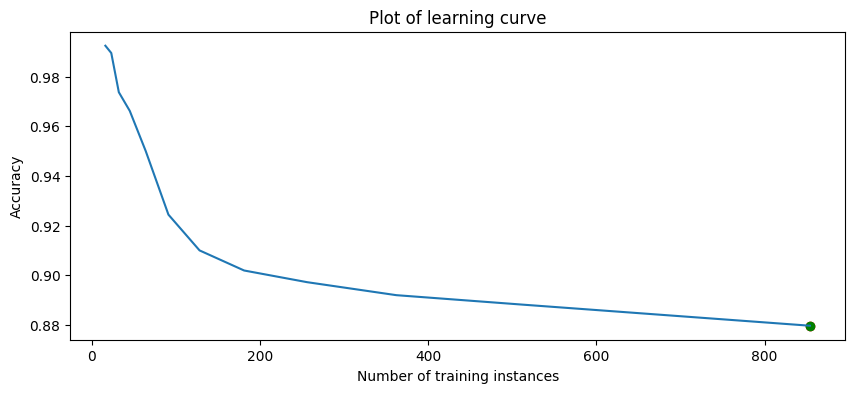

59it [02:15,  2.24s/it]

sklearn.linear_model.LogisticRegression on 40981 is non-monotonic: True, size: 12


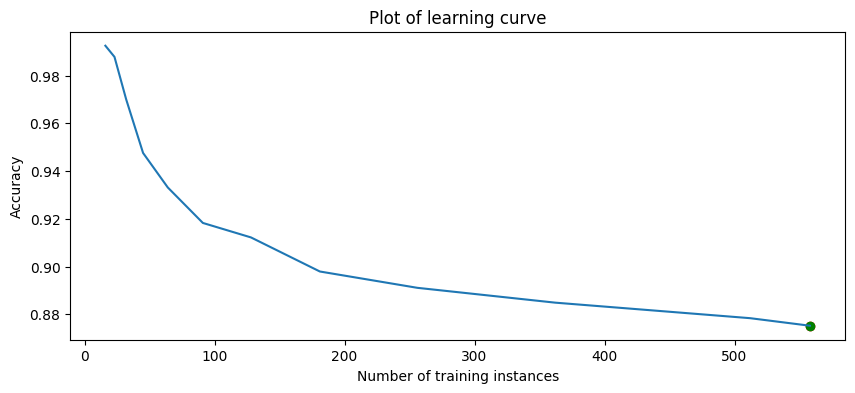

60it [02:17,  2.23s/it]

sklearn.linear_model.LogisticRegression on 40994 is non-monotonic: True, size: 10


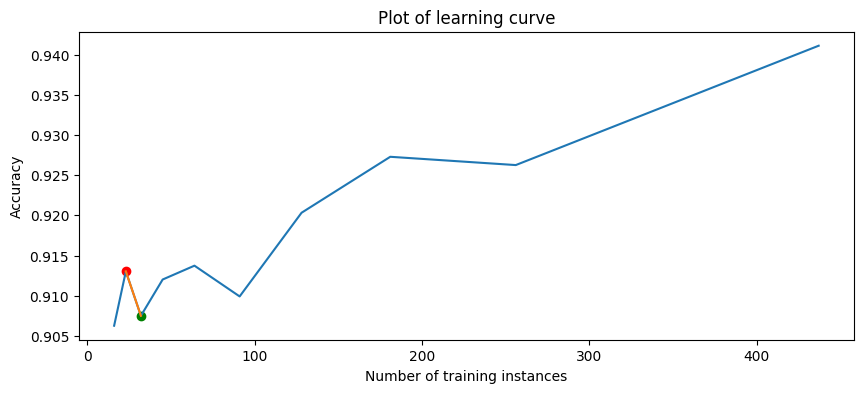

61it [02:20,  2.30s/it]
0it [00:00, ?it/s]

sklearn.linear_model.SGDClassifier on 3 is non-monotonic: True, size: 16


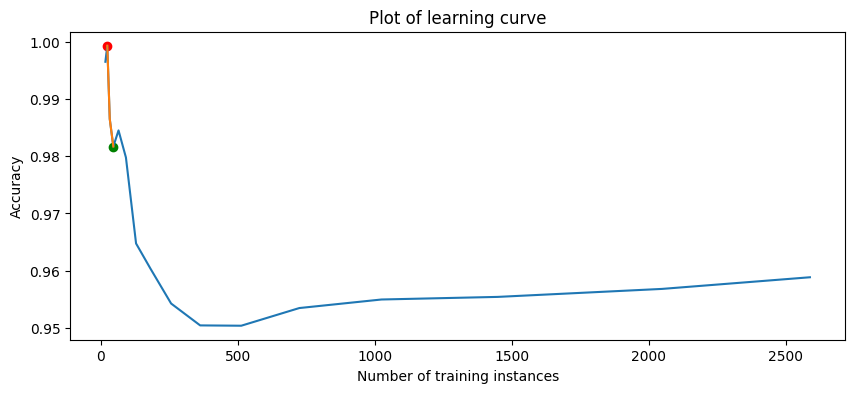

1it [00:02,  2.20s/it]

sklearn.linear_model.SGDClassifier on 11 is non-monotonic: True, size: 10


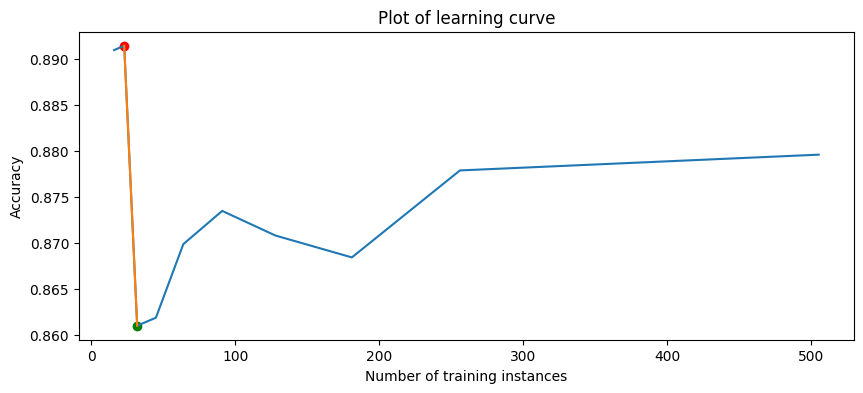

2it [00:04,  2.20s/it]

sklearn.linear_model.SGDClassifier on 13 is non-monotonic: True, size: 8


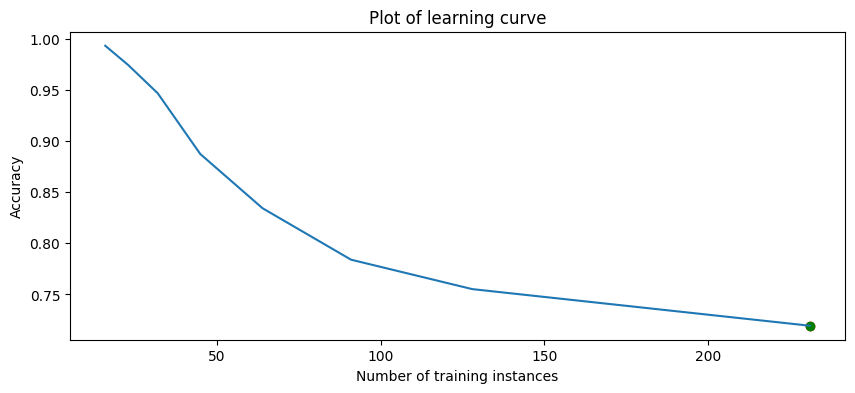

3it [00:06,  2.21s/it]

sklearn.linear_model.SGDClassifier on 21 is non-monotonic: True, size: 14


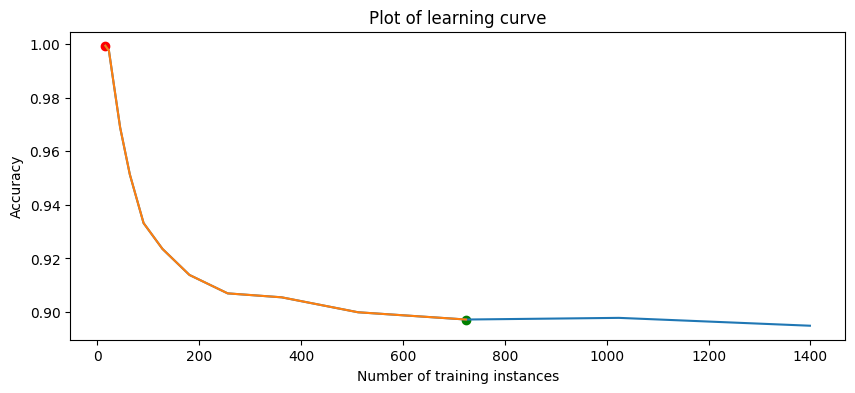

4it [00:08,  2.21s/it]

sklearn.linear_model.SGDClassifier on 24 is non-monotonic: True, size: 18


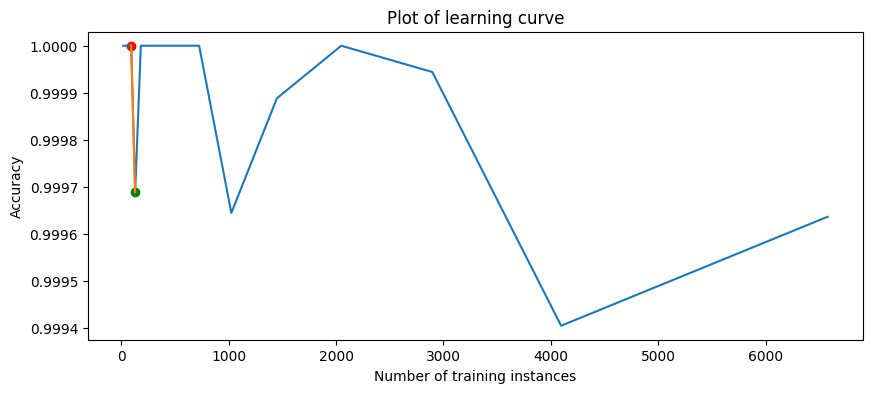

5it [00:11,  2.21s/it]

sklearn.linear_model.SGDClassifier on 31 is non-monotonic: True, size: 12


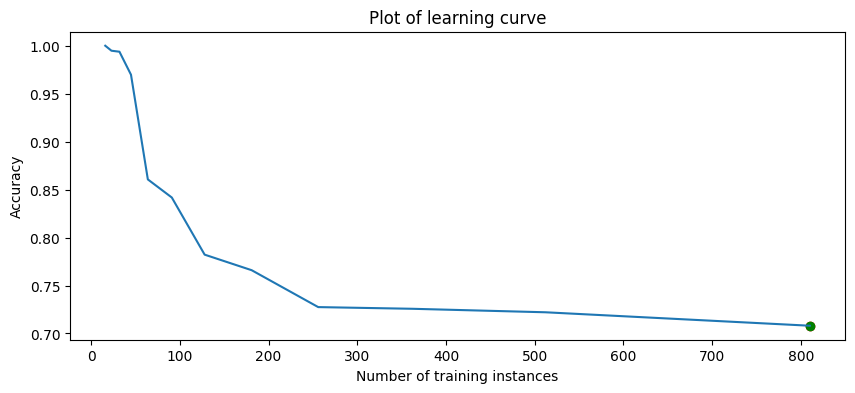

6it [00:13,  2.24s/it]

sklearn.linear_model.SGDClassifier on 55 is non-monotonic: True, size: 6


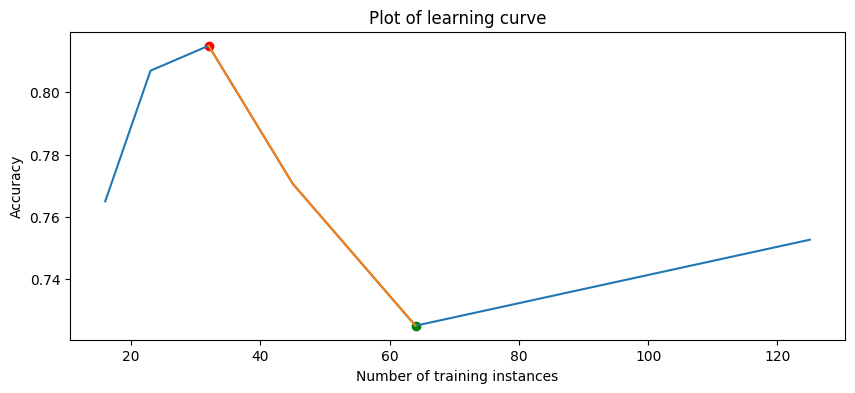

7it [00:15,  2.23s/it]

sklearn.linear_model.SGDClassifier on 61 is non-monotonic: False, size: 6


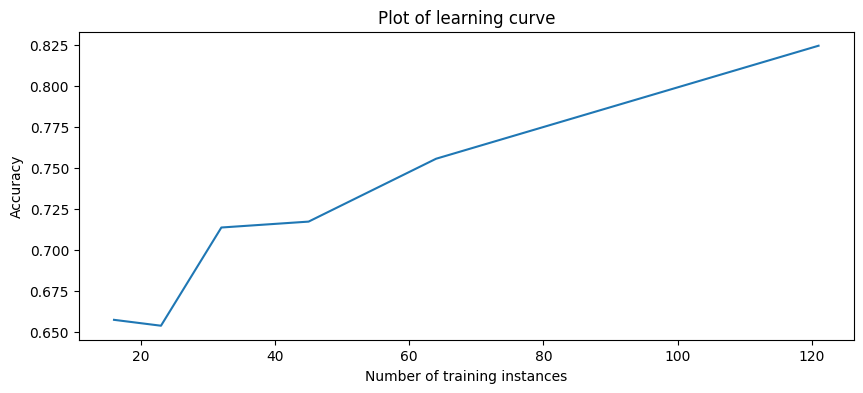

8it [00:17,  2.22s/it]

sklearn.linear_model.SGDClassifier on 336 is non-monotonic: True, size: 8


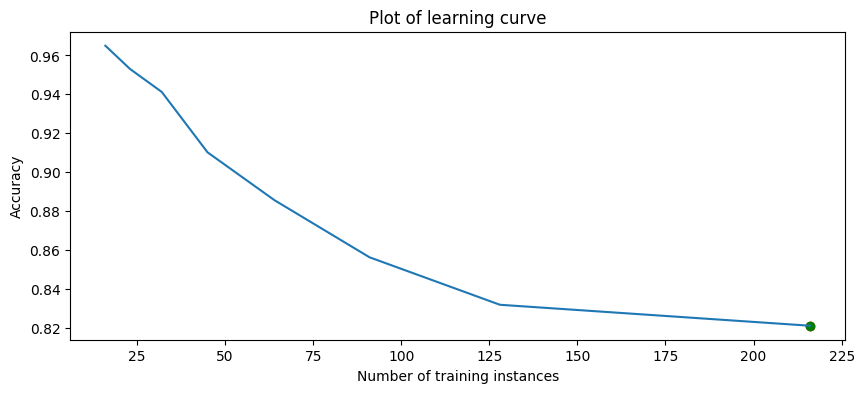

9it [00:19,  2.22s/it]

sklearn.linear_model.SGDClassifier on 346 is non-monotonic: True, size: 4


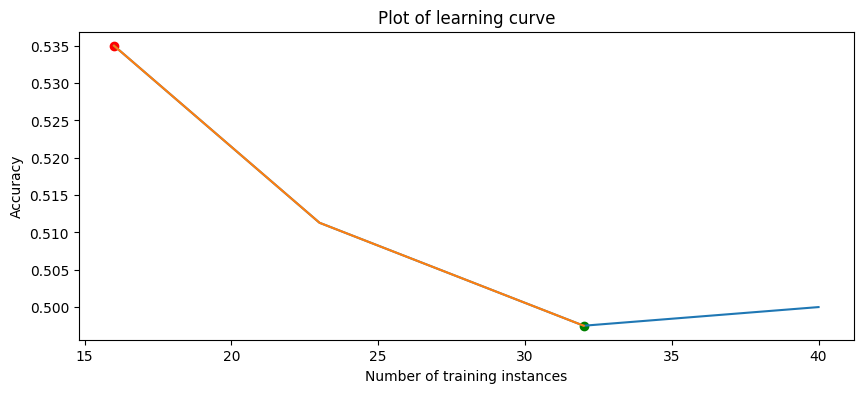

10it [00:22,  2.22s/it]

sklearn.linear_model.SGDClassifier on 380 is non-monotonic: False, size: 4


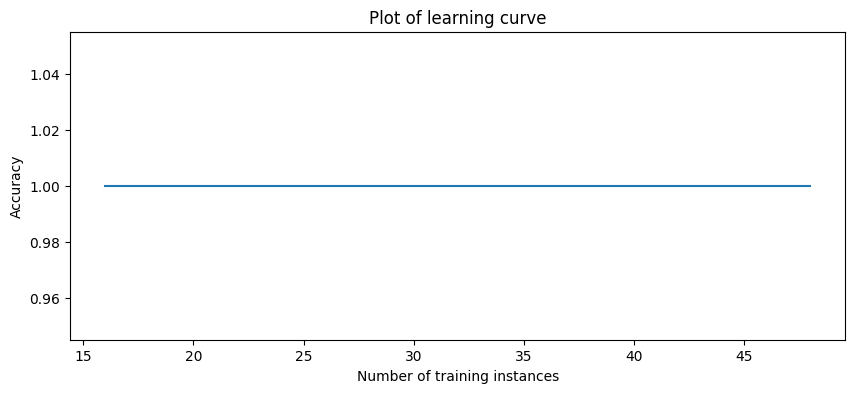

11it [00:24,  2.20s/it]

sklearn.linear_model.SGDClassifier on 446 is non-monotonic: False, size: 8


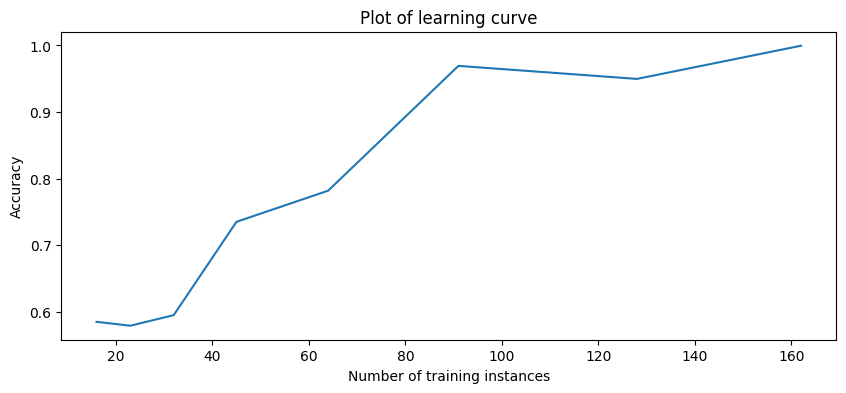

12it [00:26,  2.19s/it]

sklearn.linear_model.SGDClassifier on 715 is non-monotonic: True, size: 12


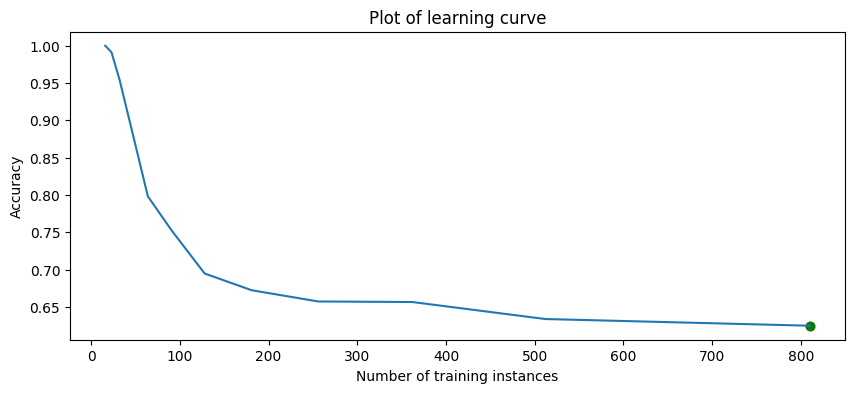

13it [00:28,  2.20s/it]

sklearn.linear_model.SGDClassifier on 723 is non-monotonic: True, size: 12


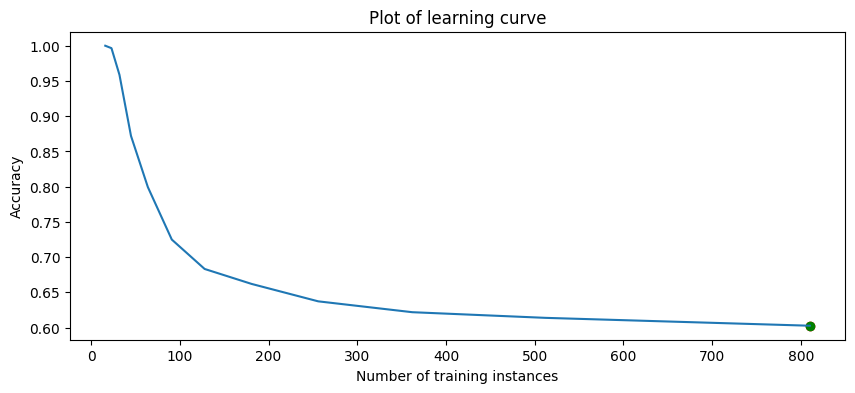

14it [00:31,  2.23s/it]

sklearn.linear_model.SGDClassifier on 740 is non-monotonic: True, size: 12


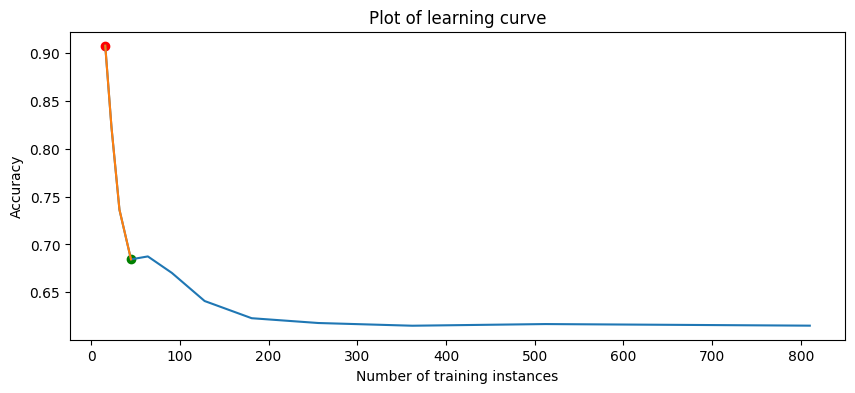

15it [00:33,  2.22s/it]

sklearn.linear_model.SGDClassifier on 741 is non-monotonic: True, size: 12


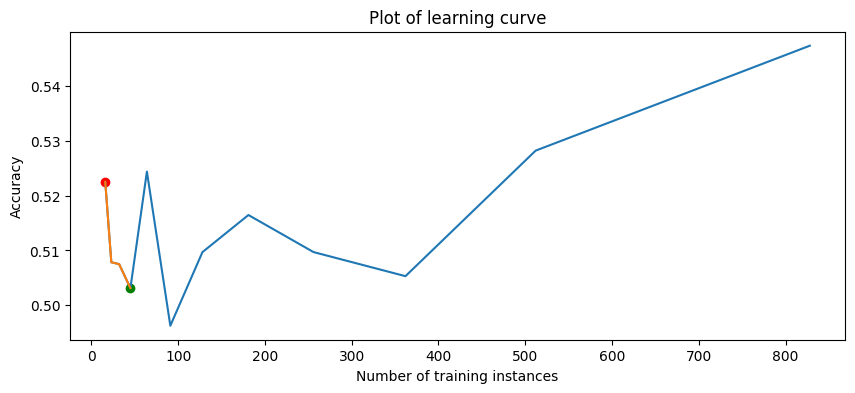

16it [00:35,  2.22s/it]

sklearn.linear_model.SGDClassifier on 743 is non-monotonic: True, size: 12


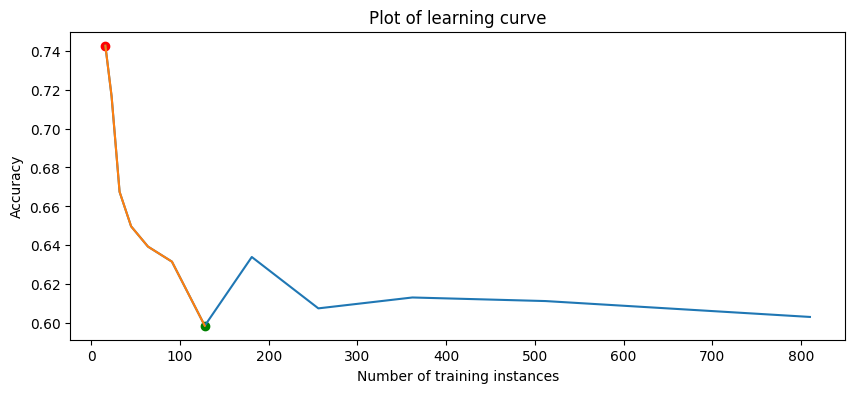

17it [00:37,  2.31s/it]

sklearn.linear_model.SGDClassifier on 751 is non-monotonic: True, size: 12


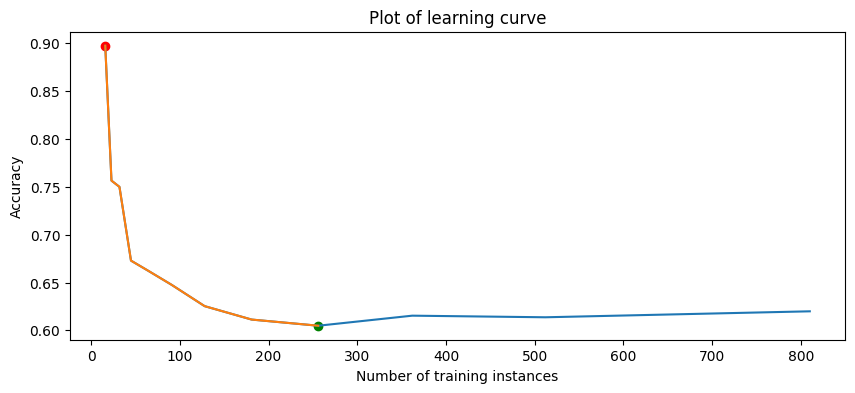

18it [00:40,  2.28s/it]

sklearn.linear_model.SGDClassifier on 772 is non-monotonic: True, size: 14


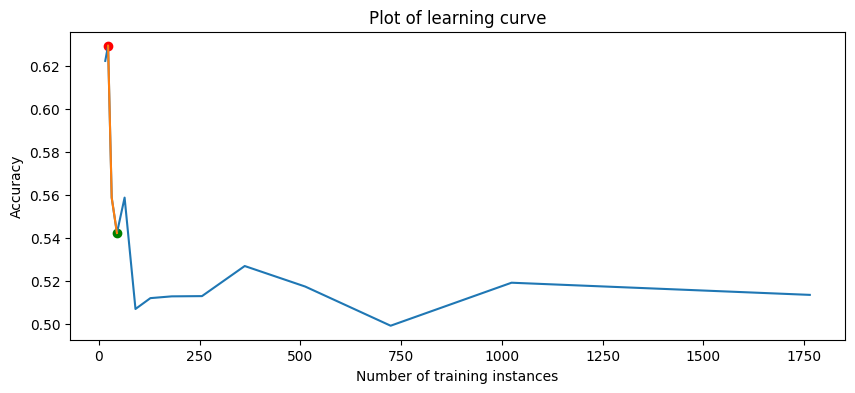

19it [00:42,  2.26s/it]

sklearn.linear_model.SGDClassifier on 799 is non-monotonic: True, size: 12


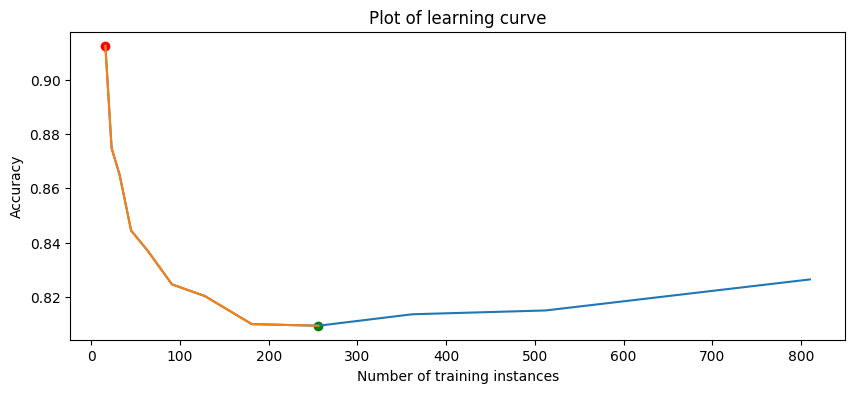

20it [00:44,  2.26s/it]

sklearn.linear_model.SGDClassifier on 806 is non-monotonic: True, size: 12


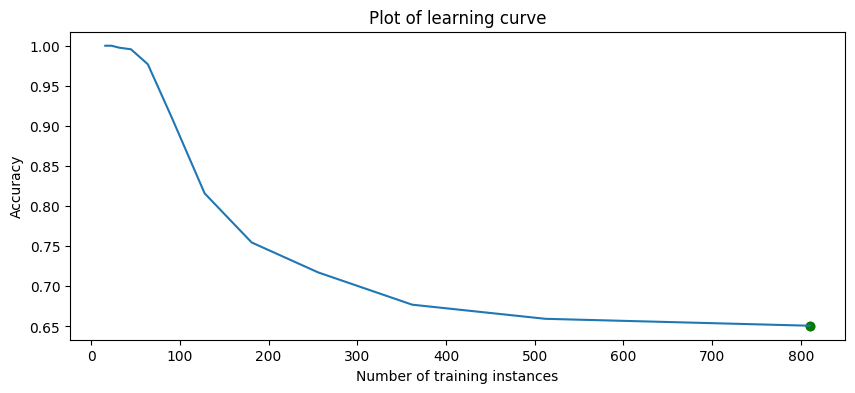

21it [00:46,  2.25s/it]

sklearn.linear_model.SGDClassifier on 813 is non-monotonic: True, size: 12


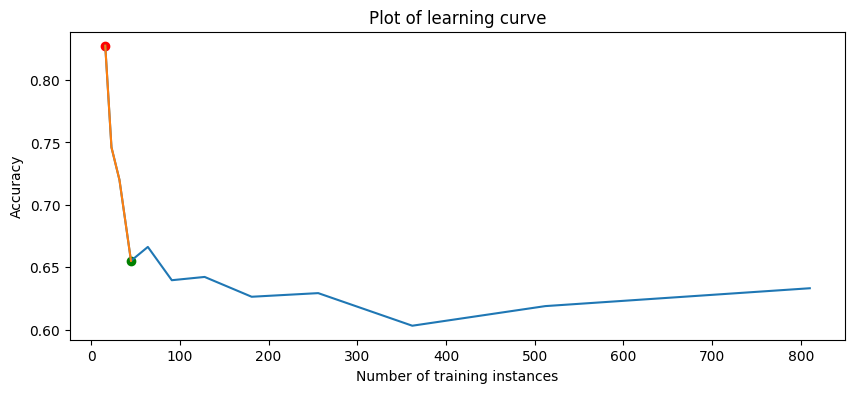

22it [00:49,  2.24s/it]

sklearn.linear_model.SGDClassifier on 845 is non-monotonic: True, size: 12


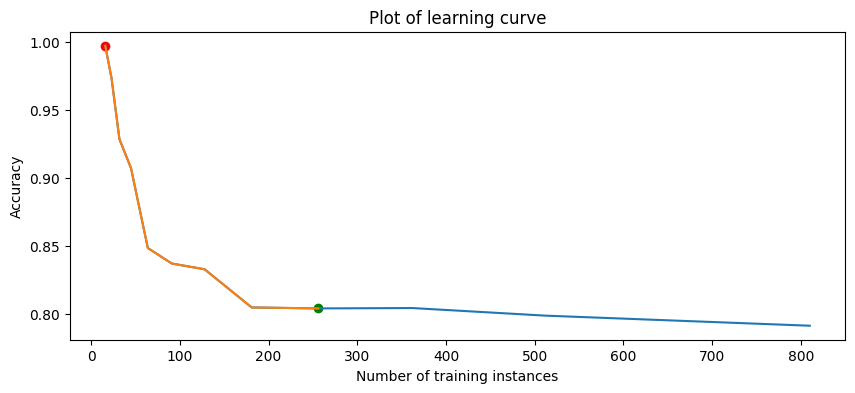

23it [00:51,  2.25s/it]

sklearn.linear_model.SGDClassifier on 849 is non-monotonic: True, size: 12


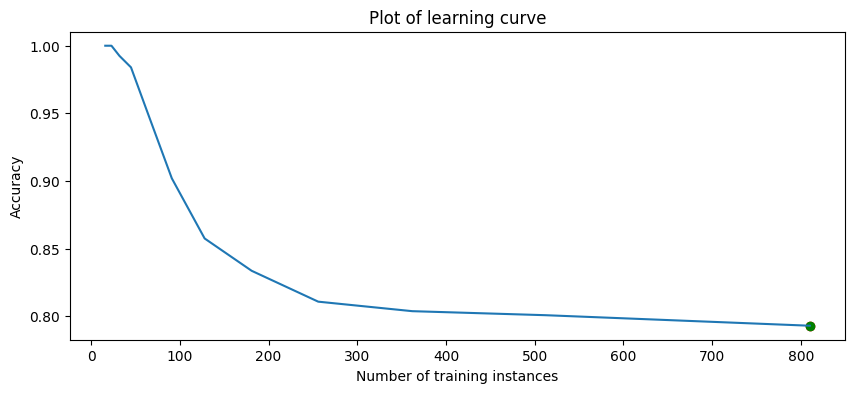

24it [00:53,  2.24s/it]

sklearn.linear_model.SGDClassifier on 866 is non-monotonic: True, size: 12


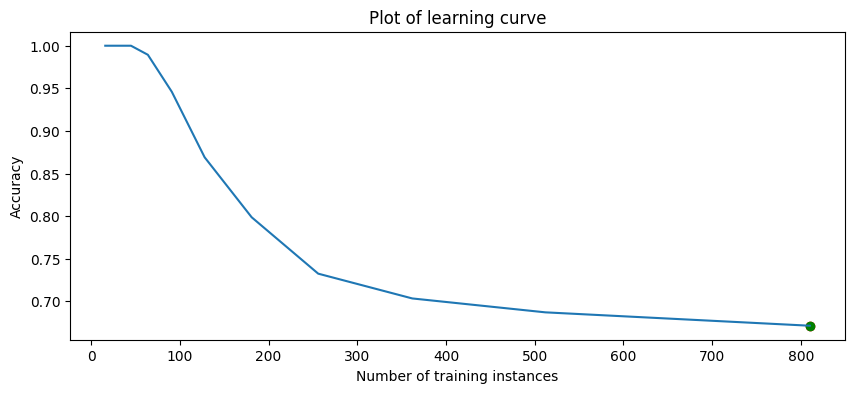

25it [00:55,  2.24s/it]

sklearn.linear_model.SGDClassifier on 897 is non-monotonic: True, size: 12


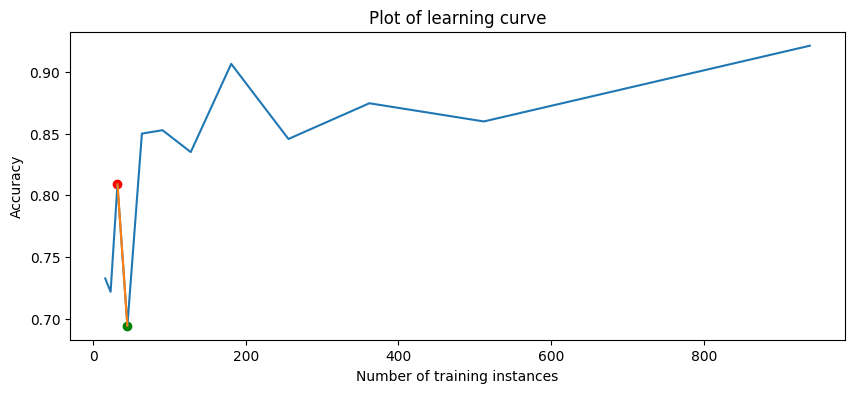

26it [00:58,  2.22s/it]

sklearn.linear_model.SGDClassifier on 903 is non-monotonic: True, size: 12


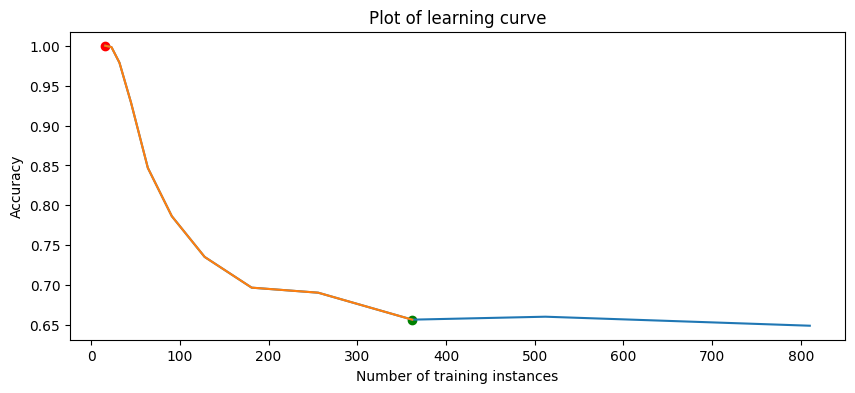

27it [01:00,  2.26s/it]

sklearn.linear_model.SGDClassifier on 904 is non-monotonic: True, size: 12


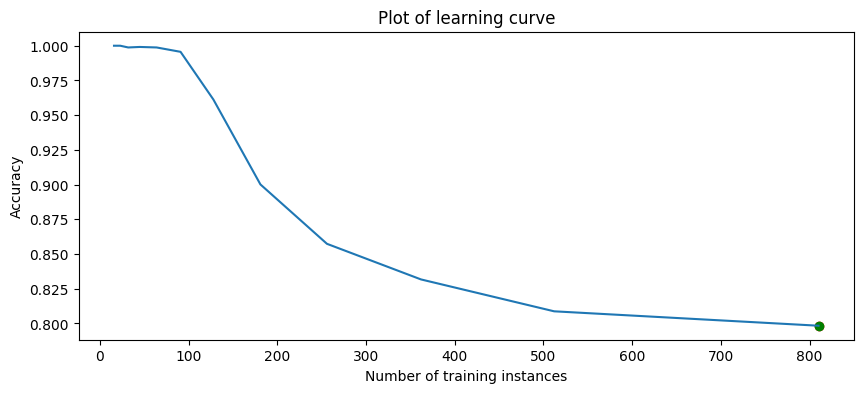

28it [01:02,  2.26s/it]

sklearn.linear_model.SGDClassifier on 910 is non-monotonic: True, size: 12


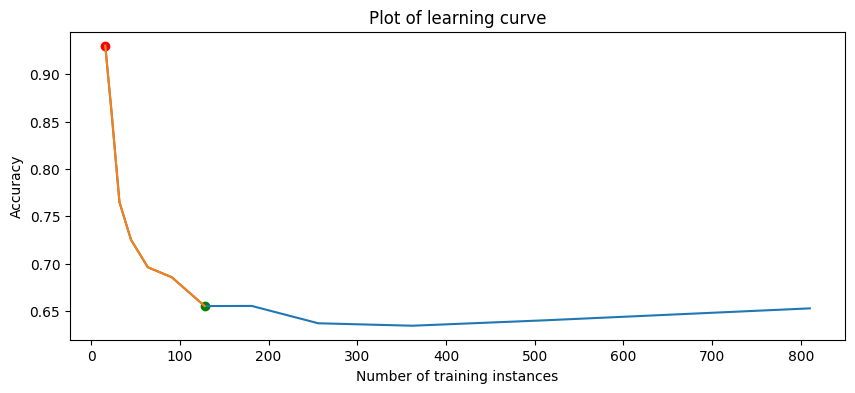

29it [01:04,  2.24s/it]

sklearn.linear_model.SGDClassifier on 912 is non-monotonic: True, size: 12


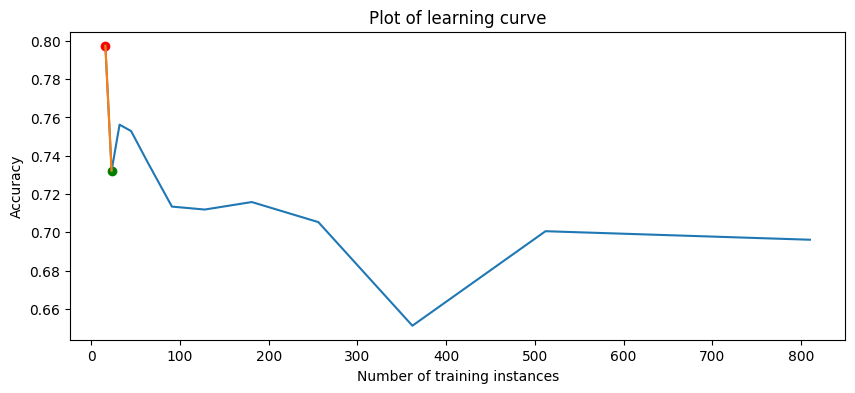

30it [01:07,  2.25s/it]

sklearn.linear_model.SGDClassifier on 913 is non-monotonic: True, size: 12


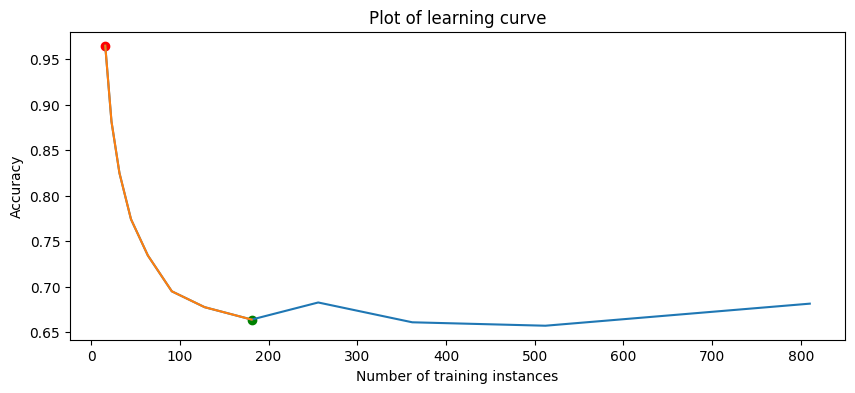

31it [01:09,  2.34s/it]

sklearn.linear_model.SGDClassifier on 914 is non-monotonic: True, size: 14


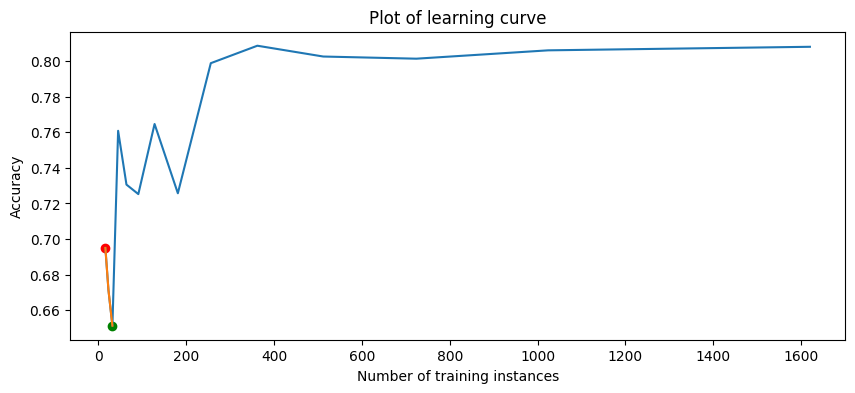

32it [01:11,  2.30s/it]

sklearn.linear_model.SGDClassifier on 917 is non-monotonic: True, size: 12


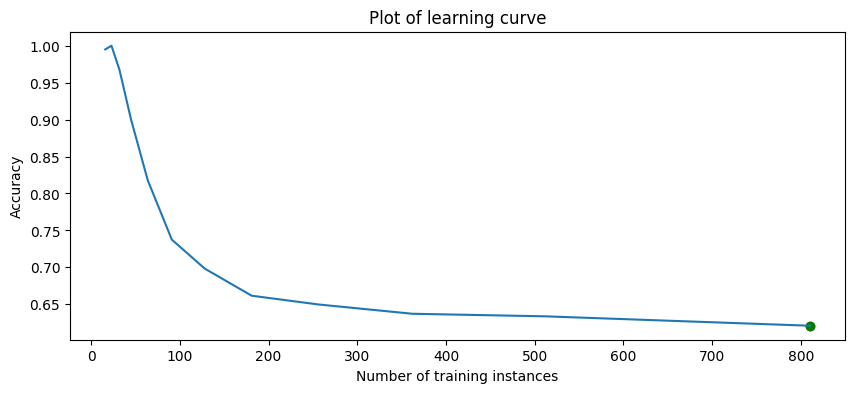

33it [01:14,  2.27s/it]

sklearn.linear_model.SGDClassifier on 934 is non-monotonic: True, size: 12


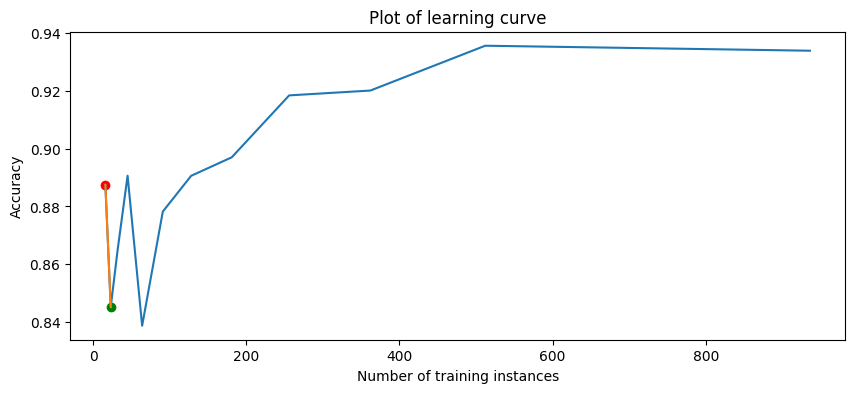

34it [01:16,  2.29s/it]

sklearn.linear_model.SGDClassifier on 958 is non-monotonic: True, size: 14


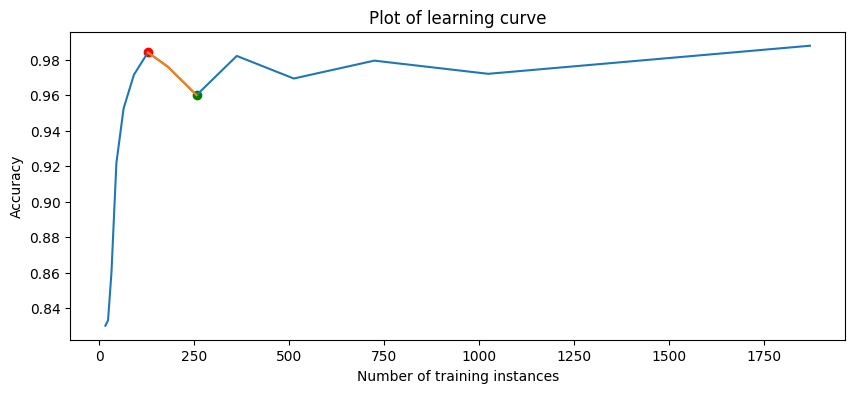

35it [01:18,  2.29s/it]

sklearn.linear_model.SGDClassifier on 959 is non-monotonic: True, size: 20


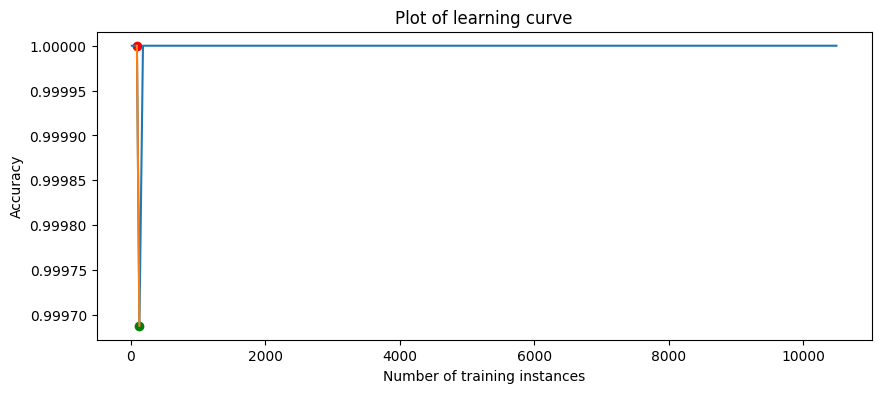

36it [01:20,  2.27s/it]

sklearn.linear_model.SGDClassifier on 962 is non-monotonic: True, size: 14


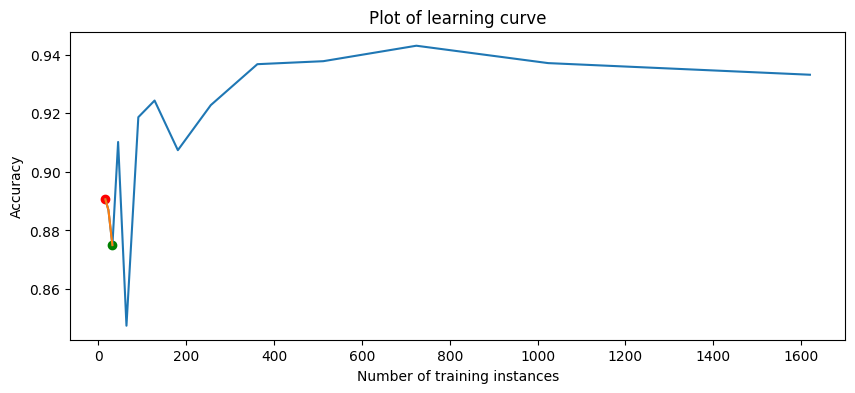

37it [01:23,  2.23s/it]

sklearn.linear_model.SGDClassifier on 966 is non-monotonic: True, size: 14


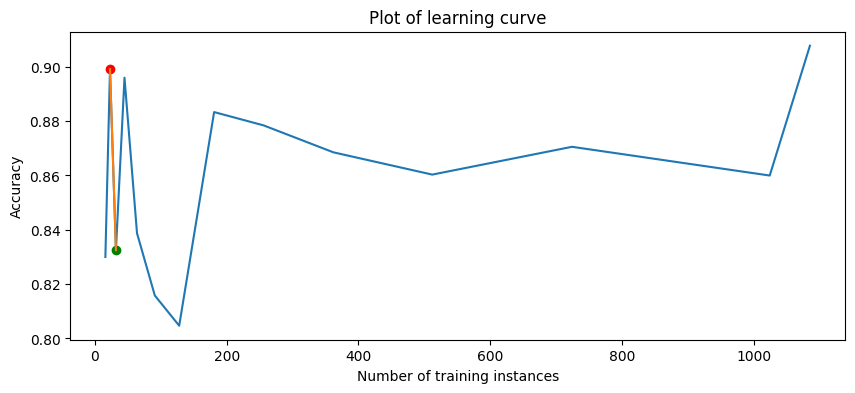

38it [01:25,  2.23s/it]

sklearn.linear_model.SGDClassifier on 971 is non-monotonic: True, size: 14


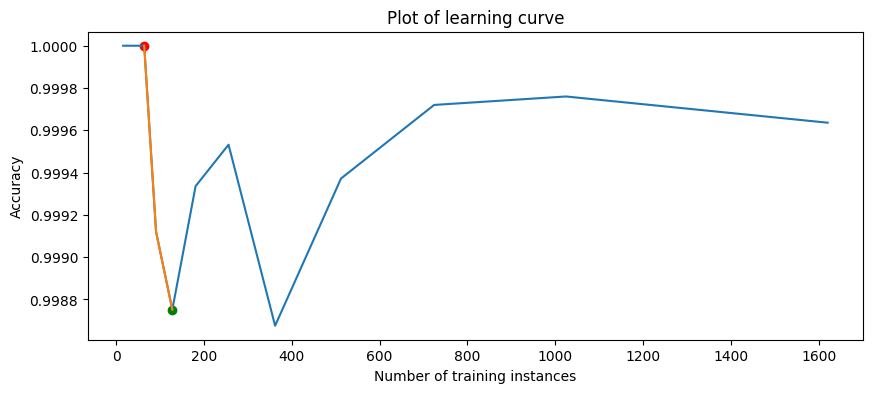

39it [01:27,  2.23s/it]

sklearn.linear_model.SGDClassifier on 991 is non-monotonic: True, size: 14


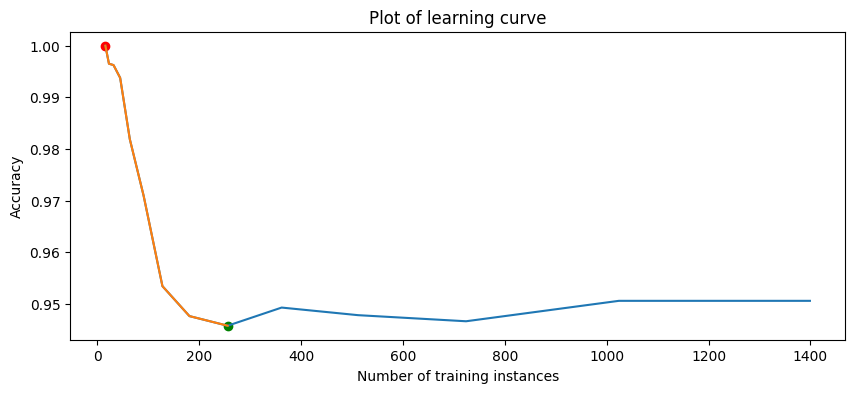

40it [01:29,  2.22s/it]

sklearn.linear_model.SGDClassifier on 995 is non-monotonic: True, size: 14


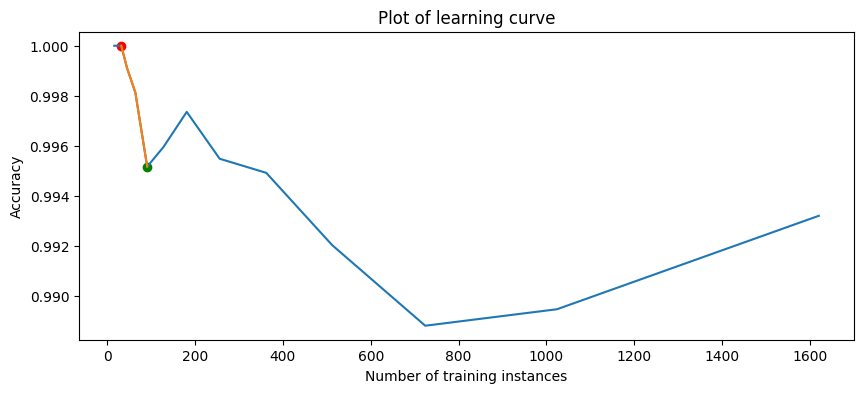

41it [01:31,  2.21s/it]

sklearn.linear_model.SGDClassifier on 1020 is non-monotonic: True, size: 14


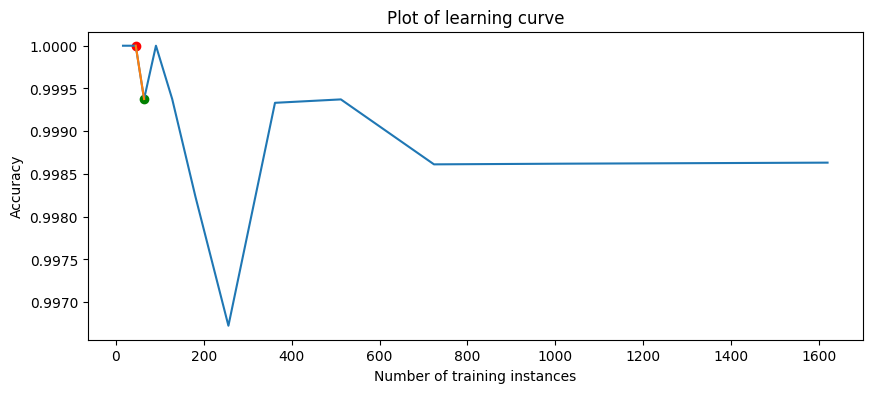

42it [01:34,  2.22s/it]

sklearn.linear_model.SGDClassifier on 1021 is non-monotonic: True, size: 18


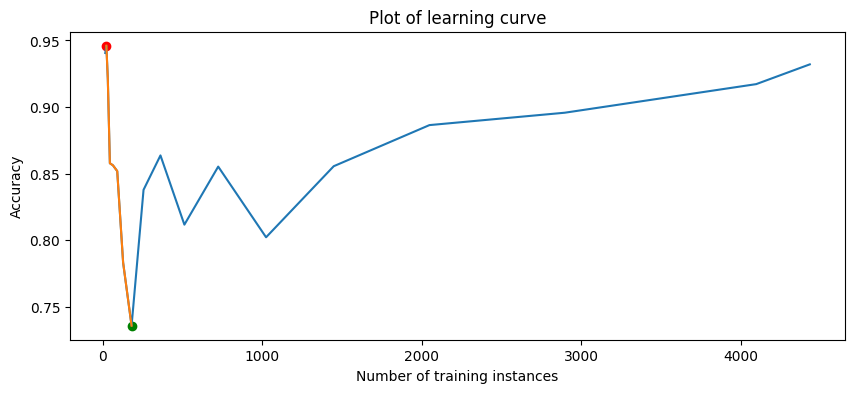

43it [01:36,  2.22s/it]

sklearn.linear_model.SGDClassifier on 1049 is non-monotonic: True, size: 14


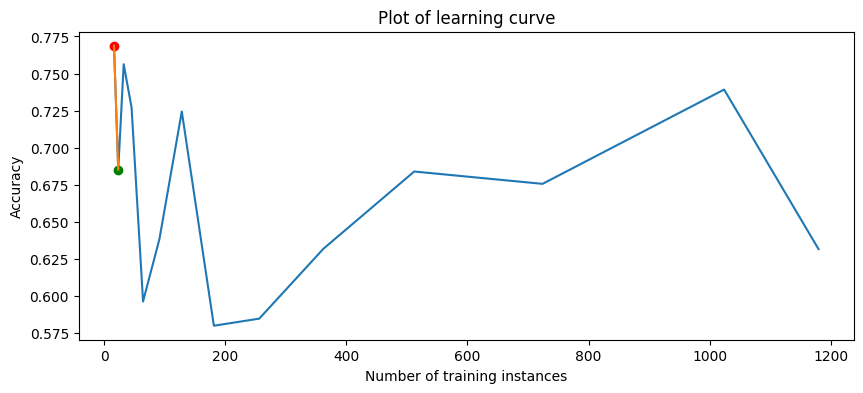

44it [01:38,  2.31s/it]

sklearn.linear_model.SGDClassifier on 1050 is non-monotonic: True, size: 14


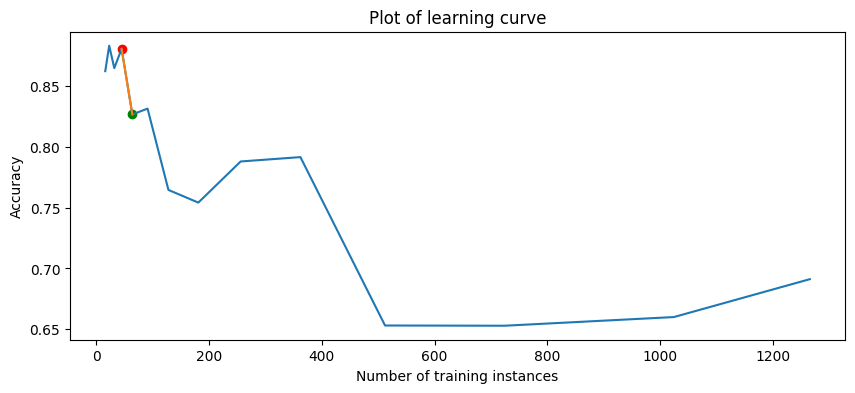

45it [01:41,  2.27s/it]

sklearn.linear_model.SGDClassifier on 1053 is non-monotonic: True, size: 20


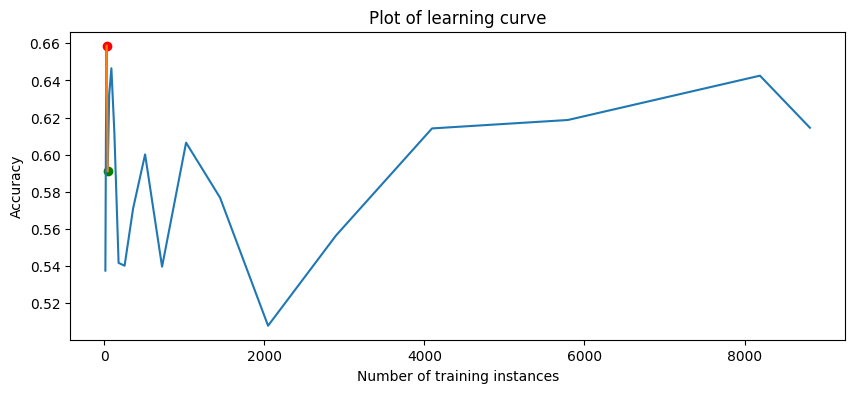

46it [01:43,  2.26s/it]

sklearn.linear_model.SGDClassifier on 1056 is non-monotonic: True, size: 17


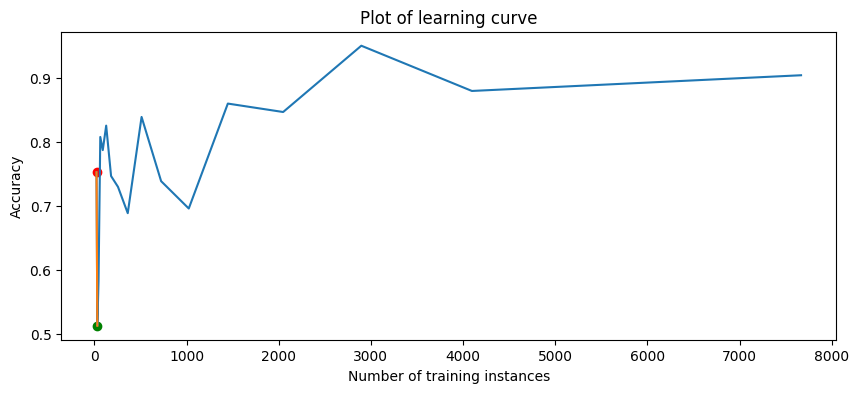

47it [01:45,  2.24s/it]

sklearn.linear_model.SGDClassifier on 1067 is non-monotonic: True, size: 14


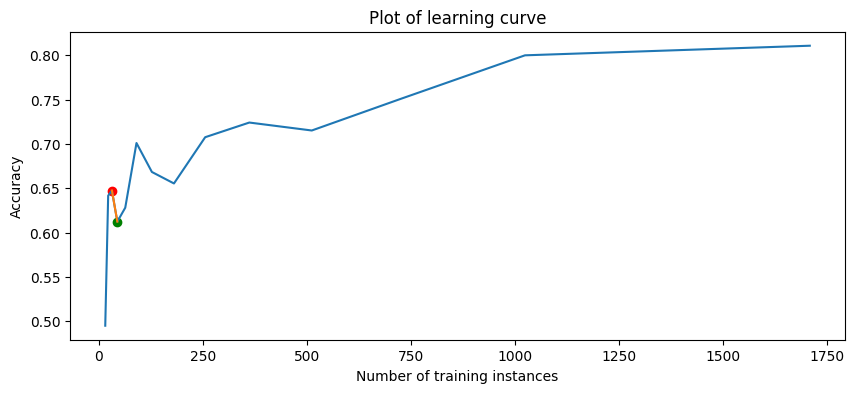

48it [01:47,  2.25s/it]

sklearn.linear_model.SGDClassifier on 1068 is non-monotonic: True, size: 12


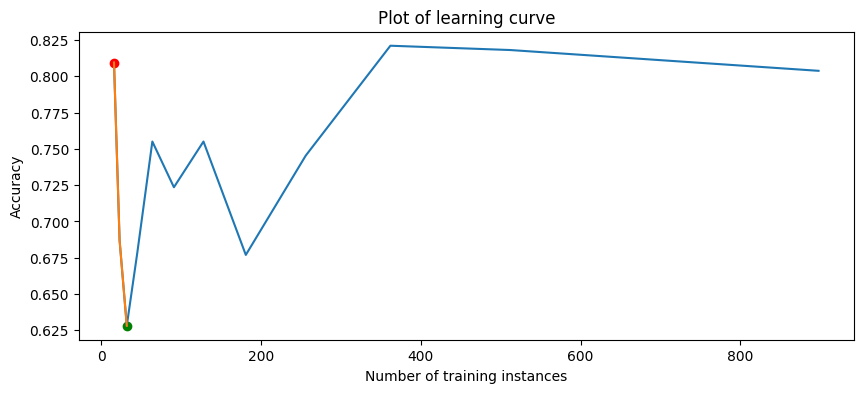

49it [01:49,  2.25s/it]

sklearn.linear_model.SGDClassifier on 1069 is non-monotonic: True, size: 13


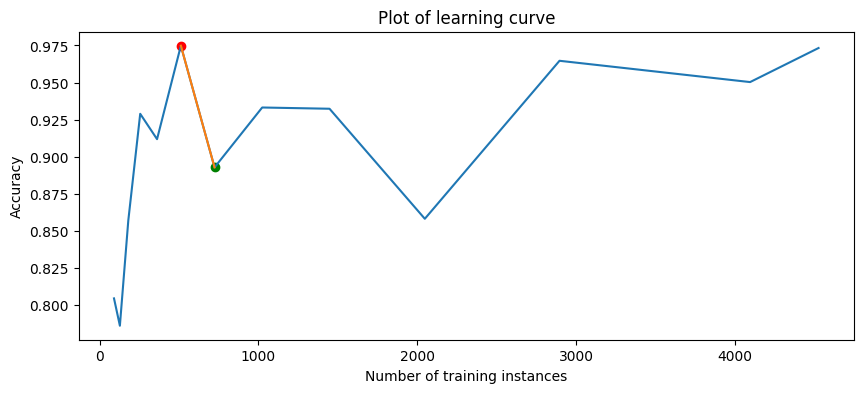

50it [01:52,  2.23s/it]

sklearn.linear_model.SGDClassifier on 1441 is non-monotonic: True, size: 6


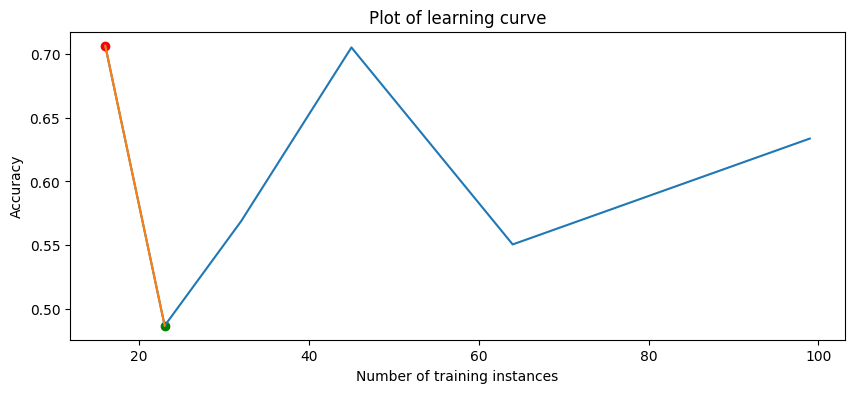

51it [01:54,  2.22s/it]

sklearn.linear_model.SGDClassifier on 1448 is non-monotonic: True, size: 8


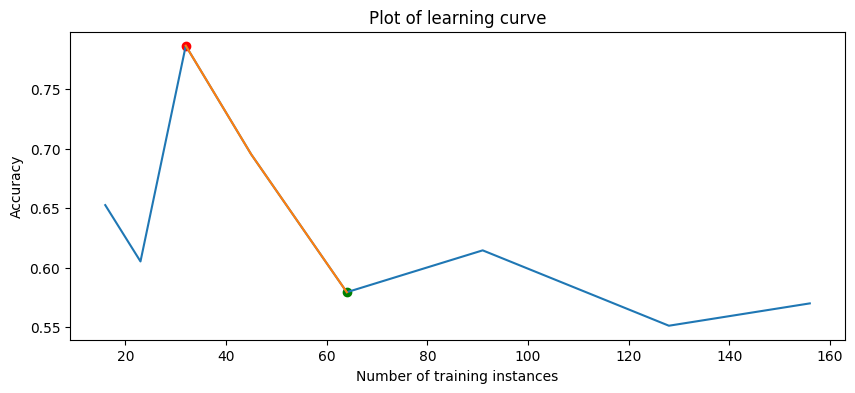

52it [01:56,  2.23s/it]

sklearn.linear_model.SGDClassifier on 1450 is non-monotonic: True, size: 6


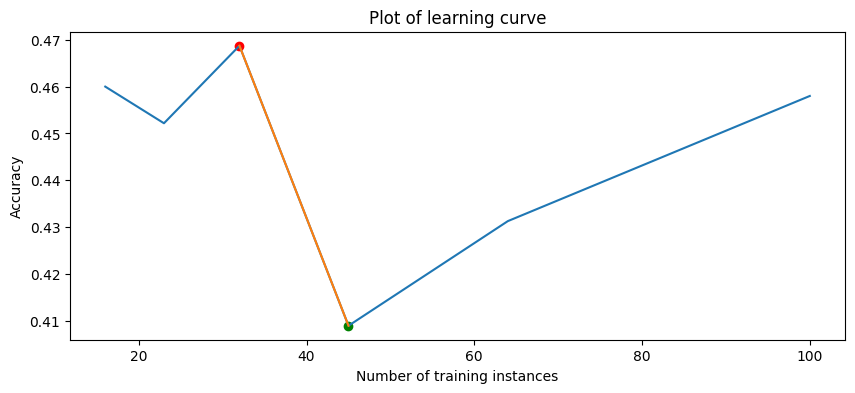

53it [01:58,  2.24s/it]

sklearn.linear_model.SGDClassifier on 1464 is non-monotonic: True, size: 12


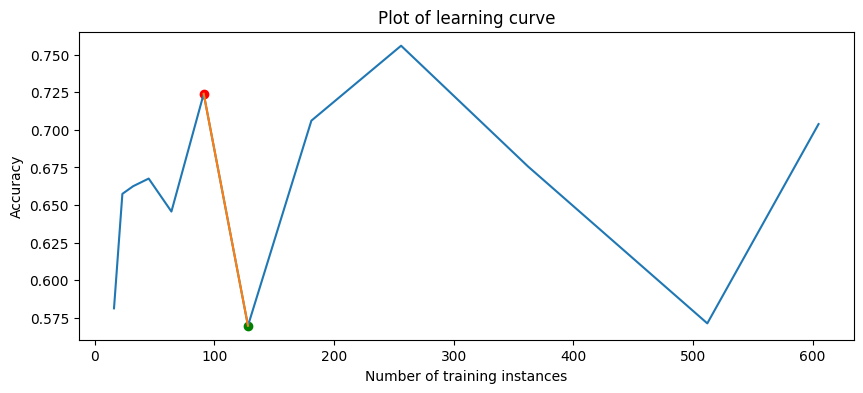

54it [02:01,  2.26s/it]

sklearn.linear_model.SGDClassifier on 1465 is non-monotonic: True, size: 6


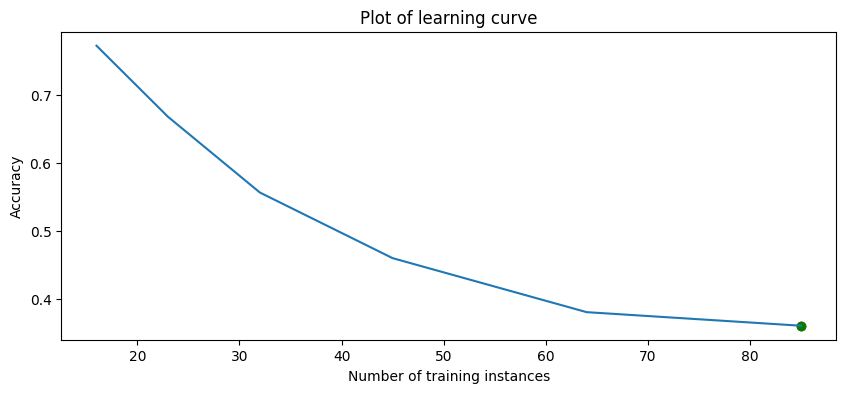

55it [02:03,  2.24s/it]

sklearn.linear_model.SGDClassifier on 1479 is non-monotonic: True, size: 12


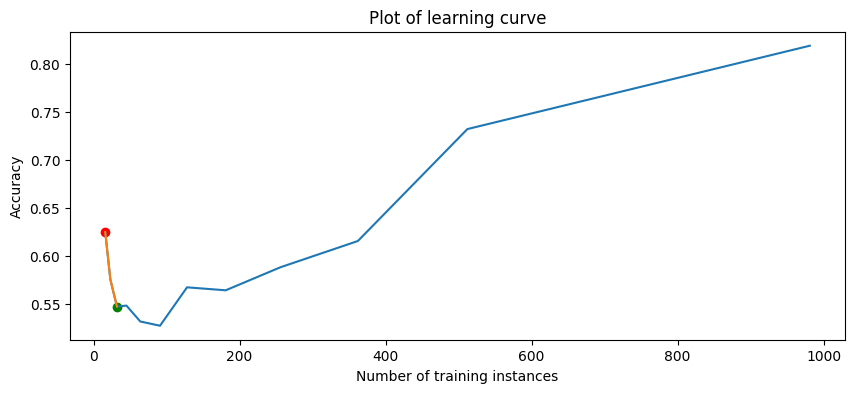

56it [02:05,  2.30s/it]

sklearn.linear_model.SGDClassifier on 1488 is non-monotonic: True, size: 8


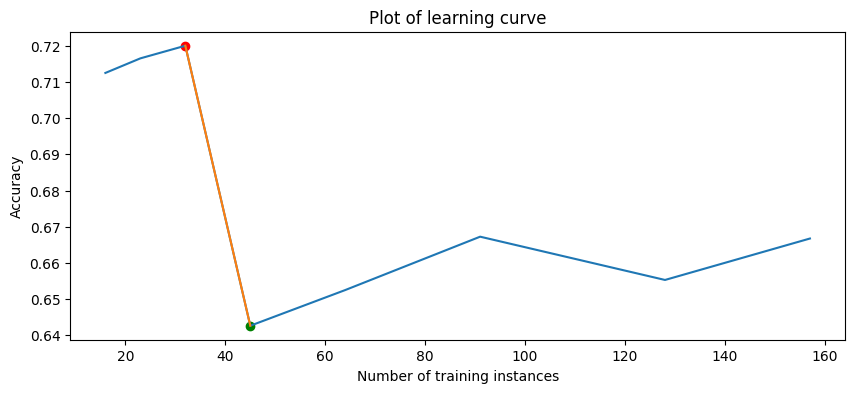

57it [02:08,  2.28s/it]

sklearn.linear_model.SGDClassifier on 1494 is non-monotonic: True, size: 12


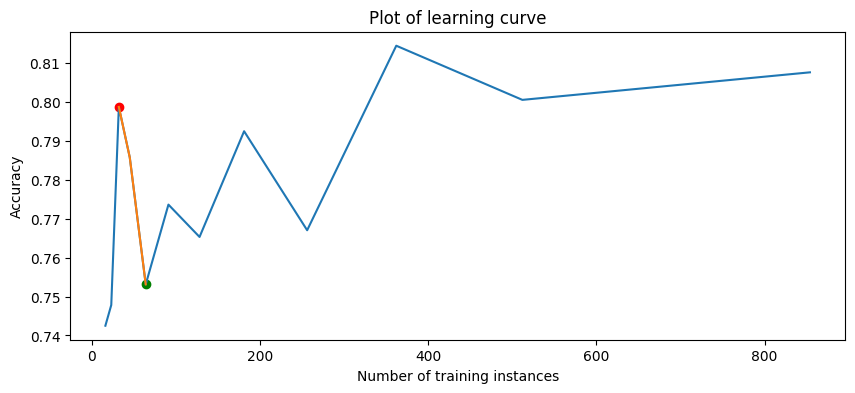

58it [02:10,  2.25s/it]

sklearn.linear_model.SGDClassifier on 1499 is non-monotonic: False, size: 8


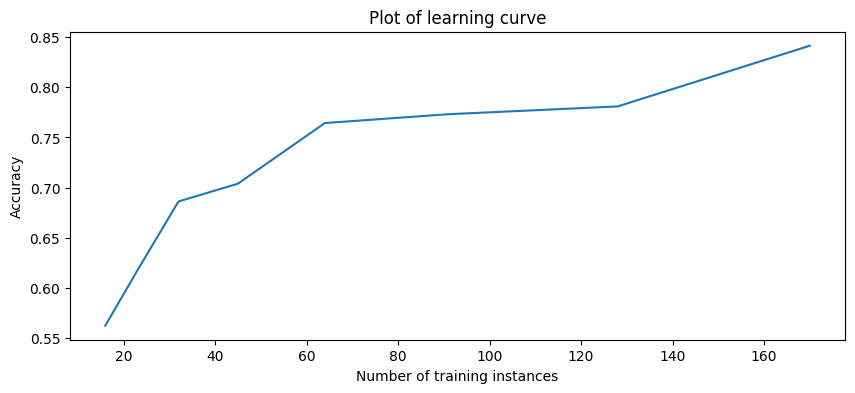

59it [02:12,  2.24s/it]

sklearn.linear_model.SGDClassifier on 1566 is non-monotonic: True, size: 12


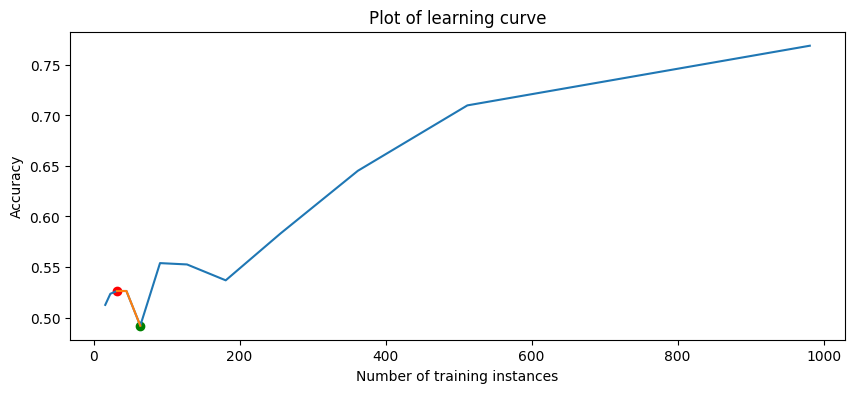

60it [02:14,  2.24s/it]

sklearn.linear_model.SGDClassifier on 40981 is non-monotonic: True, size: 12


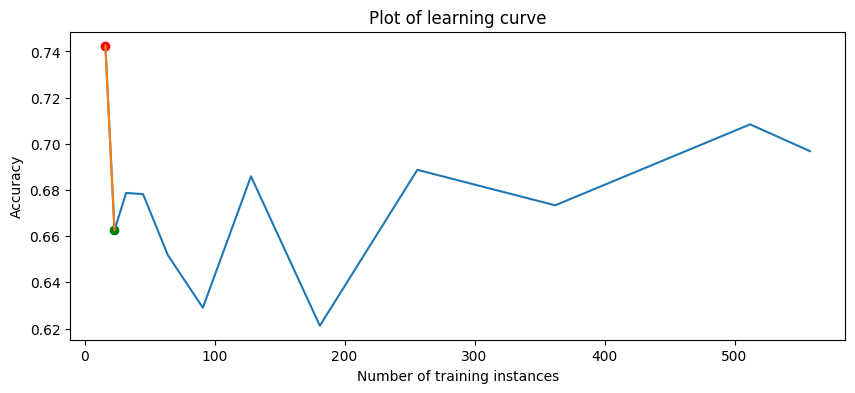

61it [02:17,  2.29s/it]

sklearn.linear_model.SGDClassifier on 40994 is non-monotonic: True, size: 10


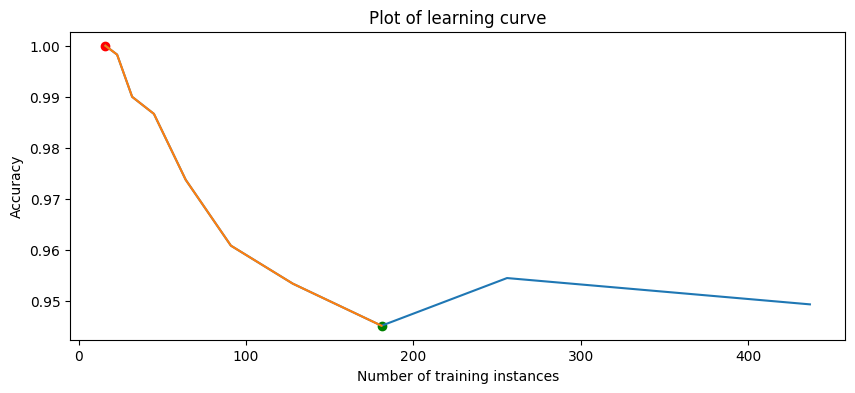

62it [02:19,  2.25s/it]

Class 0: (Monotone) 13
Class 1: (Non-Monotone) 215


In [5]:
to_consider = [ 'sklearn.linear_model.PassiveAggressiveClassifier', 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis', 'sklearn.linear_model.LogisticRegression', 'sklearn.linear_model.SGDClassifier']
exp_df = lcdb.get_all_curves('accuracy')
exp_df = exp_df.loc[exp_df.groupby(['openmlid', 'learner'])['size_train'].idxmax()]

lda = exp_df[exp_df['learner'] == to_consider[0]]


class_1 = 0  # monotonic
class_0 = 0  # non-monotonic
rows = []


for el in to_consider:
    lda = exp_df[exp_df['learner'] == el]
    q25 = lda['traintime'].quantile(0.25)
    lda = lda[lda['traintime'] < q25]
    for idx, row in tqdm(lda.iterrows()):
        curve = lcdb.get_curve(row['openmlid'], row['learner'])
        anchors, scores_train, scores_valid, scores_test = curve
        actual_curve = [np.mean(sublist) for sublist in scores_train]
        flag, starting_point, ending_point, count_flag, end_flag = evaluate_learningcurve(actual_curve, 0.8)
        rows.append([row['learner'], row['openmlid'], flag])
        if flag:
            print(f"{row['learner']} on {row['openmlid']} is non-monotonic: {flag}, size: {len(anchors)}")
            plot_learningcurve(anchors, actual_curve, starting_point, ending_point, flag)
            class_1 += 1
        else:
            print(f"{row['learner']} on {row['openmlid']} is non-monotonic: {flag}, size: {len(anchors)}")
            plot_learningcurve(anchors, actual_curve, starting_point, ending_point, flag)
            class_0 += 1

print("Class 0: (Monotone)", class_0)
print("Class 1: (Non-Monotone)", class_1)

In [7]:
experiment3_results = pd.DataFrame(rows, columns=['learner', 'dataset_id', 'non-monotone'])
experiment3_results

learner  dataset_id  \
0    sklearn.linear_model.PassiveAggressiveClassifier          11   
1    sklearn.linear_model.PassiveAggressiveClassifier          13   
2    sklearn.linear_model.PassiveAggressiveClassifier          31   
3    sklearn.linear_model.PassiveAggressiveClassifier          55   
4    sklearn.linear_model.PassiveAggressiveClassifier          61   
..                                                ...         ...   
223                sklearn.linear_model.SGDClassifier        1494   
224                sklearn.linear_model.SGDClassifier        1499   
225                sklearn.linear_model.SGDClassifier        1566   
226                sklearn.linear_model.SGDClassifier       40981   
227                sklearn.linear_model.SGDClassifier       40994   

     non-monotone  
0            True  
1            True  
2            True  
3            True  
4            True  
..            ...  
223          True  
224         False  
225          True  
226          True  
227          True  

[228 rows x 3 columns]

In [8]:
experiment3_results.to_csv('experiment3_results.csv')